In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score, f1_score
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.model_selection import cross_validate
from typing import List
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from kerastuner.tuners import RandomSearch
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
import typing 
from abc import ABC, abstractclassmethod, abstractmethod
from imblearn.over_sampling import ADASYN, SVMSMOTE, KMeansSMOTE, BorderlineSMOTE, RandomOverSampler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import gc
import time
from pandas.core.common import SettingWithCopyWarning
import lightgbm as lgb
from xgboost import XGBRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import GroupKFold, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import optuna

# I don't like SettingWithCopyWarnings ...
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use("fivethirtyeight")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.


In [ ]:
!pip install catboost
!pip install keras-tuner
!pip install optuna

In [3]:
df_2021 = pd.read_csv("/content/bangalore_weather_data_from_jan_to_dec_2021.csv")
df_2022 = pd.read_csv("/content/bangalore_weather_data_from_jan_to_sep_2022.csv")
df_2020 = pd.read_csv("/content/2020_data_from_jan_to_dec.csv")
rainy_dataset = pd.read_csv("/content/rainly_dataset.csv")
df_2017 = pd.read_csv("/content/2017_dataset_small.csv")

df_2020.drop("index", inplace=True, axis=1)

In [ ]:
df_2022 = df_2022[(df_2022.description != "scattered clouds") & (df_2022.description != "few clouds") & (df_2022.description != "broken clouds") & (df_2022.description != "overcast clouds")]

In [ ]:
df_2021

,dt,lat,lon,timezone,timezone_offset,sunrise,sunset,temp,feels_like,pressure,humidity,dew_point,clouds,wind_speed,wind_deg,id,main,description,icon
0,2021-01-01:01,12.9989,77.592,Asia/Kolkata,19800,1609463506,1609504453,291.23,291.60,1015,96,290.58,89,3.26,84,804,Clouds,overcast clouds,04n
1,2021-01-01:02,12.9989,77.592,Asia/Kolkata,19800,1609463506,1609504453,291.87,291.99,1013,84,289.11,20,0.00,0,801,Clouds,few clouds,02n
2,2021-01-01:03,12.9989,77.592,Asia/Kolkata,19800,1609463506,1609504453,291.25,291.54,1014,93,290.10,100,2.75,83,804,Clouds,overcast clouds,04n
3,2021-01-01:04,12.9989,77.592,Asia/Kolkata,19800,1609463506,1609504453,291.51,291.75,1014,90,289.84,100,3.48,80,804,Clouds,overcast clouds,04n
4,2021-01-01:05,12.9989,77.592,Asia/Kolkata,19800,1609463506,1609504453,290.70,290.94,1013,93,289.56,20,1.00,50,701,Mist,mist,50n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9751,2022-01-21:23,12.9989,77.592,Asia/Kolkata,19800,1642727775,1642769103,297.99,297.86,915,51,287.17,85,1.31,49,804,Clouds,overcast clouds,04n
9752,2022-01-22:00,12.9989,77.592,Asia/Kolkata,19800,1642814178,1642855534,293.86,293.42,1012,55,284.50,86,0.94,55,804,Clouds,overcast clouds,04n
9753,2022-01-22:01,12.9989,77.592,Asia/Kolkata,19800,1642814178,1642855534,292.71,292.29,1012,60,284.74,84,0.66,71,803,Clouds,broken clouds,04n
9754,2022-01-22:02,12.9989,77.592,Asia/Kolkata,19800,1642814178,1642855534,292.48,292.04,1011,60,284.53,74,0.82,132,803,Clouds,broken clouds,04n


In [ ]:
df_2022

,dt,lat,lon,timezone,timezone_offset,sunrise,sunset,temp,feels_like,pressure,humidity,dew_point,clouds,wind_speed,wind_deg,id,main,description,icon
0,2022-01-01:01,12.9989,77.592,Asia/Kolkata,19800,1640999500,1641040444,292.19,291.93,1018,68,286.15,100,3.47,79,804,Clouds,overcast clouds,04n
1,2022-01-01:02,12.9989,77.592,Asia/Kolkata,19800,1640999500,1641040444,292.20,291.91,1017,67,285.94,100,3.29,74,804,Clouds,overcast clouds,04n
2,2022-01-01:03,12.9989,77.592,Asia/Kolkata,19800,1640999500,1641040444,292.22,291.96,1017,68,286.18,69,3.72,77,803,Clouds,broken clouds,04n
3,2022-01-01:04,12.9989,77.592,Asia/Kolkata,19800,1640999500,1641040444,292.25,291.99,1017,68,286.21,85,3.67,74,804,Clouds,overcast clouds,04n
4,2022-01-01:05,12.9989,77.592,Asia/Kolkata,19800,1640999500,1641040444,292.71,292.86,1019,82,289.56,40,2.57,90,802,Clouds,scattered clouds,03n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6553,2022-09-10:02,12.9989,77.592,Asia/Kolkata,19800,1662770331,1662814501,293.03,293.53,1006,94,292.04,100,7.30,229,500,Rain,light rain,10n
6554,2022-09-10:03,12.9989,77.592,Asia/Kolkata,19800,1662770331,1662814501,293.03,293.53,1006,94,292.04,100,7.30,229,500,Rain,light rain,10n
6555,2022-09-10:04,12.9989,77.592,Asia/Kolkata,19800,1662770331,1662814501,293.10,293.55,1007,92,291.76,100,7.27,234,500,Rain,light rain,10n
6556,2022-09-10:05,12.9989,77.592,Asia/Kolkata,19800,1662770331,1662814501,293.10,293.55,1007,92,291.76,100,7.27,234,500,Rain,light rain,10n


In [ ]:
df_2020.drop("index", inplace=True, axis=1)

In [ ]:
df_2020.description.value_counts()

scattered clouds                1934
few clouds                      1423
light rain                      1189
broken clouds                    898
overcast clouds                  728
clear sky                        527
mist                             473
moderate rain                    286
light intensity drizzle          217
haze                             169
thunderstorm                      81
thunderstorm with rain            70
heavy intensity rain              20
fog                               18
thunderstorm with light rain       6
drizzle                            6
Name: description, dtype: int64

In [ ]:
df_2020 = df_2020[(df_2020.description != "scattered clouds") & (df_2020.description != "few clouds") & (df_2020.description != "broken clouds") & (df_2020.description != "overcast clouds")]

In [ ]:
df_2020.description.value_counts()

light rain                      1189
clear sky                        527
mist                             473
moderate rain                    286
light intensity drizzle          217
haze                             169
thunderstorm                      81
thunderstorm with rain            70
heavy intensity rain              20
fog                               18
thunderstorm with light rain       6
drizzle                            6
Name: description, dtype: int64

In [57]:
df = pd.concat([df_2021, df_2022, df_2020, rainy_dataset], axis=0)

In [58]:
df.index = np.arange(len(df))

In [59]:
df.set_index("dt", inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True)
df.drop(["Unnamed: 0.1", "Unnamed: 0"], inplace=True, axis=1)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

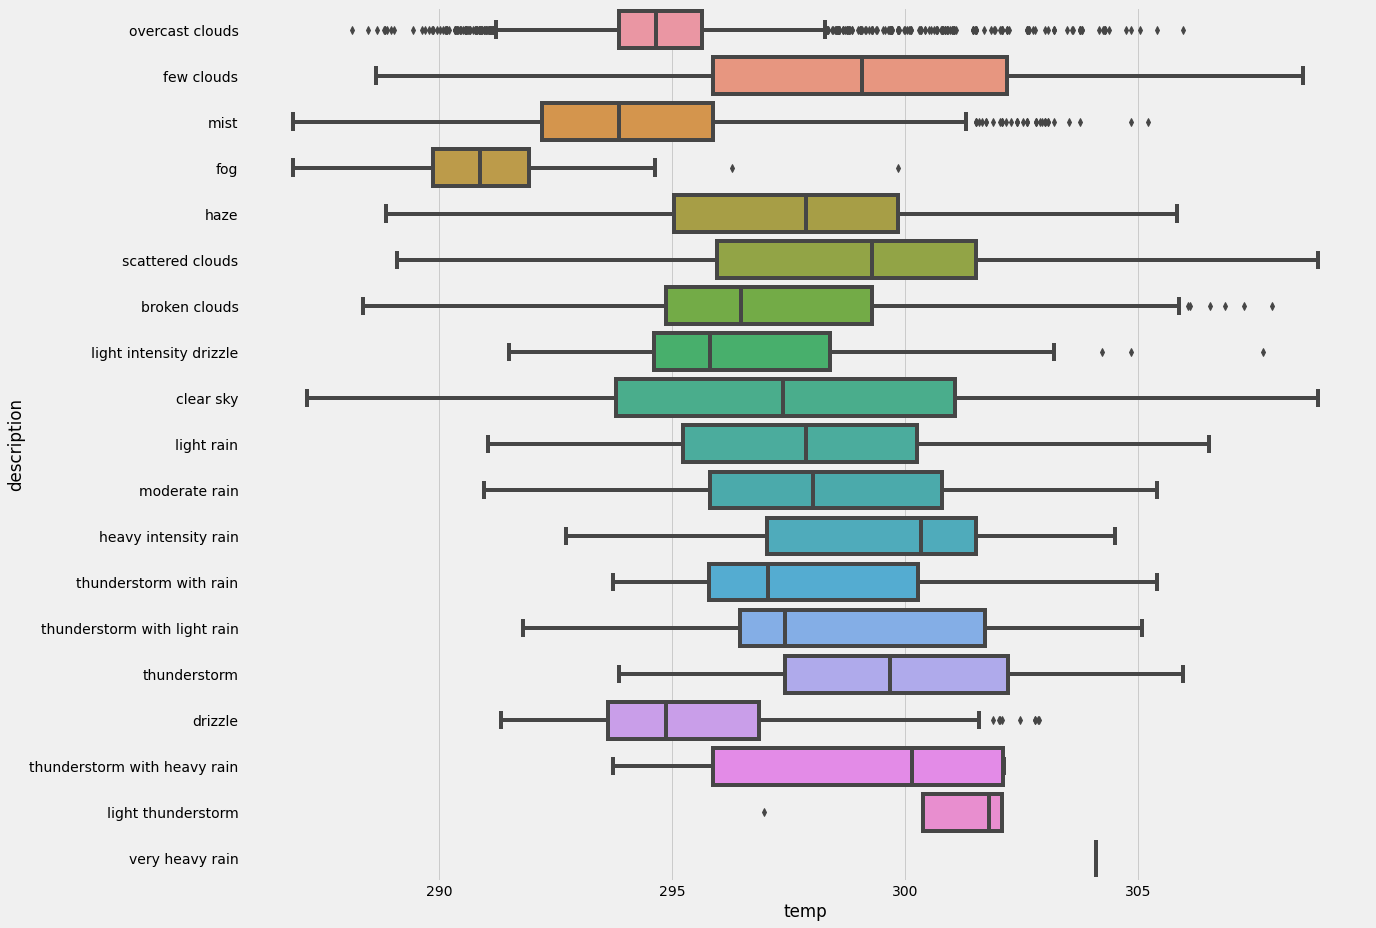

In [ ]:
plt.figure(figsize=(18, 15))
sns.boxplot(df.temp, df.description)

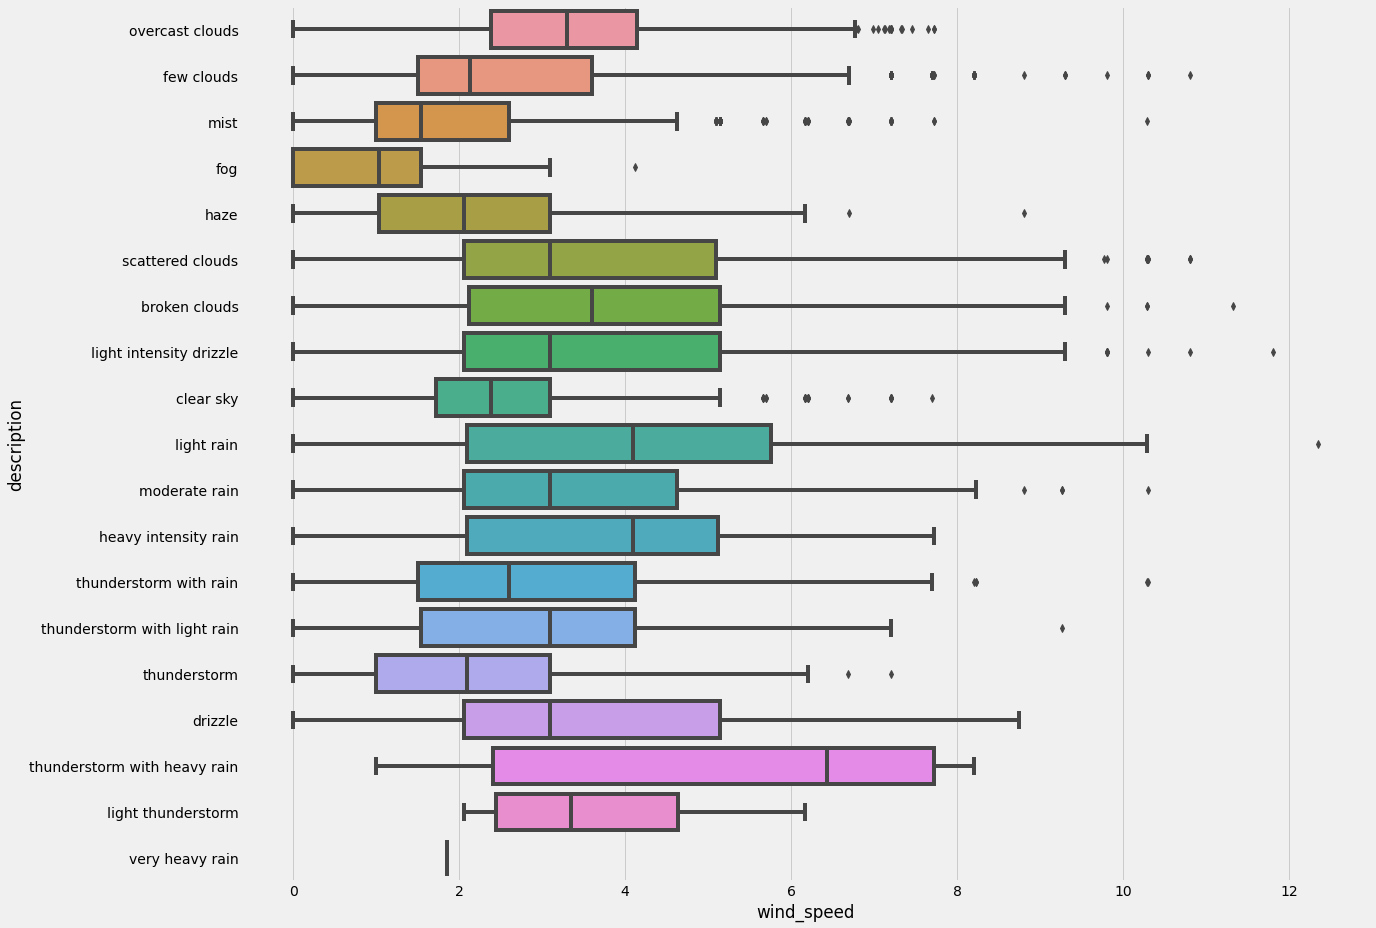

In [ ]:
plt.figure(figsize=(18, 15))
sns.boxplot(df.wind_speed, df.description)

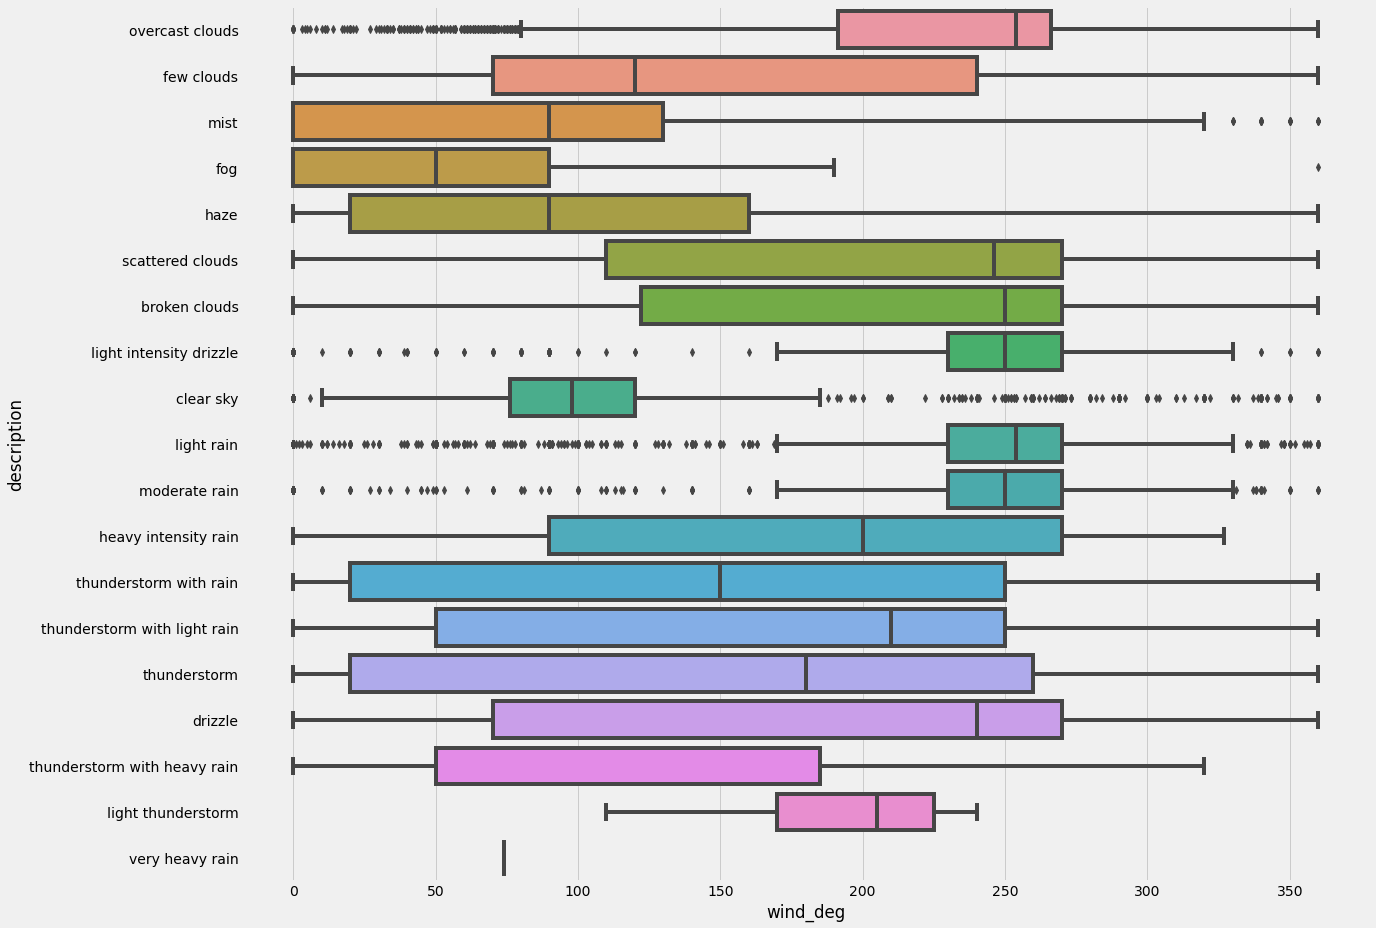

In [ ]:
plt.figure(figsize=(18, 15))
sns.boxplot(df.wind_deg, df.description)

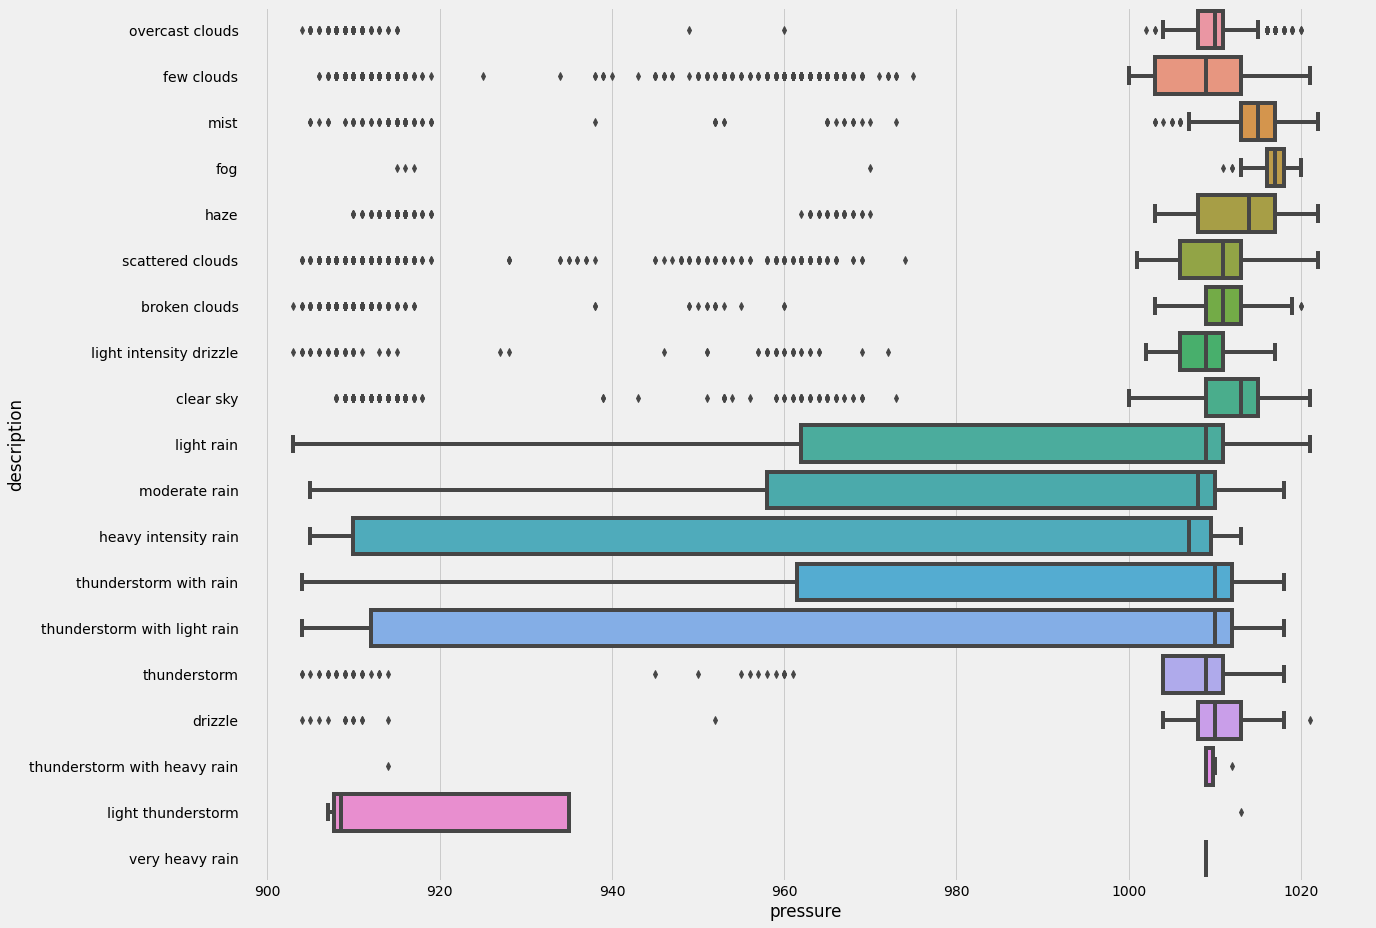

In [ ]:
plt.figure(figsize=(18, 15))
sns.boxplot(df.pressure, df.description)

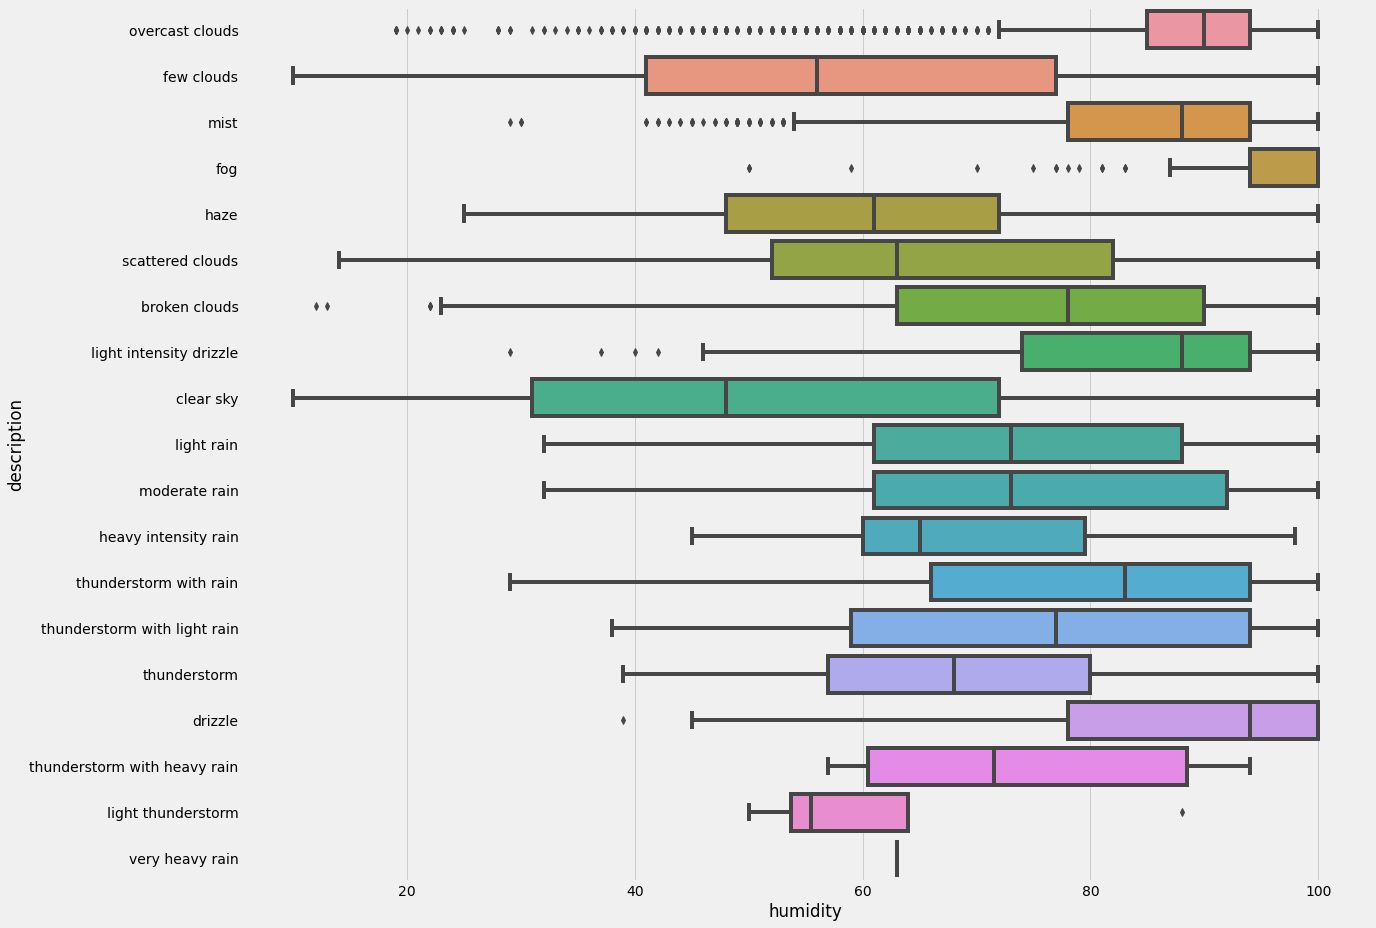

In [ ]:
plt.figure(figsize=(18, 15))
sns.boxplot(df.humidity, df.description)

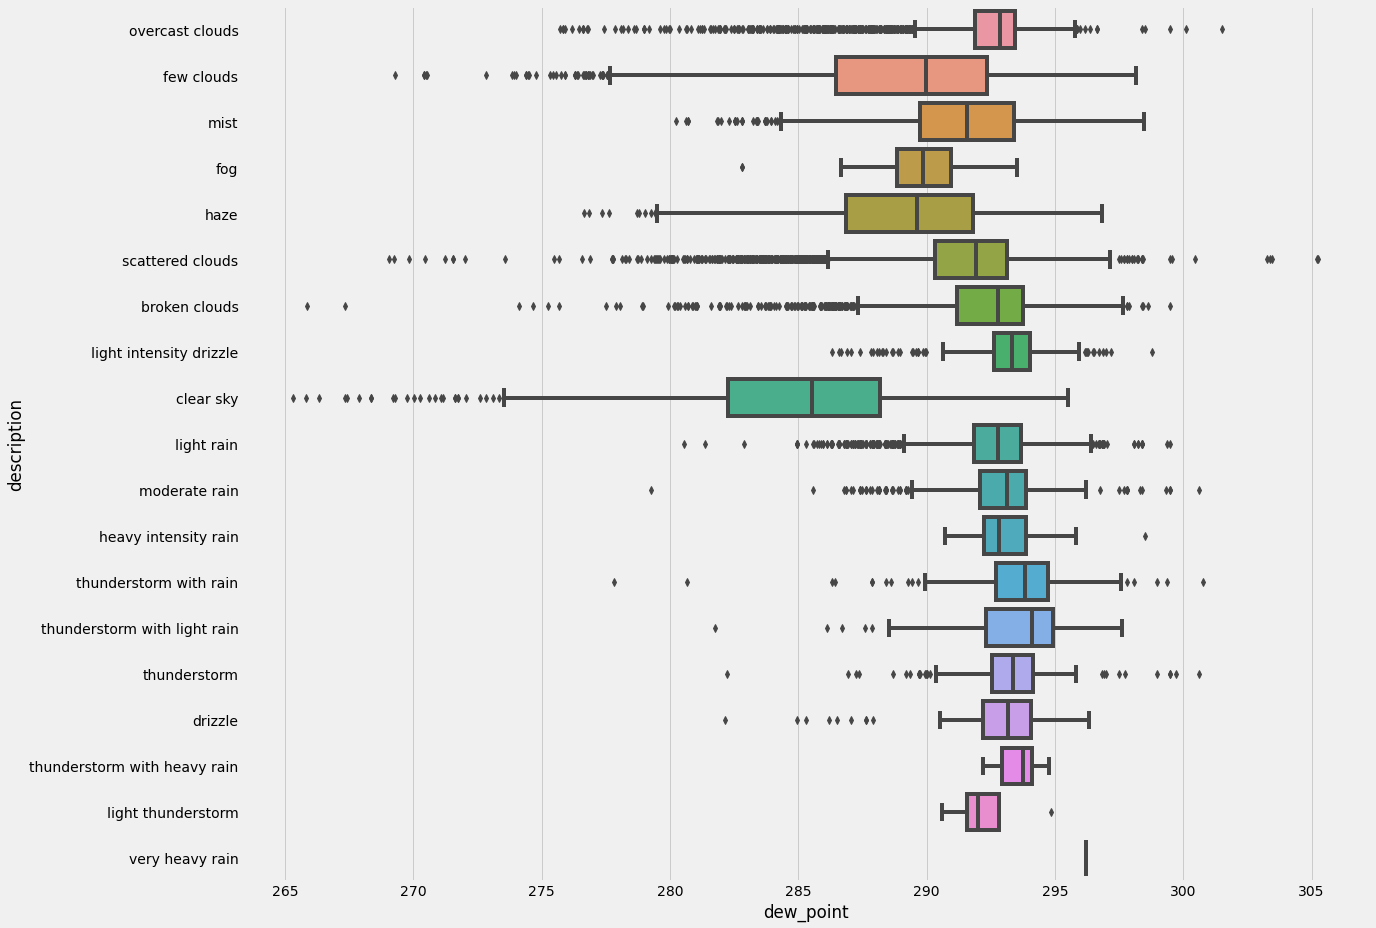

In [ ]:
plt.figure(figsize=(18, 15))
sns.boxplot(df.dew_point, df.description)

In [ ]:
#df.drop(df[df.description=="overcast clouds"].index, inplace=True)

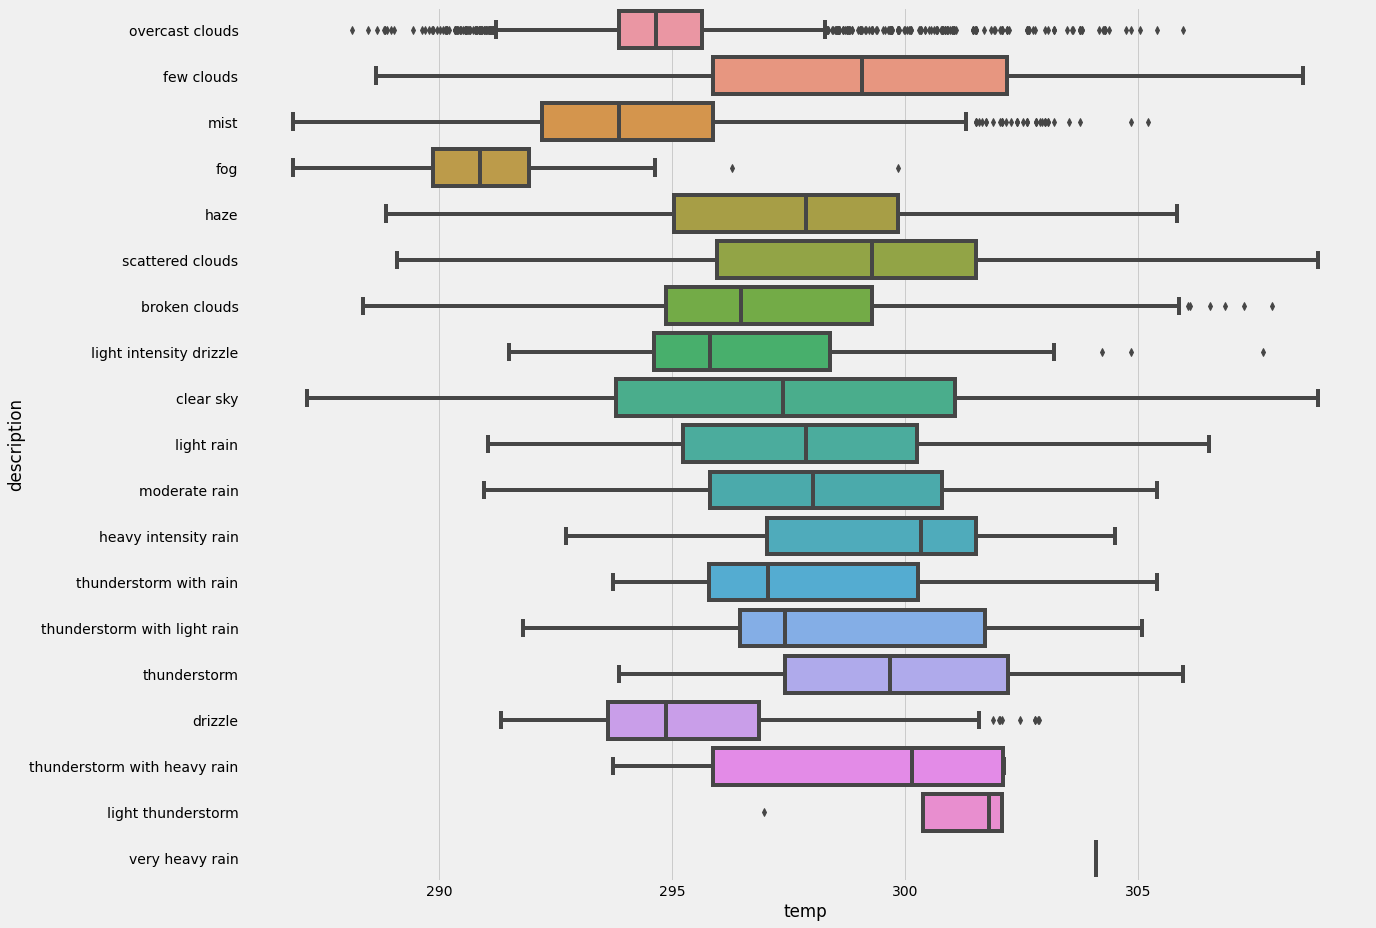

In [ ]:
plt.figure(figsize=(18, 15))
sns.boxplot(df.temp, df.description)

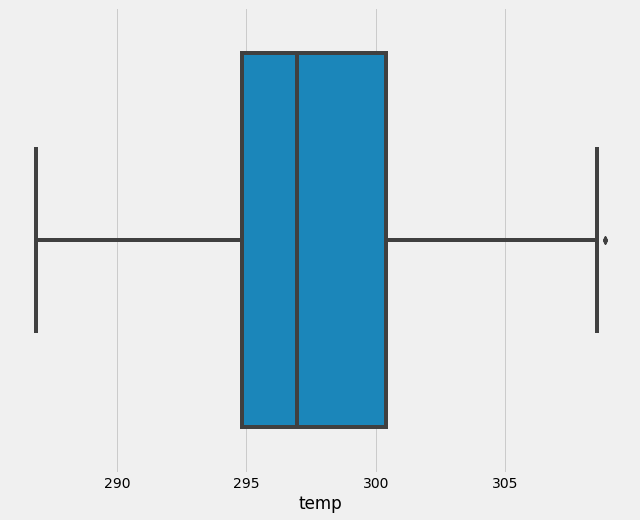

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(df.temp)

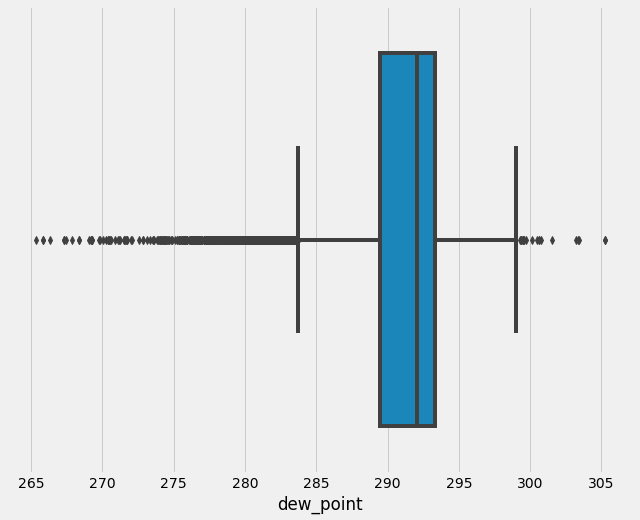

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(df.dew_point)

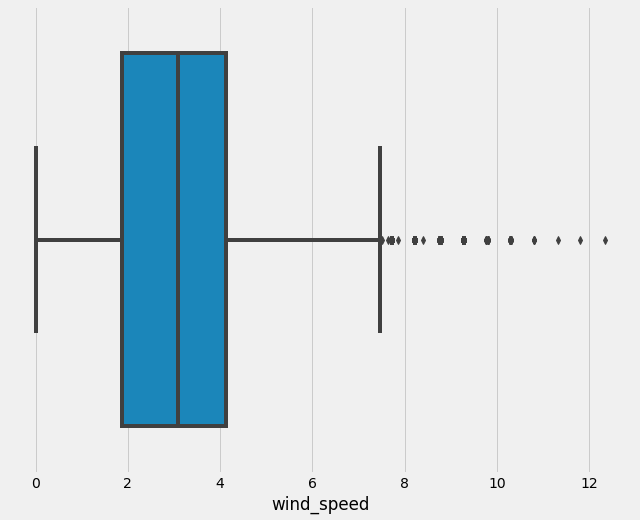

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(df.wind_speed)


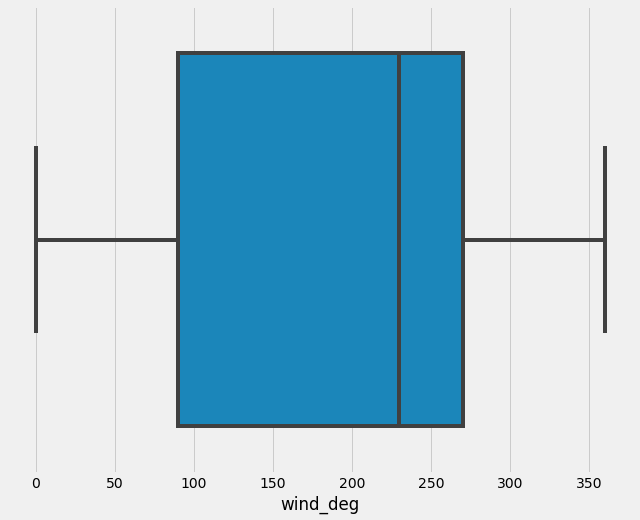

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(df.wind_deg)

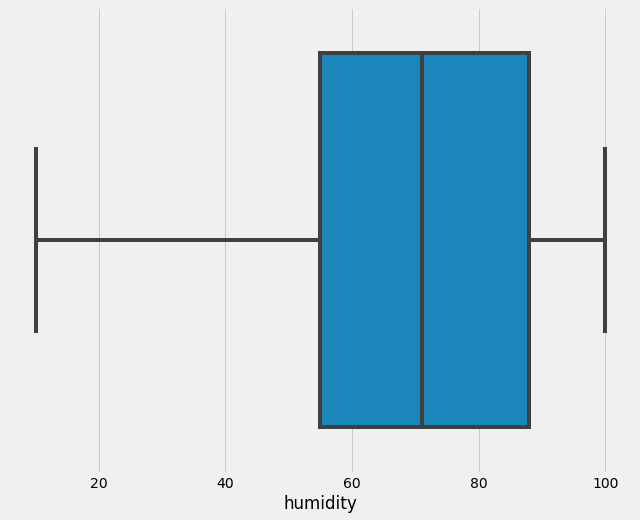

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(df.humidity)

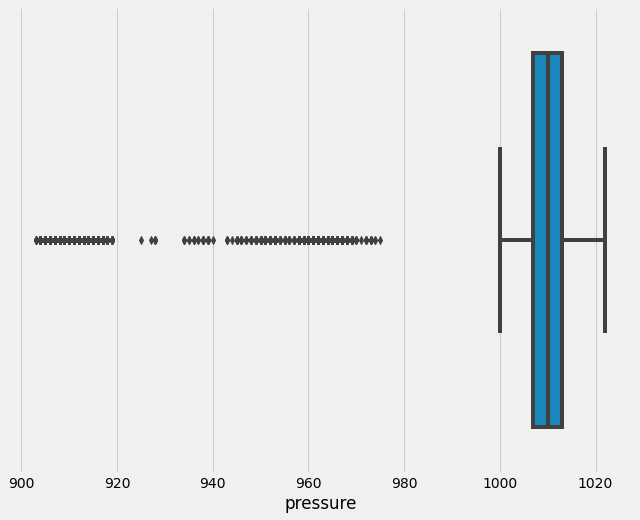

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(df.pressure)

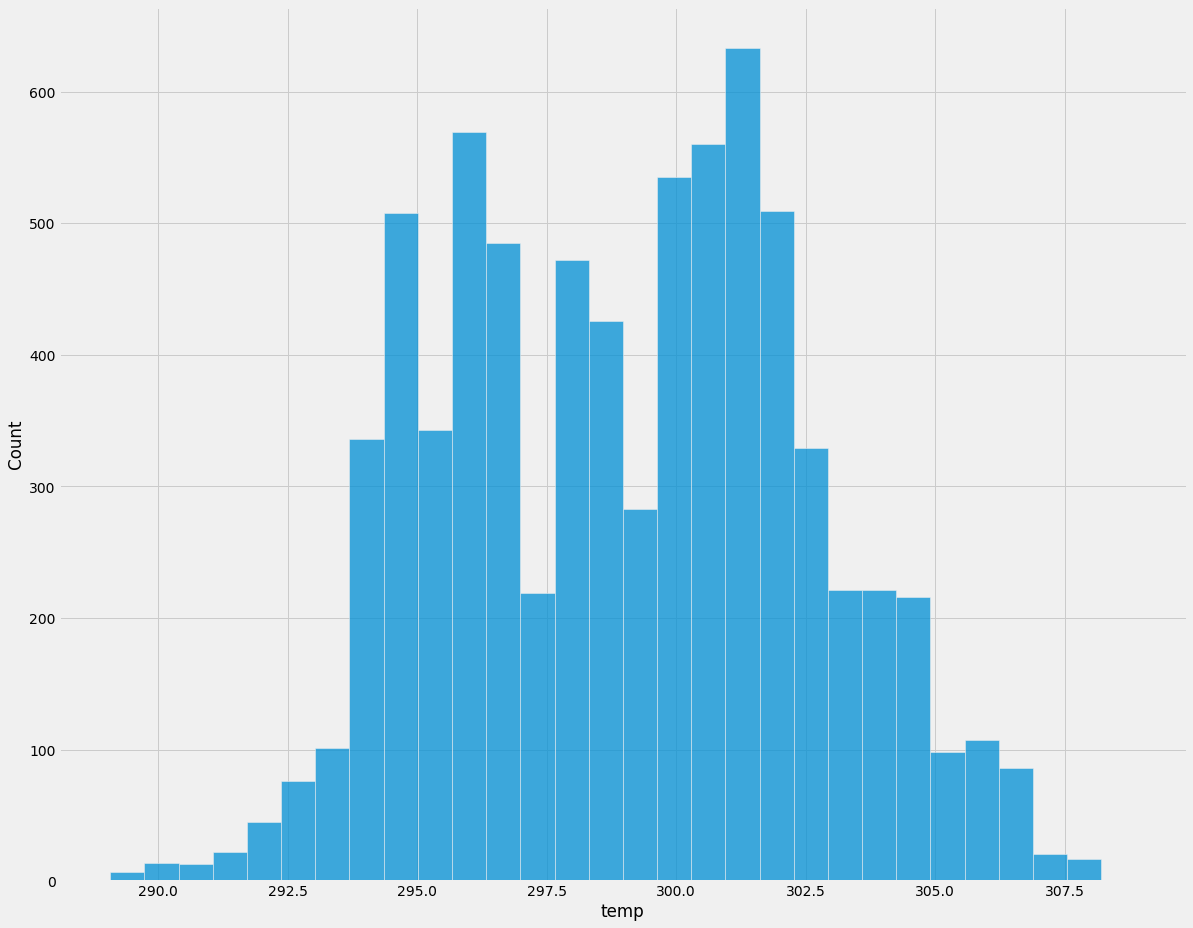

In [ ]:
plt.figure(figsize=(18, 15))
sns.histplot(df[df.description=="scattered clouds"].temp, bins=30)

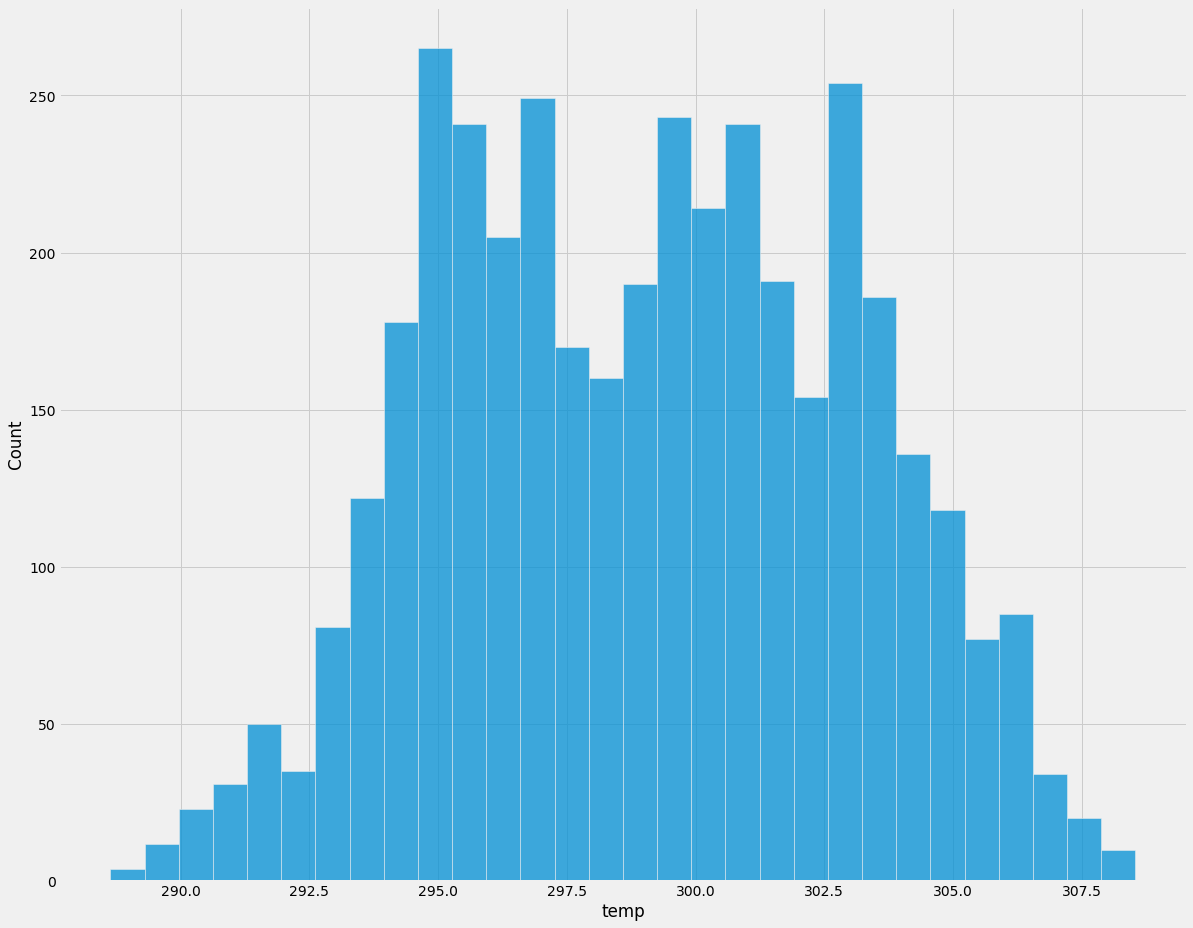

In [ ]:
plt.figure(figsize=(18, 15))
sns.histplot(df[df.description=="few clouds"].temp, bins=30)

In [ ]:
df[df.description=="scattered clouds"].describe()

,lat,lon,timezone_offset,sunrise,sunset,temp,feels_like,pressure,humidity,dew_point,clouds,wind_speed,wind_deg,id
count,7.473000e+03,7.473000e+03,7473.0,7.473000e+03,7.473000e+03,7473.000000,7473.000000,7473.000000,7473.000000,7473.000000,7473.000000,7473.000000,7473.000000,7473.0
mean,1.299890e+01,7.759200e+01,19800.0,1.610791e+09,1.610836e+09,299.055754,299.656776,991.010304,65.208216,291.342761,39.837147,3.577862,199.439449,802.0
std,3.552951e-15,1.421181e-14,0.0,3.599707e+07,3.599661e+07,3.468906,3.682499,40.040682,18.068696,2.896734,2.024701,1.976970,97.474174,0.0
min,1.299890e+01,7.759200e+01,19800.0,1.527813e+09,1.527859e+09,289.080000,289.030000,904.000000,14.000000,269.070000,25.000000,0.000000,0.000000,802.0
25%,1.299890e+01,7.759200e+01,19800.0,1.582766e+09,1.582808e+09,295.960000,296.480000,1006.000000,52.000000,290.330000,40.000000,2.060000,110.000000,802.0
50%,1.299890e+01,7.759200e+01,19800.0,1.621729e+09,1.621775e+09,299.280000,299.390000,1011.000000,63.000000,291.940000,40.000000,3.100000,246.000000,802.0
75%,1.299890e+01,7.759200e+01,19800.0,1.641950e+09,1.641991e+09,301.510000,302.550000,1013.000000,82.000000,293.120000,40.000000,5.100000,270.000000,802.0
max,1.299890e+01,7.759200e+01,19800.0,1.662425e+09,1.662469e+09,308.860000,312.260000,1022.000000,100.000000,305.260000,50.000000,10.800000,360.000000,802.0


In [ ]:
df[df.description=="broken clouds"].describe()

,lat,lon,timezone_offset,sunrise,sunset,temp,feels_like,pressure,humidity,dew_point,clouds,wind_speed,wind_deg,id
count,3029.0000,3029.000,3029.0,3.029000e+03,3.029000e+03,3029.000000,3029.000000,3029.000000,3029.000000,3029.000000,3029.000000,3029.000000,3029.000000,3029.0
mean,12.9989,77.592,19800.0,1.618153e+09,1.618197e+09,296.953453,297.532958,997.476065,76.078574,292.048280,73.658963,3.784962,210.794652,803.0
std,0.0000,0.000,0.0,3.340216e+07,3.340182e+07,3.004838,3.272817,35.377701,16.369085,2.755551,5.386474,2.013853,92.111956,0.0
min,12.9989,77.592,19800.0,1.527813e+09,1.527859e+09,288.350000,288.300000,903.000000,12.000000,265.840000,51.000000,0.000000,0.000000,803.0
25%,12.9989,77.592,19800.0,1.592440e+09,1.592486e+09,294.860000,295.410000,1009.000000,63.000000,291.180000,75.000000,2.120000,122.000000,803.0
50%,12.9989,77.592,19800.0,1.627865e+09,1.627910e+09,296.480000,296.800000,1011.000000,78.000000,292.790000,75.000000,3.600000,250.000000,803.0
75%,12.9989,77.592,19800.0,1.643419e+09,1.643461e+09,299.290000,299.350000,1013.000000,90.000000,293.770000,75.000000,5.140000,270.000000,803.0
max,12.9989,77.592,19800.0,1.662425e+09,1.662469e+09,307.860000,309.270000,1020.000000,100.000000,299.490000,84.000000,11.320000,360.000000,803.0


In [ ]:
df[df.description=="few clouds"].describe()

,lat,lon,timezone_offset,sunrise,sunset,temp,feels_like,pressure,humidity,dew_point,clouds,wind_speed,wind_deg,id
count,3.979000e+03,3.979000e+03,3979.0,3.979000e+03,3.979000e+03,3979.000000,3979.000000,3979.000000,3979.000000,3979.000000,3979.000000,3979.000000,3979.000000,3979.0
mean,1.299890e+01,7.759200e+01,19800.0,1.603616e+09,1.603660e+09,299.058588,299.233398,992.546368,58.193013,289.092330,19.774064,2.660344,143.718522,801.0
std,1.776580e-15,2.842528e-14,0.0,3.114985e+07,3.114931e+07,3.947939,3.927152,35.540049,20.980070,4.100441,1.375455,1.781807,100.264004,0.0
min,1.299890e+01,7.759200e+01,19800.0,1.527813e+09,1.527859e+09,288.640000,288.730000,906.000000,10.000000,269.280000,11.000000,0.000000,0.000000,801.0
25%,1.299890e+01,7.759200e+01,19800.0,1.580347e+09,1.580389e+09,295.860000,296.115000,1003.000000,41.000000,286.470000,20.000000,1.500000,70.000000,801.0
50%,1.299890e+01,7.759200e+01,19800.0,1.596069e+09,1.596115e+09,299.070000,299.290000,1009.000000,56.000000,289.960000,20.000000,2.130000,120.000000,801.0
75%,1.299890e+01,7.759200e+01,19800.0,1.624321e+09,1.624368e+09,302.190000,302.245000,1013.000000,77.000000,292.365000,20.000000,3.600000,240.000000,801.0
max,1.299890e+01,7.759200e+01,19800.0,1.662425e+09,1.662469e+09,308.540000,310.280000,1021.000000,100.000000,298.150000,24.000000,10.800000,360.000000,801.0


In [ ]:
df.main.value_counts()

Clouds          17576
Rain             3984
Clear            2185
Mist             1737
Drizzle           794
Haze              791
Thunderstorm      455
Fog               109
Name: main, dtype: int64

In [ ]:
# Main is the Dependent Variable

df.main.unique()

array(['Clouds', 'Mist', 'Fog', 'Haze', 'Drizzle', 'Clear', 'Rain',
       'Thunderstorm'], dtype=object)

In [ ]:
df.description.value_counts()

scattered clouds    10502
rain                 4778
few clouds           3979
clear sky            2185
mist                 1737
haze                  900
thunderstorm          455
Name: description, dtype: int64

**MIST VS HAZE**

In [ ]:
df[df.description == "mist"].describe()

,lat,lon,timezone_offset,sunrise,sunset,temp,feels_like,pressure,humidity,dew_point,clouds,wind_speed,wind_deg,id
count,1.286000e+03,1286.000,1286.0,1.286000e+03,1.286000e+03,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.0
mean,1.299890e+01,77.592,19800.0,1.634302e+09,1.634344e+09,293.958351,294.354813,1009.667185,85.229393,291.156586,45.121306,1.945016,85.448678,701.0
std,1.777048e-15,0.000,0.0,1.409871e+07,1.409906e+07,2.624163,2.848932,23.281421,13.342928,2.710236,26.091474,1.512924,83.452963,0.0
min,1.299890e+01,77.592,19800.0,1.609464e+09,1.609504e+09,286.860000,286.740000,905.000000,29.000000,280.220000,0.000000,0.000000,0.000000,701.0
25%,1.299890e+01,77.592,19800.0,1.618900e+09,1.618945e+09,292.100000,292.400000,1013.000000,78.000000,289.702500,20.000000,1.030000,0.000000,701.0
50%,1.299890e+01,77.592,19800.0,1.638666e+09,1.638707e+09,293.860000,294.230000,1015.000000,88.000000,291.295000,40.000000,2.060000,80.000000,701.0
75%,1.299890e+01,77.592,19800.0,1.643419e+09,1.643461e+09,295.610000,296.090000,1017.000000,94.000000,293.155000,75.000000,2.600000,110.000000,701.0
max,1.299890e+01,77.592,19800.0,1.662166e+09,1.662210e+09,305.200000,309.740000,1022.000000,100.000000,298.480000,100.000000,10.290000,360.000000,701.0


In [ ]:
df[df.description == "haze"].describe()

,lat,lon,timezone_offset,sunrise,sunset,temp,feels_like,pressure,humidity,dew_point,clouds,wind_speed,wind_deg,id
count,5.940000e+02,594.000,594.0,5.940000e+02,5.940000e+02,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.0
mean,1.299890e+01,77.592,19800.0,1.633378e+09,1.633420e+09,297.488569,297.685118,996.469697,60.604377,288.887744,33.235690,2.017963,96.127946,721.0
std,1.777854e-15,0.000,0.0,1.305398e+07,1.305385e+07,3.183572,3.544794,38.092812,15.306648,3.857351,25.379713,1.244302,88.830648,0.0
min,1.299890e+01,77.592,19800.0,1.609464e+09,1.609504e+09,288.860000,288.240000,910.000000,25.000000,276.670000,0.000000,0.000000,0.000000,721.0
25%,1.299890e+01,77.592,19800.0,1.617864e+09,1.617908e+09,295.135000,295.267500,1010.000000,48.000000,286.460000,20.000000,1.030000,20.000000,721.0
50%,1.299890e+01,77.592,19800.0,1.638536e+09,1.638577e+09,297.590000,297.595000,1014.000000,61.000000,289.370000,37.000000,2.060000,90.000000,721.0
75%,1.299890e+01,77.592,19800.0,1.643657e+09,1.643698e+09,299.305000,299.390000,1017.000000,71.000000,291.710000,40.000000,3.090000,130.000000,721.0
max,1.299890e+01,77.592,19800.0,1.652747e+09,1.652793e+09,305.830000,308.420000,1021.000000,100.000000,296.830000,100.000000,6.170000,360.000000,721.0


In [ ]:
df.description.unique()

array(['overcast clouds', 'few clouds', 'mist', 'fog', 'haze',
       'scattered clouds', 'broken clouds', 'light intensity drizzle',
       'clear sky', 'light rain', 'moderate rain', 'heavy intensity rain',
       'thunderstorm with rain', 'thunderstorm with light rain',
       'thunderstorm', 'drizzle', 'thunderstorm with heavy rain',
       'light thunderstorm', 'very heavy rain'], dtype=object)

In [ ]:
df.icon.unique()

array(['04n', '02n', '50n', '50d', '02d', '03d', '03n', '09n', '01n',
       '10d', '04d', '10n', '09d', '01d', '11d', '11n'], dtype=object)

In [ ]:
# 10d  ---> Means Rainy

print(df[df.icon == "10d"].main.unique())
print(df[df.icon == "10d"].description.unique())

['Rain']
['light rain' 'moderate rain' 'heavy intensity rain']


In [ ]:
# 01d ---> Means Sunny(Morning)

print(df[df.icon == "01d"].main.unique())
print(df[df.icon == "01d"].description.unique())

['Clear']
['clear sky']


In [ ]:
# 01n  ----> Night

print(df[df.icon == "01n"].main.unique())
print(df[df.icon == "01n"].description.unique())

['Clear']
['clear sky']


In [ ]:
# 02d   ------> Cloudy Day (Morning)

print(df[df.icon == "02d"].main.unique())
print(df[df.icon == "02d"].description.unique())

['Clouds']
['few clouds']


In [ ]:
# 02n  ------> Cloudy Day (Nyt)

print(df[df.icon == "02n"].main.unique())
print(df[df.icon == "02n"].description.unique())

['Clouds']
['few clouds']


In [ ]:
df.description.value_counts()

scattered clouds                6509
few clouds                      2010
overcast clouds                 1921
clear sky                       1678
mist                            1286
light rain                      1195
haze                             594
moderate rain                    326
light intensity drizzle          281
drizzle                          145
thunderstorm                     107
fog                               91
thunderstorm with rain            86
thunderstorm with light rain      61
heavy intensity rain              16
light thunderstorm                 4
thunderstorm with heavy rain       3
very heavy rain                    1
Name: description, dtype: int64

In [ ]:
df[df.description == "moderate rain"].describe()

,lat,lon,timezone_offset,sunrise,sunset,temp,feels_like,pressure,humidity,dew_point,clouds,wind_speed,wind_deg,id
count,3.260000e+02,326.000,326.0,3.260000e+02,3.260000e+02,326.000000,326.000000,326.000000,326.000000,326.000000,326.00000,326.000000,326.000000,326.0
mean,1.299890e+01,77.592,19800.0,1.642275e+09,1.642320e+09,297.255951,298.068466,971.653374,79.165644,293.036718,74.07362,3.408313,223.871166,501.0
std,3.558175e-15,0.000,0.0,1.592557e+07,1.592575e+07,2.909952,3.422842,49.295587,16.357455,2.547511,22.38765,1.984798,89.198182,0.0
min,1.299890e+01,77.592,19800.0,1.609896e+09,1.609937e+09,290.960000,291.300000,905.000000,32.000000,279.250000,20.00000,0.000000,0.000000,501.0
25%,1.299890e+01,77.592,19800.0,1.626395e+09,1.626442e+09,294.860000,295.540000,909.000000,64.000000,292.180000,59.50000,2.060000,229.000000,501.0
50%,1.299890e+01,77.592,19800.0,1.637197e+09,1.637238e+09,296.910000,297.320000,1008.000000,81.000000,293.365000,75.00000,3.090000,250.000000,501.0
75%,1.299890e+01,77.592,19800.0,1.659228e+09,1.659273e+09,298.860000,299.390000,1010.000000,94.000000,294.502500,100.00000,5.097500,270.000000,501.0
max,1.299890e+01,77.592,19800.0,1.662511e+09,1.662555e+09,304.850000,309.270000,1018.000000,100.000000,300.600000,100.00000,9.260000,360.000000,501.0


In [ ]:
df[df.description == "light rain"].describe()

,lat,lon,timezone_offset,sunrise,sunset,temp,feels_like,pressure,humidity,dew_point,clouds,wind_speed,wind_deg,id
count,1.195000e+03,1195.000,1195.0,1.195000e+03,1.195000e+03,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.0
mean,1.299890e+01,77.592,19800.0,1.639102e+09,1.639148e+09,297.440033,298.097682,968.486192,74.999163,292.309347,70.397490,3.967782,226.555649,500.0
std,1.777101e-15,0.000,0.0,1.657510e+07,1.657525e+07,2.940564,3.280074,49.596635,16.347488,2.481373,24.032017,2.196282,83.816078,0.0
min,1.299890e+01,77.592,19800.0,1.609636e+09,1.609677e+09,291.040000,291.260000,903.000000,33.000000,280.550000,20.000000,0.000000,0.000000,500.0
25%,1.299890e+01,77.592,19800.0,1.625618e+09,1.625664e+09,294.970000,295.580000,909.000000,61.000000,291.570000,40.000000,2.100000,230.000000,500.0
50%,1.299890e+01,77.592,19800.0,1.630889e+09,1.630933e+09,296.910000,297.450000,1007.000000,75.000000,292.800000,75.000000,3.640000,255.000000,500.0
75%,1.299890e+01,77.592,19800.0,1.658191e+09,1.658237e+09,299.340000,299.650000,1010.000000,91.000000,293.800000,95.000000,5.635000,270.000000,500.0
max,1.299890e+01,77.592,19800.0,1.662770e+09,1.662815e+09,306.510000,307.740000,1021.000000,100.000000,299.490000,100.000000,12.350000,360.000000,500.0


In [ ]:
df.description.value_counts()

scattered clouds                6509
few clouds                      2010
overcast clouds                 1921
clear sky                       1678
light rain                      1521
mist                            1286
haze                             594
drizzle                          426
thunderstorm                     107
fog                               91
thunderstorm with rain            86
thunderstorm with light rain      61
heavy intensity rain              16
light thunderstorm                 4
thunderstorm with heavy rain       3
very heavy rain                    1
Name: description, dtype: int64

In [ ]:
df[df.description == "thunderstorm with light rain"].describe()

,lat,lon,timezone_offset,sunrise,sunset,temp,feels_like,pressure,humidity,dew_point,clouds,wind_speed,wind_deg,id
count,6.100000e+01,6.100000e+01,61.0,6.100000e+01,6.100000e+01,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.0
mean,1.299890e+01,7.759200e+01,19800.0,1.643453e+09,1.643498e+09,298.321311,299.400492,989.508197,75.885246,293.211475,70.983607,2.691148,158.360656,200.0
std,5.373296e-15,2.865758e-14,0.0,1.280920e+07,1.281007e+07,3.293869,4.169357,42.353915,19.019375,3.177711,18.069765,1.817577,110.244884,0.0
min,1.299890e+01,7.759200e+01,19800.0,1.613697e+09,1.613739e+09,291.790000,292.010000,904.000000,38.000000,281.760000,40.000000,0.000000,0.000000,200.0
25%,1.299890e+01,7.759200e+01,19800.0,1.633135e+09,1.633178e+09,296.020000,296.520000,1008.000000,59.000000,291.830000,75.000000,1.540000,40.000000,200.0
50%,1.299890e+01,7.759200e+01,19800.0,1.651279e+09,1.651324e+09,296.910000,297.900000,1010.000000,82.000000,294.150000,75.000000,2.570000,200.000000,200.0
75%,1.299890e+01,7.759200e+01,19800.0,1.652747e+09,1.652793e+09,301.380000,302.450000,1012.000000,94.000000,295.450000,75.000000,4.120000,250.000000,200.0
max,1.299890e+01,7.759200e+01,19800.0,1.661734e+09,1.661778e+09,305.070000,309.160000,1018.000000,100.000000,297.600000,100.000000,9.260000,360.000000,200.0


In [ ]:
df[df.description == "thunderstorm with rain"].describe()

,lat,lon,timezone_offset,sunrise,sunset,temp,feels_like,pressure,humidity,dew_point,clouds,wind_speed,wind_deg,id
count,8.600000e+01,8.600000e+01,86.0,8.600000e+01,8.600000e+01,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.0
mean,1.299890e+01,7.759200e+01,19800.0,1.640143e+09,1.640188e+09,298.295349,299.346628,970.162791,75.709302,293.135698,71.279070,3.278837,156.744186,201.0
std,5.360326e-15,2.858841e-14,0.0,1.609876e+07,1.609897e+07,3.006084,3.727234,49.314802,18.962419,3.413900,18.022634,2.046570,109.064922,0.0
min,1.299890e+01,7.759200e+01,19800.0,1.613697e+09,1.613739e+09,293.720000,294.440000,904.000000,29.000000,277.830000,20.000000,0.000000,0.000000,201.0
25%,1.299890e+01,7.759200e+01,19800.0,1.622766e+09,1.622812e+09,295.985000,296.555000,910.000000,60.250000,292.325000,75.000000,2.060000,70.000000,201.0
50%,1.299890e+01,7.759200e+01,19800.0,1.636937e+09,1.636979e+09,298.005000,298.305000,1009.500000,77.000000,293.755000,75.000000,3.090000,160.000000,201.0
75%,1.299890e+01,7.759200e+01,19800.0,1.655296e+09,1.655342e+09,300.770000,302.952500,1012.000000,94.000000,294.835000,75.000000,4.120000,250.000000,201.0
max,1.299890e+01,7.759200e+01,19800.0,1.662338e+09,1.662383e+09,305.400000,307.290000,1016.000000,100.000000,300.770000,100.000000,10.290000,340.000000,201.0


In [ ]:
df[df.description == "thunderstorm"].describe()

,lat,lon,timezone_offset,sunrise,sunset,temp,feels_like,pressure,humidity,dew_point,clouds,wind_speed,wind_deg,id,index,Unnamed: 0.1,Unnamed: 0
count,1.870000e+02,1.870000e+02,187.0,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.0,22.000000,38.000000,25.000000
mean,1.299890e+01,7.759200e+01,19800.0,1.619141e+09,1.619186e+09,299.950428,301.149358,987.967914,68.406417,293.218503,51.684492,2.436578,168.395722,211.0,859.727273,2552.894737,713.240000
std,1.781126e-15,1.424900e-14,0.0,2.633570e+07,2.633519e+07,2.876085,3.502254,40.174606,15.476154,2.193218,20.556032,1.674127,118.178804,0.0,472.313574,1497.997524,761.871177
min,1.299890e+01,7.759200e+01,19800.0,1.584666e+09,1.584709e+09,294.130000,294.890000,904.000000,39.000000,282.210000,20.000000,0.000000,0.000000,211.0,20.000000,20.000000,50.000000
25%,1.299890e+01,7.759200e+01,19800.0,1.593304e+09,1.593350e+09,297.565000,298.030000,1004.000000,57.000000,292.550000,40.000000,1.000000,30.000000,211.0,693.250000,830.250000,324.000000
50%,1.299890e+01,7.759200e+01,19800.0,1.619656e+09,1.619701e+09,299.990000,301.560000,1009.000000,65.000000,293.380000,40.000000,2.100000,220.000000,211.0,831.500000,3198.500000,750.000000
75%,1.299890e+01,7.759200e+01,19800.0,1.649983e+09,1.650028e+09,302.270000,304.265000,1011.000000,78.500000,294.130000,75.000000,4.100000,270.000000,211.0,1314.000000,3870.750000,809.000000
max,1.299890e+01,7.759200e+01,19800.0,1.662166e+09,1.662210e+09,305.960000,307.670000,1018.000000,100.000000,300.600000,100.000000,7.200000,360.000000,211.0,1478.000000,3950.000000,3045.000000


In [60]:
df.description = np.where(df.description == "heavy intensity rain", "rain", df.description)
df.description = np.where(df.description == "very heavy rain", "rain", df.description)
df.description = np.where(df.description == "thunderstorm with heavy rain", "thunderstorm", df.description)
df.description = np.where(df.description == "light thunderstorm", "thunderstorm", df.description)
df.description = np.where(df.description == "light intensity drizzle", "drizzle", df.description)
df.description = np.where(df.description == "moderate rain", "light rain", df.description)
df.description = np.where(df.description == "broken clouds", "scattered clouds", df.description)

# New 

df.description = np.where(df.description == "drizzle", "rain", df.description)
df.description = np.where(df.description == "light rain", "rain", df.description)
df.description = np.where(df.description == "thunderstorm with rain", "thunderstorm", df.description)
df.description = np.where(df.description == "thunderstorm with light rain", "thunderstorm", df.description)
df.description = np.where(df.description == "fog", "haze", df.description)
df = df[df.description != "overcast clouds"]

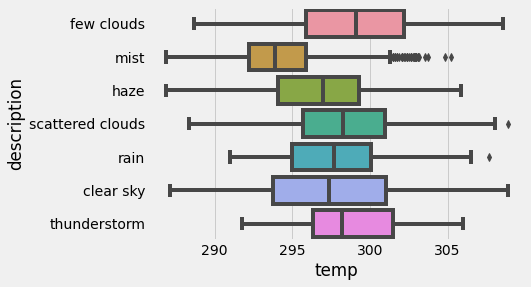

In [ ]:
sns.boxplot(df.temp, df.description)

In [ ]:
df.description.value_counts()

scattered clouds    9204
rain                3653
few clouds          3394
clear sky           2179
mist                1722
haze                 860
thunderstorm         417
Name: description, dtype: int64

In [ ]:
visibility_dataset = pd.read_csv("/content/weatherHistory.csv")

In [ ]:
visibility_dataset

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [ ]:
visibility_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


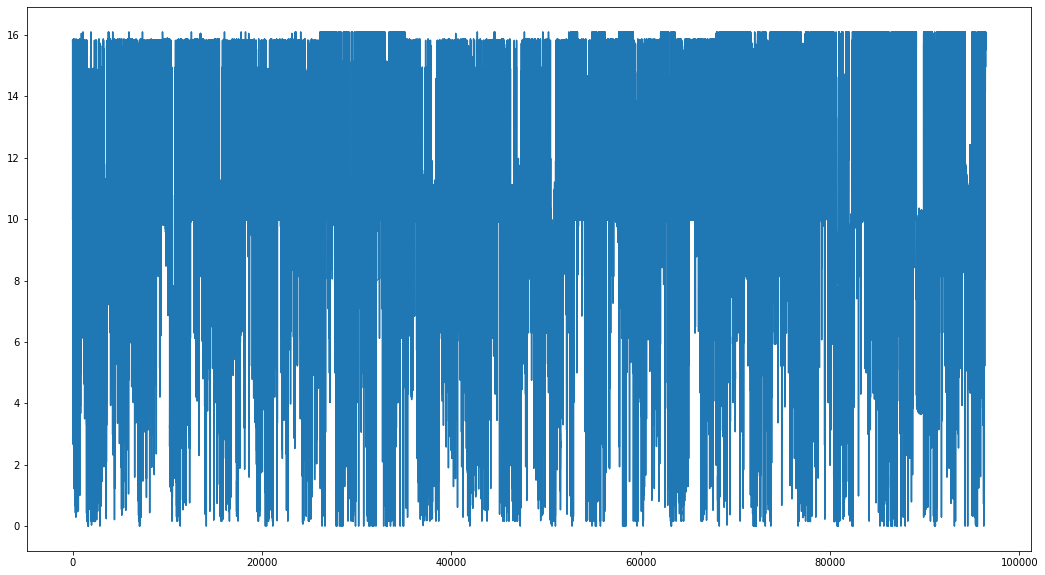

In [ ]:
visibility_dataset["Visibility (km)"].plot(figsize=(18, 10))

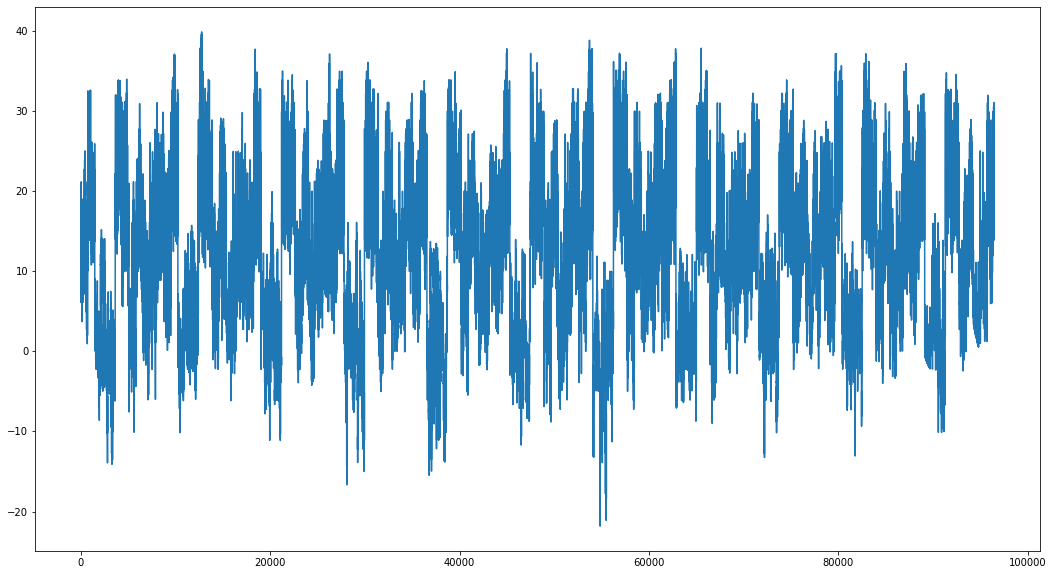

In [ ]:
visibility_dataset["Temperature (C)"].plot(figsize=(18, 10))

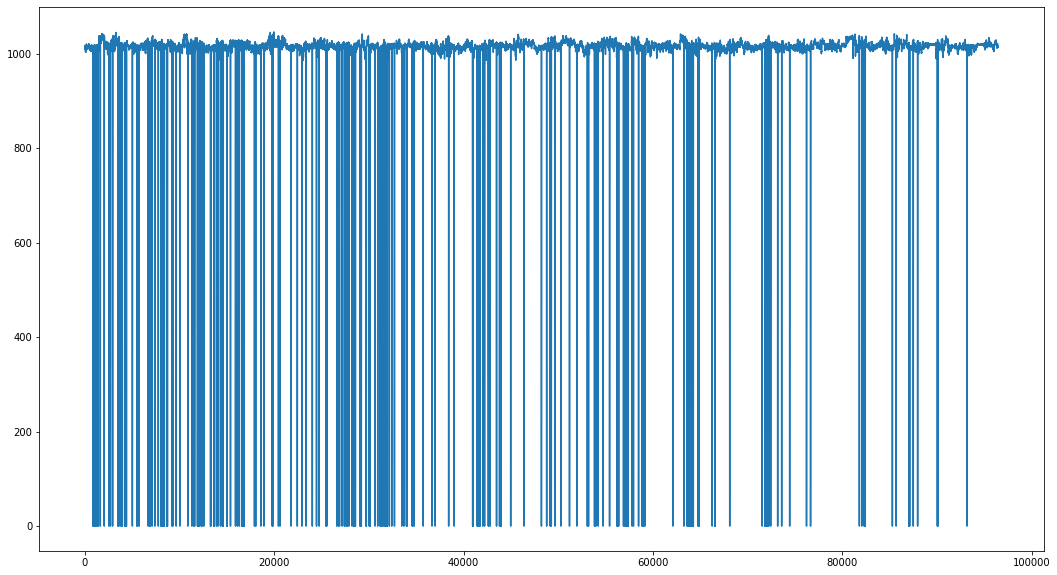

In [ ]:
# Pressure (millibars)

visibility_dataset["Pressure (millibars)"].plot(figsize=(18, 10))

In [ ]:
visibility_dataset["Visibility (km)"].describe()

count    96453.000000
mean        10.347325
std          4.192123
min          0.000000
25%          8.339800
50%         10.046400
75%         14.812000
max         16.100000
Name: Visibility (km), dtype: float64

### **Model Building**

In [61]:
y = df["description"]
df.drop(["description", "icon", "main", "id", "sunrise", "sunset", "timezone_offset", "timezone", "lat", "lon", "dt"], axis=1, inplace=True)
X = df

y_scatter_cloud_index = y[y == "scattered clouds"].index 
X.drop(y_scatter_cloud_index[0: 5000], inplace=True)
X.drop(y[y=="thunderstorm"].index, inplace=True)

X.drop(y[y=="haze"].index, inplace=True)
y = y[X.index]

In [ ]:
y.value_counts()

scattered clouds    3394
few clouds          3203
rain                2932
clear sky           2179
mist                1683
Name: description, dtype: int64

## **Oulier Detection using Isolation Forest**

In [62]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100, random_state=42, contamination=0.2)
isolation_forest.fit(X)
new_X = isolation_forest.predict(X)

In [63]:
pd.Series(new_X).value_counts()

 1    14545
-1     3636
dtype: int64

In [64]:
outlier_scores_from_if = isolation_forest.decision_function(X)

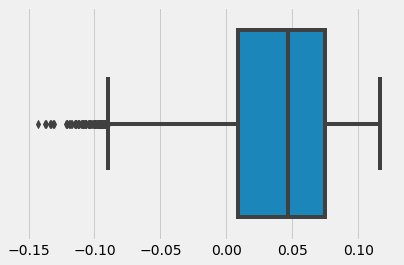

In [65]:
sns.boxplot(outlier_scores_from_if)

In [79]:
# iqr = q3 - q1 

def get_non_anomolies(data): 
  q1, q3 = np.percentile(data, [25, 75])
  iqr = q3 - q1 
  upper_bound = q3 + (1.5 * iqr)
  lower_bound = q1 - (1.5 * iqr)
  return np.where((data < upper_bound) & (data > lower_bound)) 

In [154]:
def z_score(data, threshold=3): 
  std = data.std()
  mean = data.mean()
  z_scores = [((i - mean) / std) for i in data]
  result = [] 
  indx = []
  for idx, score in enumerate(z_scores):
    if score < threshold and score > (-1*threshold): 
      result.append(score)
      indx.append(idx)
  return result, indx

In [155]:
result, indx = z_score(outlier_scores_from_if, 2.4)
#result = np.array(result)
print(result)

[-0.6903662821458701, -0.7495694964306661, -1.2057882657654022, 0.08088294101393952, 0.2961484376578777, -0.026498618224493575, -0.3036113312727865, 0.0769594921672579, -0.6093140088549895, -0.36888884481021045, 0.7478926009462683, 0.5675055156662117, 0.19770473195923277, 0.049520881619447454, 0.23827342471407573, -0.031296722801034786, -0.9752808581916145, -1.72620030350937, -0.48405682426204366, 0.36862947473824564, 0.354014800694373, 1.0575761429423551, 1.0193664466302412, 0.925800696646828, 0.6293343668008757, 0.7304651259008346, 0.6445321924333001, -0.2467133796988653, -0.6805723038688224, -0.13141421395157726, 0.5839143617577542, 0.5772589903969648, 0.3603819202695937, 0.5907657349227563, 0.9829759151252078, 0.02607827015889902, -0.14617261955215902, -0.15234169663438504, 0.42581602152288744, -0.6250427192098473, 0.10681482415301954, -0.16323377192525954, -0.45725465831916845, 0.3453161099209215, -0.42753054911272353, -0.5532274752663207, -0.9933064163839103, -0.17749437691183323

In [134]:
len(result)

17845

In [161]:
new_X = X.iloc[indx]
new_y = y[new_X.index]

In [160]:
new_X

,temp,feels_like,pressure,humidity,dew_point,clouds,wind_speed,wind_deg
1,291.87,291.99,1013,84,289.11,20,0.0,0
4,290.70,290.94,1013,93,289.56,20,1.0,50
5,290.86,291.30,1016,100,290.86,75,2.1,90
7,291.76,291.84,1015,83,288.82,20,1.5,50
8,292.86,293.03,1018,82,289.70,40,3.1,90
...,...,...,...,...,...,...,...,...
27626,297.86,298.19,1014,69,291.79,40,6.2,270
27627,298.86,299.18,1014,65,291.79,40,7.7,270
27628,298.37,298.64,1009,65,291.33,40,5.1,230
27629,299.86,300.94,1013,61,291.72,40,7.2,270


In [80]:
new_X = get_non_anomolies(outlier_scores_from_if)[0]

In [69]:
print("Number of Anamolies Detected: ", len(X) - len(new_X))

Number of Anamolies Detected:  125


In [81]:
new_X

array([    0,     1,     2, ..., 18178, 18179, 18180])

In [73]:
outlier_scores_from_if

array([ 0.0075081 ,  0.00480455, -0.01602899, ...,  0.10896629,
        0.09034539,  0.07892173])

In [ ]:
# For Testing Purpose
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=3)
new_x = pca.fit_transform(X)

In [ ]:
new_x.shape

(18181, 2)

In [ ]:
X = pd.DataFrame(new_x)

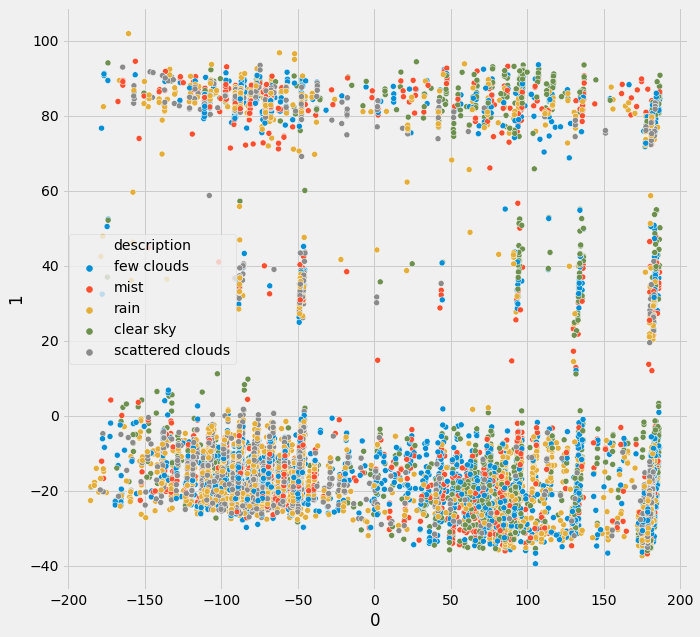

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(X[0], X[1], hue=y)

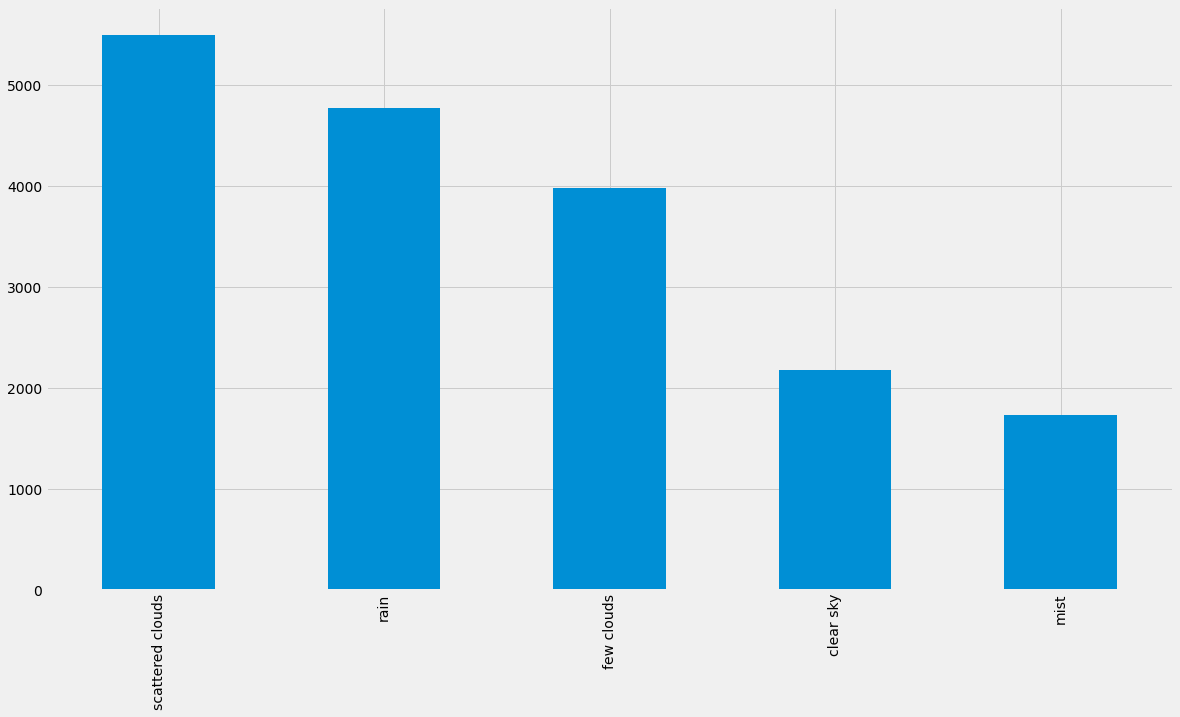

In [ ]:
y.value_counts().plot(kind="bar", figsize=(18, 10))

## **Handling Imbalanced Dataset**

In [47]:
# Implementing the Imabalance Dataset Handler using the State Design Pattern 


class SamplerState(ABC):
  @abstractmethod
  def fit_resample(self): 
    pass 


class HandleImbalanceContext: 
  
  def __init__(self, state: SamplerState):
    self._state = state 

  def current_state(self) -> None: 
    print("Current State is: ", self._state)

  def set_state(self, state) -> None: 
    self._state = state
    print("Old State has been modified!!")

  def fit_resample(self, X, y) -> None:  
    print("Started the Resampling ")
    return self._state.fit_resample(X, y)


class SmoteSampler(SamplerState): 

  def __init__(self, k_neighbors=4):
    self.k_neighbors = k_neighbors 

  def fit_resample(self, X, y): 
    self.sampler = SMOTE(k_neighbors=self.k_neighbors)
    print(self.sampler)
    return self.sampler.fit_resample(X, y)
    

class ADASYNSampler(SamplerState): 

  def fit_resample(self, X, y): 
    self.sampler = ADASYN()
    return self.sampler.fit_resample(X, y)


class KmeansSmoteSampler(SamplerState): 

  def __init__(self, k_neighbors=5):
    self.k_neighbors = k_neighbors

  def fit_resample(self, X, y): 
    self.sampler = KMeansSMOTE(k_neighbors=self.k_neighbors)
    return self.sampler.fit_resample(X, y)


class SVMSmoteSampler(SamplerState): 

  def fit_resample(self, X, y): 
    self.sampler = SVMSMOTE()
    return self.sampler.fit_resample(X, y)


class BorderLineSmoteSampler(SamplerState): 

  def __init__(self, k_neighbors=5):
    self.k_neighbors = k_neighbors
   
  def fit_resample(self, X, y): 
    self.sampler = BorderlineSMOTE(k_neighbors=self.k_neighbors)
    return self.sampler.fit_resample(X, y)



class OverSampler(SamplerState): 
   
  def fit_resample(self, X, y): 
    self.sampler = RandomOverSampler()
    return self.sampler.fit_resample(X, y)


In [ ]:
import sklearn, optuna
import numpy as np 

#Hnadling Imbalance using the SMOTE Algorithm.
#x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.22, stratify=y)
print("Number of  Data Before Handling Imbalance: ", len(new_X))
handler = HandleImbalanceContext(SmoteSampler(4))
new_X, new_y = handler.fit_resample(new_X, new_y)
y.value_counts().plot(kind="bar", figsize=(18, 10))
print("Number of  Data After Handling Imbalance: ", len(new_X)) 
print()


def objective(trial):
    
    kfolds = KFold(6)
    scores = []
    for fold in kfolds.split(new_X, new_y): 
      train_idx, test_idx = fold[0], fold[1]
      x_train, y_train = new_X.iloc[train_idx], new_y.iloc[train_idx]
      x_test, y_test = new_X.iloc[test_idx], new_y.iloc[test_idx]

      label_encoder = LabelEncoder()
      label_encoder.fit(y_train)
      y_train = label_encoder.transform(y_train)
      y_test = label_encoder.transform(y_test)
      dtrain = lgb.Dataset(x_train, label=y_train)
      dvalid = lgb.Dataset(x_test, label=y_test)
      param = {
        "objective": "multiclass",
          "metric": "multi_logloss",
          "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
          "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
          "verbosity": -1,
          "n_estimators": trial.suggest_int("n_estimators", 100, 5000, 100),
          "boosting_type": trial.suggest_categorical("boosting_type", ["gbdt", "dart"]),
          "num_leaves": trial.suggest_int("num_leaves", 2, 200),
          "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
          "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
          "bagging_freq": trial.suggest_int("bagging_freq", 1, 8),
          "min_child_samples": trial.suggest_int("min_child_samples", 5, 80),
          "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
          "num_classes": 7
      }
      # Add a callback for pruning.
      pruning_callback = optuna.integration.LightGBMPruningCallback(trial, "multi_logloss")
      gbm = lgb.train(param, dtrain, valid_sets=[dtrain, dvalid],
                          valid_names=['train', 'test'],
                          num_boost_round=7000,early_stopping_rounds= 500,
                          verbose_eval=100,)
      preds = gbm.predict(x_test)
      pred_labels = np.rint(preds)

      labeled_prediction = [row.argmax() for row in preds]
      f1_score_ = sklearn.metrics.f1_score(y_test, labeled_prediction, average="weighted")
      scores.append(f1_score_)
    
    print("f-scores from cross validation", scores)
    return np.array(scores).mean()


study = optuna.create_study(
        pruner=optuna.pruners.MedianPruner(n_warmup_steps=10), direction="maximize"
    )

study.optimize(objective, n_trials=20)
print("Number of finished trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
  print("    {}: {}".format(key, value))

## **Without using the Cross Validation**

In [ ]:
import sklearn, optuna

#Hnadling Imbalance using the SMOTE Algorithm.
x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.22, stratify=y)
print("Number of Training Data Before Handling Imbalance: ", len(x_train)) 
print("Number of Testing Data Before Handling Imbalance: ", len(x_test))
handler = HandleImbalanceContext(SmoteSampler(4))
x_train, y_train = handler.fit_resample(x_train, y_train)
y_train.value_counts().plot(kind="bar", figsize=(18, 10))
print("Number of Training Data After Handling Imbalance: ", len(x_train)) 
print("Number of Testing Data After Handling Imbalance: ", len(x_test))
print()
print()
# label Encoder 
result_dict = {}
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)
for _ in range(len(pd.Series(y_train).unique())): 
  result_dict.update({pd.Series(y_train).unique()[_]: pd.Series(y).unique()[_]})
print(result_dict) 
print()
print()

def objective(trial):
   
    dtrain = lgb.Dataset(x_train, label=y_train)
    dvalid = lgb.Dataset(x_test, label=y_test)
    param = {
       "objective": "multiclass",
        "metric": "multi_logloss",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "verbosity": -1,
        "boosting_type": "gbdt",
        "num_leaves": trial.suggest_int("num_leaves", 2, 500),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 9),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "num_classes": 7
    }
    # Add a callback for pruning.
    pruning_callback = optuna.integration.LightGBMPruningCallback(trial, "multi_logloss")
    gbm = lgb.train(param, dtrain, valid_sets=[dtrain, dvalid],
                        valid_names=['train', 'test'],
                        num_boost_round=7000,early_stopping_rounds= 200,
                        verbose_eval=100,)
    preds = gbm.predict(x_test)
    pred_labels = np.rint(preds)

    labeled_prediction = [row.argmax() for row in preds]
    accuracy = sklearn.metrics.f1_score(y_test, labeled_prediction, average="weighted")
    print(labeled_prediction, y_test)
    
  #  preds = gbm.a(x_test)
    return accuracy


study = optuna.create_study(
        pruner=optuna.pruners.MedianPruner(n_warmup_steps=10), direction="maximize"
    )

study.optimize(objective, n_trials=100)
print("Number of finished trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
  print("    {}: {}".format(key, value))

In [ ]:
#Best trial:   ---> Till now the best

lgb_best_params = {
    "lambda_l1": 0.0016726006589446152,
    "lambda_l2": 2.5801780730423597e-08,
    "num_leaves": 255,
    "feature_fraction": 0.7473274369648322,
    "bagging_fraction": 0.8348564128578214,
    "bagging_freq": 6,
    "min_child_samples": 8,
    "learning_rate": 0.010125474070832002,
    "boosting_type": "gbdt",
    }

Number of Data Before Handling Imbalance:  13391
Started the Resampling 
SMOTE(k_neighbors=4)
Number of Data After Handling Imbalance:  16970


Model Score on fit number_1 0.8285372643745379 

Model Classification Report:

                  precision    recall  f1-score   support

       clear sky       0.94      1.00      0.97       436
      few clouds       0.87      0.96      0.91       641
            mist       0.81      0.60      0.69       337
            rain       0.81      0.67      0.73       586
scattered clouds       0.76      0.88      0.82       679

        accuracy                           0.83      2679
       macro avg       0.84      0.82      0.82      2679
    weighted avg       0.83      0.83      0.83      2679

Model Score on fit number_2 0.6823505193710336 

Model Classification Report:

                  precision    recall  f1-score   support

       clear sky       1.00      0.98      0.99       436
      few clouds       0.99      0.92      0.95       64

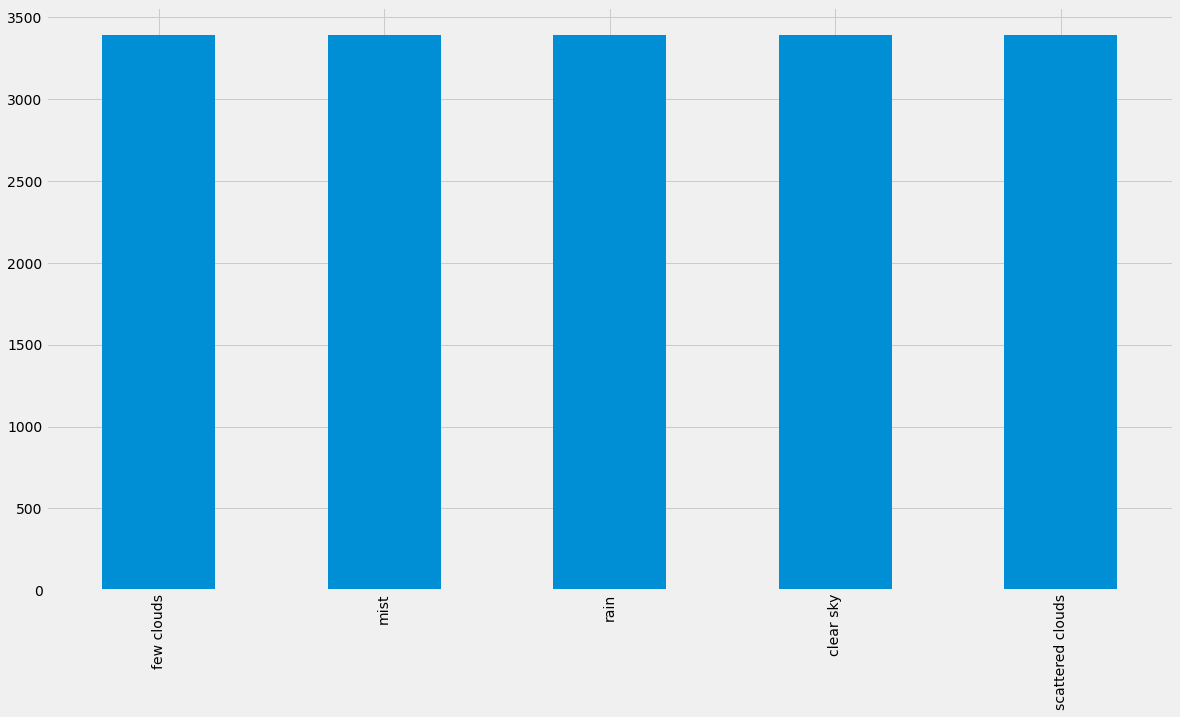

In [ ]:
# Building a Model out of the best hyperparameters
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import f1_score, make_scorer
import numpy as np

print("Number of Data Before Handling Imbalance: ", len(X)) 
handler = HandleImbalanceContext(SmoteSampler(4))
balanced_X, balanced_y = handler.fit_resample(X, y)
balanced_y.value_counts().plot(kind="bar", figsize=(18, 10))
print("Number of Data After Handling Imbalance: ", len(balanced_X)) 
print()
print()

f1_scorer = make_scorer(f1_score)
k_folds = StratifiedKFold()
i = 0
scores = []
for fold in k_folds.split(X, y): 
  x_train_indx, x_test_indx = fold[0], fold[1]
  x_train, y_train = X.iloc[x_train_indx], y.iloc[x_train_indx]
  x_test, y_test = X.iloc[x_test_indx], y.iloc[x_test_indx]
  lightboost_model = lgb.LGBMClassifier(lambda_l1=0.0016726006589446152, 
                                        lambda_l2=2.5801780730423597e-08, 
                                        num_leaves=255, 
                                        feature_fraction=0.7473274369648322,
                                        bagging_fraction=0.8348564128578214, 
                                        bagging_freq=6,
                                        min_child_samples=8, 
                                        learning_rate=0.010125474070832002, 
                                        boosting_type="gbdt"
                                      )
  lightboost_model.fit(x_train, y_train)
  preds = lightboost_model.predict(x_test)
  i += 1
  score = f1_score(y_test, preds, average="weighted")
  print(f"Model Score on fit number_{i}", score, "\n")
  print("Model Classification Report:\n")
  print(classification_report(y_test, preds))
  scores.append(score)
print("Average Score", np.array(scores).mean())

##**HyperParameter Tuning using OverSampling Dataset**

[I 2022-10-06 12:48:23,266] A new study created in memory with name: no-name-ff2ecffe-591d-4ac5-a27e-379c1bf34143


Number of Training Data Before Handling Imbalance:  10444
Number of Testing Data Before Handling Imbalance:  2947
Started the Resampling 
Number of Training Data After Handling Imbalance:  13235
Number of Testing Data After Handling Imbalance:  2947


{3: 'few clouds', 1: 'mist', 2: 'rain', 4: 'clear sky', 0: 'scattered clouds'}


Training until validation scores don't improve for 200 rounds.
[100]	train's multi_logloss: 0.500582	test's multi_logloss: 0.595011
[200]	train's multi_logloss: 0.303365	test's multi_logloss: 0.43563
[300]	train's multi_logloss: 0.222922	test's multi_logloss: 0.387557
[400]	train's multi_logloss: 0.17745	test's multi_logloss: 0.370111
[500]	train's multi_logloss: 0.146919	test's multi_logloss: 0.363985
[600]	train's multi_logloss: 0.124683	test's multi_logloss: 0.36248
[700]	train's multi_logloss: 0.107444	test's multi_logloss: 0.364886
Early stopping, best iteration is:
[582]	train's multi_logloss: 0.128197	test's multi_logloss: 0.362458


[I 2022-10-06 12:48:35,403] Trial 0 finished with value: 0.8564023454238748 and parameters: {'lambda_l1': 0.2849043493354489, 'lambda_l2': 0.00021129752751617925, 'num_leaves': 60, 'feature_fraction': 0.4304300807240399, 'bagging_fraction': 0.9809036253817404, 'bagging_freq': 6, 'min_child_samples': 50, 'learning_rate': 0.03264439011317193}. Best is trial 0 with value: 0.8564023454238748.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2, 1, 4, 3, 1, 1, 4, 1, 0, 0, 1, 4, 4, 3, 3, 2, 3, 4, 3, 1, 2, 0, 2, 2, 2, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 4, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 4, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 2, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 2, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 3, 1, 3, 1, 4, 2, 3, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 3, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 4, 1, 2, 4, 3, 1, 1, 3, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 4, 2, 2, 4, 4, 0, 4, 3, 1, 4, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 2, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:48:39,532] Trial 1 finished with value: 0.8475614173129454 and parameters: {'lambda_l1': 1.6079958520723678e-08, 'lambda_l2': 3.2643479677616485, 'num_leaves': 149, 'feature_fraction': 0.6005106723345186, 'bagging_fraction': 0.5222961243525261, 'bagging_freq': 1, 'min_child_samples': 59, 'learning_rate': 0.1434337066486083}. Best is trial 0 with value: 0.8564023454238748.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 4, 3, 2, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 3, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 4, 4, 3, 4, 4, 4, 4, 3, 3, 2, 1, 4, 1, 1, 2, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 2, 2, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 4, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 2, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 2, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 3, 4, 1, 3, 1, 4, 2, 3, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 3, 0, 4, 2, 1, 3, 4, 1, 4, 1, 3, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 3, 3, 1, 1, 3, 3, 1, 3, 2, 0, 4, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 4, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:49:11,369] Trial 2 finished with value: 0.8532215577356254 and parameters: {'lambda_l1': 2.560318231049792, 'lambda_l2': 0.17761400903108265, 'num_leaves': 336, 'feature_fraction': 0.6305877566948771, 'bagging_fraction': 0.7630346886340575, 'bagging_freq': 5, 'min_child_samples': 87, 'learning_rate': 0.017843990263212164}. Best is trial 0 with value: 0.8564023454238748.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 3, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 2, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 4, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 3, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 3, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 3, 1, 1, 3, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 4, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:49:15,925] Trial 3 finished with value: 0.850565086065812 and parameters: {'lambda_l1': 0.4126419806531107, 'lambda_l2': 9.135735518199644e-07, 'num_leaves': 236, 'feature_fraction': 0.9938951032091667, 'bagging_fraction': 0.4528416375556236, 'bagging_freq': 2, 'min_child_samples': 91, 'learning_rate': 0.14036757948660786}. Best is trial 0 with value: 0.8564023454238748.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 3, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 4, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 3, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 4, 4, 4, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 2, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 3, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 3, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 2, 1, 1, 3, 3, 1, 3, 2, 0, 4, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 4, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:49:21,271] Trial 4 finished with value: 0.8514632962984299 and parameters: {'lambda_l1': 0.001677262560710124, 'lambda_l2': 1.5006261654152884e-08, 'num_leaves': 409, 'feature_fraction': 0.7313243716186192, 'bagging_fraction': 0.9330210113184901, 'bagging_freq': 5, 'min_child_samples': 92, 'learning_rate': 0.1399064302165862}. Best is trial 0 with value: 0.8564023454238748.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 3, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 3, 4, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 4, 1, 4, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 4, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 3, 0, 4, 2, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 2, 1, 1, 3, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 4, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:49:27,101] Trial 5 finished with value: 0.8595546186431624 and parameters: {'lambda_l1': 0.30356274227676067, 'lambda_l2': 1.0246403681742052e-06, 'num_leaves': 204, 'feature_fraction': 0.5961592096803627, 'bagging_fraction': 0.6787323440497361, 'bagging_freq': 4, 'min_child_samples': 23, 'learning_rate': 0.1040307675347985}. Best is trial 5 with value: 0.8595546186431624.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 1, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 4, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 4, 4, 3, 4, 3, 3, 4, 3, 3, 2, 1, 4, 3, 1, 1, 4, 1, 0, 0, 1, 4, 4, 3, 3, 2, 3, 4, 3, 1, 2, 0, 2, 2, 2, 1, 4, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 4, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 4, 2, 4, 1, 3, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 2, 0, 0, 4, 4, 4, 1, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 2, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 3, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 3, 4, 1, 4, 1, 3, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 4, 1, 2, 4, 3, 1, 1, 3, 3, 1, 4, 2, 0, 4, 4, 4, 3, 3, 2, 0, 3, 4, 2, 3, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 3, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:49:33,828] Trial 6 finished with value: 0.8575408496613925 and parameters: {'lambda_l1': 0.00045059894479168296, 'lambda_l2': 3.252628191431062, 'num_leaves': 135, 'feature_fraction': 0.45051846824404373, 'bagging_fraction': 0.5929008550026743, 'bagging_freq': 3, 'min_child_samples': 17, 'learning_rate': 0.09630103498132754}. Best is trial 5 with value: 0.8595546186431624.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 4, 3, 3, 4, 4, 3, 2, 1, 4, 3, 1, 1, 4, 1, 0, 0, 1, 4, 4, 3, 3, 2, 3, 4, 3, 1, 2, 0, 2, 2, 3, 1, 4, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 4, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 4, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 2, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 3, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 3, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 4, 1, 2, 4, 3, 1, 1, 3, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 3, 0, 4, 3, 1, 4, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:49:41,605] Trial 7 finished with value: 0.8497526240954972 and parameters: {'lambda_l1': 5.141240420003146e-08, 'lambda_l2': 0.00037430184327792135, 'num_leaves': 113, 'feature_fraction': 0.5466437123334245, 'bagging_fraction': 0.4579515150520722, 'bagging_freq': 4, 'min_child_samples': 28, 'learning_rate': 0.046278875708586464}. Best is trial 5 with value: 0.8595546186431624.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 1, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 4, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 2, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 4, 4, 3, 4, 4, 4, 4, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 2, 2, 1, 4, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 4, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 2, 4, 4, 0, 1, 0, 0, 4, 4, 4, 1, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 2, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 3, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 3, 0, 4, 3, 1, 3, 4, 1, 4, 1, 3, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 4, 1, 2, 4, 3, 1, 1, 3, 3, 1, 4, 2, 0, 4, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 4, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:49:47,232] Trial 8 finished with value: 0.849223432930295 and parameters: {'lambda_l1': 3.0682666656208544e-05, 'lambda_l2': 0.030140314103054105, 'num_leaves': 206, 'feature_fraction': 0.5264929689295241, 'bagging_fraction': 0.8027236985460303, 'bagging_freq': 3, 'min_child_samples': 52, 'learning_rate': 0.24310228452329818}. Best is trial 5 with value: 0.8595546186431624.


Early stopping, best iteration is:
[47]	train's multi_logloss: 0.152335	test's multi_logloss: 0.382208
[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 4, 3, 2, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 4, 4, 4, 4, 3, 3, 2, 1, 4, 3, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 2, 2, 1, 4, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 4, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 4, 4, 3, 4, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 2, 0, 0, 4, 4, 4, 1, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 2, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 3, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 3, 0, 4, 2, 1, 3, 4, 1, 4, 1, 3, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 4, 1, 2, 4, 3, 1, 1, 3, 3, 1, 3, 2, 0, 4, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 4, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3,

[I 2022-10-06 12:49:56,760] Trial 9 finished with value: 0.8608156560326256 and parameters: {'lambda_l1': 7.2712497661119475e-06, 'lambda_l2': 0.0011540913212348353, 'num_leaves': 138, 'feature_fraction': 0.8050179927574541, 'bagging_fraction': 0.7020198424534122, 'bagging_freq': 1, 'min_child_samples': 61, 'learning_rate': 0.030299243769391786}. Best is trial 9 with value: 0.8608156560326256.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 4, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 2, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 3, 1, 2, 4, 3, 1, 1, 3, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 4, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:50:27,811] Trial 10 finished with value: 0.8565718430393956 and parameters: {'lambda_l1': 2.905418023366511e-06, 'lambda_l2': 0.001125323812238733, 'num_leaves': 20, 'feature_fraction': 0.8254778864806493, 'bagging_fraction': 0.8393143611510969, 'bagging_freq': 9, 'min_child_samples': 71, 'learning_rate': 0.0114715774296872}. Best is trial 9 with value: 0.8608156560326256.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 3, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 4, 4, 4, 4, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 4, 2, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 3, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 3, 0, 4, 2, 1, 3, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 3, 1, 2, 4, 3, 1, 1, 3, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 4, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:50:34,589] Trial 11 finished with value: 0.8602524679228386 and parameters: {'lambda_l1': 0.007810045290161339, 'lambda_l2': 7.455847982306306e-06, 'num_leaves': 311, 'feature_fraction': 0.7806356847258713, 'bagging_fraction': 0.6510496936073932, 'bagging_freq': 7, 'min_child_samples': 33, 'learning_rate': 0.06352680606514491}. Best is trial 9 with value: 0.8608156560326256.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 4, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 3, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 2, 4, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 3, 4, 3, 4, 4, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 2, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 2, 1, 1, 3, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 4, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:50:44,609] Trial 12 finished with value: 0.8578384378476283 and parameters: {'lambda_l1': 0.004843822069830985, 'lambda_l2': 3.8869542636496e-06, 'num_leaves': 330, 'feature_fraction': 0.8219135584658039, 'bagging_fraction': 0.6512609007478147, 'bagging_freq': 8, 'min_child_samples': 38, 'learning_rate': 0.029365614176180197}. Best is trial 9 with value: 0.8608156560326256.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 3, 4, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 3, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 2, 1, 1, 3, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 4, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:50:51,762] Trial 13 finished with value: 0.8506576521971471 and parameters: {'lambda_l1': 3.3681212654567595e-06, 'lambda_l2': 1.7653613177418785e-05, 'num_leaves': 460, 'feature_fraction': 0.8422286010806797, 'bagging_fraction': 0.5881104067759191, 'bagging_freq': 7, 'min_child_samples': 67, 'learning_rate': 0.06017021858918523}. Best is trial 9 with value: 0.8608156560326256.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 4, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 4, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 3, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 4, 0, 4, 0, 4, 2, 2, 2, 3, 4, 3, 4, 4, 3, 2, 3, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 4, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 2, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 3, 1, 3, 1, 4, 2, 3, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 2, 1, 1, 3, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 4, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:51:00,967] Trial 14 finished with value: 0.8734026223269881 and parameters: {'lambda_l1': 0.011042257194888492, 'lambda_l2': 0.007616951652764598, 'num_leaves': 313, 'feature_fraction': 0.9405284147658075, 'bagging_fraction': 0.7224516834988722, 'bagging_freq': 7, 'min_child_samples': 7, 'learning_rate': 0.05643984738581582}. Best is trial 14 with value: 0.8734026223269881.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 4, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 3, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 4, 1, 3, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 1, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 3, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 4, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 3, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 3, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 3, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:51:13,539] Trial 15 finished with value: 0.8719537741242255 and parameters: {'lambda_l1': 9.440027165889797e-06, 'lambda_l2': 0.007340850234220256, 'num_leaves': 280, 'feature_fraction': 0.9330674420604688, 'bagging_fraction': 0.747984294304645, 'bagging_freq': 1, 'min_child_samples': 10, 'learning_rate': 0.023060784091919254}. Best is trial 14 with value: 0.8734026223269881.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 4, 1, 3, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 3, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 3, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 3, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:51:31,484] Trial 16 finished with value: 0.8712345271297913 and parameters: {'lambda_l1': 2.068326676155998e-07, 'lambda_l2': 0.02679568321822727, 'num_leaves': 417, 'feature_fraction': 0.9613209112334211, 'bagging_fraction': 0.9003894393634867, 'bagging_freq': 9, 'min_child_samples': 7, 'learning_rate': 0.018947382865654304}. Best is trial 14 with value: 0.8734026223269881.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 1, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 3, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 3, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 1, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 3, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 4, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 4, 1, 4, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 3, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 3, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:51:56,007] Trial 17 finished with value: 0.8720064458262935 and parameters: {'lambda_l1': 5.017644167471416e-05, 'lambda_l2': 0.01577645889739498, 'num_leaves': 286, 'feature_fraction': 0.9045014299504389, 'bagging_fraction': 0.7428409791381567, 'bagging_freq': 7, 'min_child_samples': 5, 'learning_rate': 0.010937862271605045}. Best is trial 14 with value: 0.8734026223269881.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 1, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 3, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 3, 2, 2, 3, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 3, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 4, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:52:18,673] Trial 18 finished with value: 0.8657758236957431 and parameters: {'lambda_l1': 0.027068129287752603, 'lambda_l2': 0.17013704694831253, 'num_leaves': 361, 'feature_fraction': 0.8900356398879268, 'bagging_fraction': 0.8569573589162522, 'bagging_freq': 7, 'min_child_samples': 42, 'learning_rate': 0.010810501809407807}. Best is trial 14 with value: 0.8734026223269881.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 2, 3, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 3, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:52:27,723] Trial 19 finished with value: 0.8699422052222884 and parameters: {'lambda_l1': 0.00010754313458011491, 'lambda_l2': 0.25089896229241604, 'num_leaves': 261, 'feature_fraction': 0.8931283642494593, 'bagging_fraction': 0.7430031074250247, 'bagging_freq': 6, 'min_child_samples': 16, 'learning_rate': 0.04520360660307189}. Best is trial 14 with value: 0.8734026223269881.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 3, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 3, 2, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 3, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:52:36,868] Trial 20 finished with value: 0.8713063792866147 and parameters: {'lambda_l1': 0.0003790081533939871, 'lambda_l2': 0.005146513219212492, 'num_leaves': 409, 'feature_fraction': 0.7085283790351189, 'bagging_fraction': 0.5427755901171439, 'bagging_freq': 8, 'min_child_samples': 6, 'learning_rate': 0.08264145377572306}. Best is trial 14 with value: 0.8734026223269881.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 3, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 4, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 3, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 3, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 3, 2, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 3, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 4, 1, 2, 4, 3, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:52:53,491] Trial 21 finished with value: 0.8741736206840108 and parameters: {'lambda_l1': 3.343410625773427e-07, 'lambda_l2': 0.006509236191941341, 'num_leaves': 283, 'feature_fraction': 0.9175151547597745, 'bagging_fraction': 0.7427782100801641, 'bagging_freq': 6, 'min_child_samples': 14, 'learning_rate': 0.017437635211149122}. Best is trial 21 with value: 0.8741736206840108.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 3, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 3, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 4, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 3, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 3, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:53:14,521] Trial 22 finished with value: 0.8708320247839667 and parameters: {'lambda_l1': 4.3892438683604454e-07, 'lambda_l2': 0.00015126670119319414, 'num_leaves': 289, 'feature_fraction': 0.8990920448212959, 'bagging_fraction': 0.7998039900100576, 'bagging_freq': 6, 'min_child_samples': 21, 'learning_rate': 0.014344560531783386}. Best is trial 21 with value: 0.8741736206840108.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 2, 1, 3, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 3, 2, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 4, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 3, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:53:37,095] Trial 23 finished with value: 0.8693141451292661 and parameters: {'lambda_l1': 2.9856378919302814e-07, 'lambda_l2': 0.04102096395455518, 'num_leaves': 221, 'feature_fraction': 0.9800460955264966, 'bagging_fraction': 0.7167310668125373, 'bagging_freq': 8, 'min_child_samples': 14, 'learning_rate': 0.010167370678272284}. Best is trial 21 with value: 0.8741736206840108.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 3, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 3, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:53:57,266] Trial 24 finished with value: 0.8723804876049497 and parameters: {'lambda_l1': 0.03750722445372649, 'lambda_l2': 0.004420803705009608, 'num_leaves': 372, 'feature_fraction': 0.9303237608661828, 'bagging_fraction': 0.8049652886367126, 'bagging_freq': 6, 'min_child_samples': 5, 'learning_rate': 0.015095402939557613}. Best is trial 21 with value: 0.8741736206840108.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 3, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 4, 1, 3, 0, 4, 0, 4, 3, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 3, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 4, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 3, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 3, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:54:06,796] Trial 25 finished with value: 0.869254879818953 and parameters: {'lambda_l1': 0.020112588865717495, 'lambda_l2': 0.0035991686989636767, 'num_leaves': 489, 'feature_fraction': 0.7540432091908909, 'bagging_fraction': 0.8148272533129174, 'bagging_freq': 6, 'min_child_samples': 28, 'learning_rate': 0.04012338400866958}. Best is trial 21 with value: 0.8741736206840108.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 4, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 3, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 3, 1, 2, 4, 2, 1, 1, 3, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:54:20,506] Trial 26 finished with value: 0.8692676029345723 and parameters: {'lambda_l1': 0.08760490755107463, 'lambda_l2': 0.5968941681174724, 'num_leaves': 371, 'feature_fraction': 0.9415199743886872, 'bagging_fraction': 0.8836230776700811, 'bagging_freq': 5, 'min_child_samples': 23, 'learning_rate': 0.022451200650856123}. Best is trial 21 with value: 0.8741736206840108.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 4, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 3, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 3, 2, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:55:11,216] Trial 27 finished with value: 0.8557216869999456 and parameters: {'lambda_l1': 4.817116571772842, 'lambda_l2': 9.695288870930964e-05, 'num_leaves': 374, 'feature_fraction': 0.8682294797354183, 'bagging_fraction': 0.6312097810497355, 'bagging_freq': 4, 'min_child_samples': 12, 'learning_rate': 0.014499023330787298}. Best is trial 21 with value: 0.8741736206840108.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 4, 2, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 2, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 3, 1, 3, 1, 4, 2, 3, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 2, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 3, 1, 1, 3, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 4, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:55:24,834] Trial 28 finished with value: 0.8663906405677894 and parameters: {'lambda_l1': 0.0019022111369547822, 'lambda_l2': 0.0014709268066462223, 'num_leaves': 450, 'feature_fraction': 0.6633214654467512, 'bagging_fraction': 0.7879471288414448, 'bagging_freq': 6, 'min_child_samples': 39, 'learning_rate': 0.024694422543134045}. Best is trial 21 with value: 0.8741736206840108.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 3, 1, 2, 4, 2, 1, 1, 3, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:55:34,248] Trial 29 finished with value: 0.8674722325483353 and parameters: {'lambda_l1': 0.04441363095729347, 'lambda_l2': 3.8887763630836986e-05, 'num_leaves': 348, 'feature_fraction': 0.9960284778382679, 'bagging_fraction': 0.9990556537525892, 'bagging_freq': 6, 'min_child_samples': 45, 'learning_rate': 0.038115141292489926}. Best is trial 21 with value: 0.8741736206840108.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 4, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 3, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 3, 1, 3, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 3, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:55:51,575] Trial 30 finished with value: 0.8571431526416109 and parameters: {'lambda_l1': 0.148537571394817, 'lambda_l2': 0.0005337311411010069, 'num_leaves': 187, 'feature_fraction': 0.927538847863793, 'bagging_fraction': 0.9233951819635196, 'bagging_freq': 5, 'min_child_samples': 79, 'learning_rate': 0.015842339468699854}. Best is trial 21 with value: 0.8741736206840108.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 3, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 2, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 3, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 2, 3, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 3, 1, 2, 4, 3, 1, 1, 3, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 4, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:56:12,814] Trial 31 finished with value: 0.8723864283115796 and parameters: {'lambda_l1': 8.357403940348285e-05, 'lambda_l2': 0.0119451630042785, 'num_leaves': 298, 'feature_fraction': 0.8553896901601449, 'bagging_fraction': 0.7234567040236359, 'bagging_freq': 7, 'min_child_samples': 6, 'learning_rate': 0.013140527687521013}. Best is trial 21 with value: 0.8741736206840108.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 3, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 4, 1, 3, 0, 4, 0, 4, 2, 2, 2, 3, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 4, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:56:30,215] Trial 32 finished with value: 0.8716664374643766 and parameters: {'lambda_l1': 1.179025456649844, 'lambda_l2': 0.006097328958200131, 'num_leaves': 312, 'feature_fraction': 0.8577348592415718, 'bagging_fraction': 0.6900560064315404, 'bagging_freq': 7, 'min_child_samples': 5, 'learning_rate': 0.019750794581545904}. Best is trial 21 with value: 0.8741736206840108.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 4, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 2, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 3, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 3, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:56:49,132] Trial 33 finished with value: 0.872386039424735 and parameters: {'lambda_l1': 1.4900006772507723e-08, 'lambda_l2': 0.8141419810463806, 'num_leaves': 249, 'feature_fraction': 0.9617378842767328, 'bagging_fraction': 0.7657791954032045, 'bagging_freq': 8, 'min_child_samples': 18, 'learning_rate': 0.013348365049317308}. Best is trial 21 with value: 0.8741736206840108.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 3, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 3, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 3, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 4, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 3, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:57:10,920] Trial 34 finished with value: 0.8708197459595498 and parameters: {'lambda_l1': 2.769567893831003e-08, 'lambda_l2': 1.3913728309870768, 'num_leaves': 246, 'feature_fraction': 0.9604068837193521, 'bagging_fraction': 0.7665965897628013, 'bagging_freq': 8, 'min_child_samples': 18, 'learning_rate': 0.012267507833706557}. Best is trial 21 with value: 0.8741736206840108.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 2, 1, 3, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 3, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 3, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 3, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:57:19,036] Trial 35 finished with value: 0.8662974904322424 and parameters: {'lambda_l1': 8.309118359749612e-08, 'lambda_l2': 9.351742613621523, 'num_leaves': 176, 'feature_fraction': 0.7783994893675606, 'bagging_fraction': 0.7098388238465418, 'bagging_freq': 9, 'min_child_samples': 30, 'learning_rate': 0.07302950132839228}. Best is trial 21 with value: 0.8741736206840108.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 4, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 3, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 3, 0, 4, 2, 1, 3, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 3, 1, 1, 3, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:57:34,884] Trial 36 finished with value: 0.8457941207053706 and parameters: {'lambda_l1': 1.0218664401944851e-08, 'lambda_l2': 0.13361030744023464, 'num_leaves': 263, 'feature_fraction': 0.9982795214470842, 'bagging_fraction': 0.40089526674560405, 'bagging_freq': 8, 'min_child_samples': 98, 'learning_rate': 0.017954410548417565}. Best is trial 21 with value: 0.8741736206840108.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 3, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 3, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 4, 4, 3, 4, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 2, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 4, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 4, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 2, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 3, 1, 3, 1, 4, 2, 3, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 3, 1, 1, 3, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 4, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:57:47,511] Trial 37 finished with value: 0.8699165225284208 and parameters: {'lambda_l1': 1.015486144888322e-06, 'lambda_l2': 0.08695266472299723, 'num_leaves': 322, 'feature_fraction': 0.8612953698214685, 'bagging_fraction': 0.6227764958436223, 'bagging_freq': 7, 'min_child_samples': 12, 'learning_rate': 0.025427613983177878}. Best is trial 21 with value: 0.8741736206840108.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 4, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 4, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 4, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 4, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:57:57,940] Trial 38 finished with value: 0.8707056857494777 and parameters: {'lambda_l1': 1.0350208395842984e-07, 'lambda_l2': 0.7694486533915779, 'num_leaves': 296, 'feature_fraction': 0.9130156372968727, 'bagging_fraction': 0.6722334086236809, 'bagging_freq': 5, 'min_child_samples': 18, 'learning_rate': 0.03479629754229121}. Best is trial 21 with value: 0.8741736206840108.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 3, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 4, 1, 4, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 3, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 3, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:58:24,767] Trial 39 finished with value: 0.8697990694266282 and parameters: {'lambda_l1': 0.0010644378343232389, 'lambda_l2': 7.983593957259679, 'num_leaves': 229, 'feature_fraction': 0.9632742304912689, 'bagging_fraction': 0.8404432651375726, 'bagging_freq': 8, 'min_child_samples': 25, 'learning_rate': 0.013356308856899164}. Best is trial 21 with value: 0.8741736206840108.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 4, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 2, 3, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:58:34,475] Trial 40 finished with value: 0.8713666595542272 and parameters: {'lambda_l1': 2.95148193642938e-08, 'lambda_l2': 5.371419439035722e-08, 'num_leaves': 170, 'feature_fraction': 0.871463010476903, 'bagging_fraction': 0.7690415952776102, 'bagging_freq': 9, 'min_child_samples': 35, 'learning_rate': 0.049197438412051986}. Best is trial 21 with value: 0.8741736206840108.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 2, 1, 3, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 3, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 2, 3, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 2, 1, 1, 3, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 3, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:58:52,003] Trial 41 finished with value: 0.8731778964996512 and parameters: {'lambda_l1': 0.6197721145426424, 'lambda_l2': 0.0019891104571006547, 'num_leaves': 393, 'feature_fraction': 0.9358470689722375, 'bagging_fraction': 0.7286290036986411, 'bagging_freq': 6, 'min_child_samples': 11, 'learning_rate': 0.015919011401794816}. Best is trial 21 with value: 0.8741736206840108.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 4, 1, 3, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 3, 2, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 3, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:58:56,596] Trial 42 finished with value: 0.8577706669735665 and parameters: {'lambda_l1': 0.3991788038823477, 'lambda_l2': 0.01853502724209347, 'num_leaves': 261, 'feature_fraction': 0.4068847160860031, 'bagging_fraction': 0.7235958460452153, 'bagging_freq': 7, 'min_child_samples': 12, 'learning_rate': 0.19679578637279846}. Best is trial 21 with value: 0.8741736206840108.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 1, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 3, 3, 3, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 3, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 2, 1, 4, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 4, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 4, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 2, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 2, 3, 4, 4, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 3, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 3, 4, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 4, 1, 2, 4, 3, 1, 1, 3, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 4, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 2, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 12:59:18,327] Trial 43 finished with value: 0.8657245351003834 and parameters: {'lambda_l1': 1.6382685781488235, 'lambda_l2': 0.0019775049241261156, 'num_leaves': 393, 'feature_fraction': 0.9649084931126978, 'bagging_fraction': 0.6788010580024955, 'bagging_freq': 5, 'min_child_samples': 20, 'learning_rate': 0.01692032038301306}. Best is trial 21 with value: 0.8741736206840108.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 3, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 4, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 3, 4, 3, 4, 4, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 3, 2, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 3, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:00:44,940] Trial 44 finished with value: 0.848894038536781 and parameters: {'lambda_l1': 8.264240749203033, 'lambda_l2': 0.060371683376735, 'num_leaves': 344, 'feature_fraction': 0.9482060801320532, 'bagging_fraction': 0.7666346891570158, 'bagging_freq': 6, 'min_child_samples': 10, 'learning_rate': 0.012968115698797474}. Best is trial 21 with value: 0.8741736206840108.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 1, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 4, 4, 3, 4, 4, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 3, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 4, 2, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 2, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 3, 1, 3, 1, 4, 2, 3, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 3, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 2, 1, 1, 3, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 4, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:00:50,608] Trial 45 finished with value: 0.8655004823053764 and parameters: {'lambda_l1': 1.1182084337039836e-06, 'lambda_l2': 0.0004912875858932487, 'num_leaves': 116, 'feature_fraction': 0.8084077959167886, 'bagging_fraction': 0.7280439114071644, 'bagging_freq': 7, 'min_child_samples': 25, 'learning_rate': 0.10870600211234999}. Best is trial 21 with value: 0.8741736206840108.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 4, 3, 3, 4, 0, 1, 0, 4, 3, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 3, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 3, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 4, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 2, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 2, 1, 1, 3, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 4, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:01:02,734] Trial 46 finished with value: 0.8528821401356891 and parameters: {'lambda_l1': 0.004746572747737259, 'lambda_l2': 0.011859411124682265, 'num_leaves': 212, 'feature_fraction': 0.8381646721267499, 'bagging_fraction': 0.5771925275580931, 'bagging_freq': 4, 'min_child_samples': 58, 'learning_rate': 0.02129308712478817}. Best is trial 21 with value: 0.8741736206840108.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 4, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 3, 2, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 2, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 3, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 3, 0, 4, 2, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 2, 1, 1, 3, 3, 1, 3, 2, 0, 4, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 4, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:01:14,052] Trial 47 finished with value: 0.8687525401313984 and parameters: {'lambda_l1': 4.284244774276273e-05, 'lambda_l2': 0.31190604098683766, 'num_leaves': 434, 'feature_fraction': 0.9113669621270722, 'bagging_fraction': 0.6515904043114202, 'bagging_freq': 8, 'min_child_samples': 15, 'learning_rate': 0.0297460917315997}. Best is trial 21 with value: 0.8741736206840108.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 3, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:01:33,617] Trial 48 finished with value: 0.8733644982363431 and parameters: {'lambda_l1': 0.9608774805972162, 'lambda_l2': 1.747753045866686, 'num_leaves': 310, 'feature_fraction': 0.8806838212905824, 'bagging_fraction': 0.8279071926945153, 'bagging_freq': 7, 'min_child_samples': 9, 'learning_rate': 0.017354580317317025}. Best is trial 21 with value: 0.8741736206840108.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 4, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 2, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 3, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:01:51,549] Trial 49 finished with value: 0.8646022659519134 and parameters: {'lambda_l1': 0.6492337927228603, 'lambda_l2': 0.00022729124061220392, 'num_leaves': 306, 'feature_fraction': 0.4975568540472632, 'bagging_fraction': 0.8223323329715959, 'bagging_freq': 7, 'min_child_samples': 10, 'learning_rate': 0.02719445022952824}. Best is trial 21 with value: 0.8741736206840108.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 3, 3, 4, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 3, 3, 2, 3, 3, 3, 1, 2, 0, 2, 3, 2, 1, 4, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 4, 1, 3, 0, 4, 0, 4, 2, 2, 2, 3, 4, 3, 4, 3, 4, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 2, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 2, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 3, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 3, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 4, 1, 2, 4, 3, 1, 1, 3, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 4, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:02:01,068] Trial 50 finished with value: 0.8726878879746348 and parameters: {'lambda_l1': 0.18383108588044558, 'lambda_l2': 3.375062063045495, 'num_leaves': 325, 'feature_fraction': 0.7722078231537437, 'bagging_fraction': 0.857823493347031, 'bagging_freq': 5, 'min_child_samples': 9, 'learning_rate': 0.05445452026337291}. Best is trial 21 with value: 0.8741736206840108.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 3, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:02:06,246] Trial 51 finished with value: 0.8707090284474879 and parameters: {'lambda_l1': 0.13084506703206128, 'lambda_l2': 3.616892207149873, 'num_leaves': 326, 'feature_fraction': 0.7902997540947698, 'bagging_fraction': 0.9543714992049388, 'bagging_freq': 5, 'min_child_samples': 9, 'learning_rate': 0.274665810587563}. Best is trial 21 with value: 0.8741736206840108.


Early stopping, best iteration is:
[32]	train's multi_logloss: 0.0717673	test's multi_logloss: 0.341879
[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 3, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 3, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 2, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 3, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3

[I 2022-10-06 13:02:17,787] Trial 52 finished with value: 0.8686266386667882 and parameters: {'lambda_l1': 2.2073097574853455, 'lambda_l2': 2.1601237675310108, 'num_leaves': 389, 'feature_fraction': 0.8860220750361356, 'bagging_fraction': 0.8833987411365782, 'bagging_freq': 6, 'min_child_samples': 14, 'learning_rate': 0.052169154062059506}. Best is trial 21 with value: 0.8741736206840108.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 3, 3, 1, 2, 0, 2, 3, 4, 1, 3, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 2, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 3, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:02:26,968] Trial 53 finished with value: 0.8728292644503242 and parameters: {'lambda_l1': 0.011881244280673468, 'lambda_l2': 0.002408407182917266, 'num_leaves': 352, 'feature_fraction': 0.7402930715343261, 'bagging_fraction': 0.8634074356101987, 'bagging_freq': 4, 'min_child_samples': 9, 'learning_rate': 0.06715928030017278}. Best is trial 21 with value: 0.8741736206840108.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 4, 1, 3, 0, 4, 0, 4, 2, 2, 2, 3, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 2, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 4, 1, 2, 4, 3, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:02:36,184] Trial 54 finished with value: 0.8761230791349384 and parameters: {'lambda_l1': 0.011110987632157546, 'lambda_l2': 0.0009828790794940286, 'num_leaves': 354, 'feature_fraction': 0.6681198957624614, 'bagging_fraction': 0.8600096221346819, 'bagging_freq': 3, 'min_child_samples': 15, 'learning_rate': 0.0626581448394638}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 4, 1, 3, 0, 4, 0, 4, 2, 2, 2, 3, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 2, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 4, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:02:45,187] Trial 55 finished with value: 0.8551438666887368 and parameters: {'lambda_l1': 0.014605365896893143, 'lambda_l2': 6.408577044145959e-05, 'num_leaves': 355, 'feature_fraction': 0.5981333103070228, 'bagging_fraction': 0.951274232348129, 'bagging_freq': 3, 'min_child_samples': 22, 'learning_rate': 0.06827110814344635}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 3, 1, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 4, 3, 2, 4, 0, 1, 0, 4, 3, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 4, 4, 3, 4, 3, 3, 4, 4, 3, 2, 1, 4, 3, 1, 1, 4, 1, 0, 0, 3, 4, 4, 3, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 2, 1, 4, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 4, 1, 3, 0, 4, 0, 3, 2, 2, 2, 4, 4, 3, 4, 3, 4, 2, 4, 1, 3, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 2, 0, 0, 4, 4, 4, 1, 4, 4, 2, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 2, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 3, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 3, 4, 3, 3, 1, 4, 0, 4, 2, 1, 3, 4, 1, 4, 1, 3, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 4, 1, 2, 3, 3, 1, 1, 3, 3, 1, 2, 2, 0, 3, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 3, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:02:55,375] Trial 56 finished with value: 0.8735223935710835 and parameters: {'lambda_l1': 0.0007818150628562604, 'lambda_l2': 0.0009894192987336087, 'num_leaves': 390, 'feature_fraction': 0.682242798308573, 'bagging_fraction': 0.9088449845808181, 'bagging_freq': 2, 'min_child_samples': 15, 'learning_rate': 0.08277415432311079}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 1, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 4, 1, 4, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 4, 1, 3, 0, 4, 0, 4, 2, 2, 2, 3, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 4, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 3, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:03:03,167] Trial 57 finished with value: 0.8720198138278927 and parameters: {'lambda_l1': 0.0012163111119026643, 'lambda_l2': 0.0012793605613556861, 'num_leaves': 426, 'feature_fraction': 0.6317693185485913, 'bagging_fraction': 0.9001112714648093, 'bagging_freq': 2, 'min_child_samples': 26, 'learning_rate': 0.09158636621916644}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 2, 1, 3, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 4, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 3, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 3, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 3, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:03:09,648] Trial 58 finished with value: 0.8695944375252787 and parameters: {'lambda_l1': 0.00018386669470839176, 'lambda_l2': 0.000738372662804694, 'num_leaves': 406, 'feature_fraction': 0.6705579152353248, 'bagging_fraction': 0.827376178485955, 'bagging_freq': 2, 'min_child_samples': 32, 'learning_rate': 0.1236574357488375}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 3, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 3, 3, 1, 2, 0, 2, 3, 3, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 2, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 3, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 2, 1, 1, 3, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 3, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:03:17,750] Trial 59 finished with value: 0.8704728186561199 and parameters: {'lambda_l1': 0.0026096992914889606, 'lambda_l2': 2.2400626933151287e-05, 'num_leaves': 276, 'feature_fraction': 0.6770440884988749, 'bagging_fraction': 0.9331278840157788, 'bagging_freq': 2, 'min_child_samples': 15, 'learning_rate': 0.08302125637587199}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 4, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 4, 1, 3, 0, 4, 0, 4, 2, 2, 2, 3, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 4, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:03:28,774] Trial 60 finished with value: 0.8688667462827235 and parameters: {'lambda_l1': 0.0006641371958627459, 'lambda_l2': 0.0002170306197769999, 'num_leaves': 474, 'feature_fraction': 0.712817993761939, 'bagging_fraction': 0.788456302599777, 'bagging_freq': 3, 'min_child_samples': 20, 'learning_rate': 0.04116427087363548}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 4, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 4, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 4, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:03:39,231] Trial 61 finished with value: 0.8501553426466141 and parameters: {'lambda_l1': 0.008737251836080278, 'lambda_l2': 0.0027152996969911753, 'num_leaves': 382, 'feature_fraction': 0.6239361146581, 'bagging_fraction': 0.8642184659241077, 'bagging_freq': 3, 'min_child_samples': 9, 'learning_rate': 0.060997137390367794}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 3, 2, 2, 4, 1, 1, 1, 0, 1, 3, 3, 2, 4, 3, 4, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 4, 4, 3, 4, 3, 4, 4, 3, 3, 2, 1, 4, 1, 1, 2, 4, 1, 0, 0, 3, 4, 4, 3, 3, 2, 3, 4, 3, 1, 2, 0, 2, 2, 2, 1, 4, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 4, 1, 3, 0, 4, 0, 3, 2, 2, 2, 4, 4, 3, 4, 3, 4, 2, 4, 1, 3, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 2, 0, 0, 4, 4, 4, 1, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 2, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 3, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 3, 4, 3, 3, 1, 4, 0, 4, 2, 1, 3, 4, 1, 4, 1, 3, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 4, 1, 2, 3, 3, 1, 1, 3, 3, 1, 4, 2, 0, 4, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 3, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 3, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:03:47,701] Trial 62 finished with value: 0.8734602846439429 and parameters: {'lambda_l1': 0.004529519265004712, 'lambda_l2': 0.0007627791178417095, 'num_leaves': 341, 'feature_fraction': 0.7338839539399001, 'bagging_fraction': 0.8774053499101078, 'bagging_freq': 4, 'min_child_samples': 17, 'learning_rate': 0.07843452970872926}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 4, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 4, 1, 3, 0, 4, 0, 4, 2, 2, 2, 3, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 2, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 4, 1, 2, 4, 2, 1, 1, 3, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:03:57,454] Trial 63 finished with value: 0.8725296600831085 and parameters: {'lambda_l1': 1.7482469862163333e-05, 'lambda_l2': 0.0003318070923195493, 'num_leaves': 341, 'feature_fraction': 0.6495973507274223, 'bagging_fraction': 0.9004622780922321, 'bagging_freq': 3, 'min_child_samples': 13, 'learning_rate': 0.07665104554957022}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 4, 1, 3, 0, 4, 0, 4, 2, 2, 2, 3, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 3, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:04:03,463] Trial 64 finished with value: 0.8517285569810731 and parameters: {'lambda_l1': 0.07047126221595496, 'lambda_l2': 0.0008355809719126387, 'num_leaves': 370, 'feature_fraction': 0.5601586844408937, 'bagging_fraction': 0.8449163363553651, 'bagging_freq': 1, 'min_child_samples': 17, 'learning_rate': 0.10576418097701802}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 3, 1, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 4, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 4, 4, 3, 4, 4, 4, 4, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 3, 4, 4, 3, 3, 2, 3, 4, 3, 1, 2, 0, 2, 2, 2, 1, 4, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 4, 1, 3, 0, 4, 0, 3, 2, 2, 2, 4, 4, 3, 4, 3, 4, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 2, 0, 0, 4, 4, 4, 1, 4, 4, 2, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 2, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 3, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 3, 1, 3, 4, 1, 4, 1, 3, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 4, 1, 2, 4, 3, 1, 1, 3, 3, 1, 2, 2, 0, 3, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 3, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:04:11,601] Trial 65 finished with value: 0.8712712105410361 and parameters: {'lambda_l1': 0.0033153179837517232, 'lambda_l2': 0.007572228484852095, 'num_leaves': 400, 'feature_fraction': 0.6950772413508084, 'bagging_fraction': 0.9714115457969927, 'bagging_freq': 4, 'min_child_samples': 21, 'learning_rate': 0.09433789388866097}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 4, 1, 3, 0, 4, 0, 4, 2, 2, 2, 3, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 4, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 3, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:04:15,809] Trial 66 finished with value: 0.8646200784972246 and parameters: {'lambda_l1': 0.0005046623732028447, 'lambda_l2': 0.028809269752307624, 'num_leaves': 42, 'feature_fraction': 0.5716690081269038, 'bagging_fraction': 0.9157413762905309, 'bagging_freq': 2, 'min_child_samples': 5, 'learning_rate': 0.16123266022572713}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 3, 1, 4, 3, 4, 1, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 4, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 4, 4, 4, 3, 4, 3, 2, 1, 4, 3, 1, 1, 4, 1, 0, 0, 3, 4, 4, 3, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 2, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 4, 1, 3, 0, 4, 0, 3, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 4, 2, 4, 4, 0, 1, 0, 0, 4, 4, 4, 1, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 2, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 3, 4, 1, 3, 1, 4, 2, 3, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 4, 1, 2, 4, 3, 1, 1, 3, 3, 1, 4, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 4, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:04:23,369] Trial 67 finished with value: 0.8665409406941826 and parameters: {'lambda_l1': 0.9858247775489748, 'lambda_l2': 0.00011850135522251158, 'num_leaves': 276, 'feature_fraction': 0.7197824774249052, 'bagging_fraction': 0.8841366657734613, 'bagging_freq': 6, 'min_child_samples': 47, 'learning_rate': 0.05923997534401409}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 3, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 3, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 4, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:04:32,815] Trial 68 finished with value: 0.8692601118783972 and parameters: {'lambda_l1': 0.005869958260637812, 'lambda_l2': 3.3446301161585453e-07, 'num_leaves': 438, 'feature_fraction': 0.7600173102198715, 'bagging_fraction': 0.8056001087219895, 'bagging_freq': 3, 'min_child_samples': 28, 'learning_rate': 0.04558005027172516}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 4, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 3, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:04:40,195] Trial 69 finished with value: 0.8675292769617524 and parameters: {'lambda_l1': 0.028521747790199115, 'lambda_l2': 0.004066987118573318, 'num_leaves': 314, 'feature_fraction': 0.6957365642848579, 'bagging_fraction': 0.7865077574411182, 'bagging_freq': 4, 'min_child_samples': 16, 'learning_rate': 0.0873175756854076}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 4, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 4, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 2, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 4, 1, 2, 4, 2, 1, 1, 3, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 3, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:04:46,055] Trial 70 finished with value: 0.8589172119005122 and parameters: {'lambda_l1': 0.00016669681882234495, 'lambda_l2': 3.7203001168720867e-06, 'num_leaves': 333, 'feature_fraction': 0.9189666232927612, 'bagging_fraction': 0.6974470476645869, 'bagging_freq': 2, 'min_child_samples': 70, 'learning_rate': 0.11854150202172554}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 4, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 2, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 3, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 3, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 3, 1, 2, 4, 3, 1, 1, 3, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 0, 

[I 2022-10-06 13:04:55,182] Trial 71 finished with value: 0.872807880738124 and parameters: {'lambda_l1': 0.009159514392140442, 'lambda_l2': 0.0016219438276847634, 'num_leaves': 358, 'feature_fraction': 0.6450036209133335, 'bagging_fraction': 0.8697547441063077, 'bagging_freq': 4, 'min_child_samples': 9, 'learning_rate': 0.0729613919303253}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 3, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 4, 1, 3, 0, 4, 0, 4, 2, 2, 2, 3, 4, 3, 4, 4, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 4, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:05:04,080] Trial 72 finished with value: 0.8730250415707927 and parameters: {'lambda_l1': 0.015308299689568598, 'lambda_l2': 0.0026055854643266536, 'num_leaves': 355, 'feature_fraction': 0.9797158704513855, 'bagging_fraction': 0.7413386473206209, 'bagging_freq': 4, 'min_child_samples': 7, 'learning_rate': 0.06483714909003445}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 2, 1, 3, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 3, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 3, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 4, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:05:13,116] Trial 73 finished with value: 0.8693308436939653 and parameters: {'lambda_l1': 0.06698469609675901, 'lambda_l2': 0.000695143608604217, 'num_leaves': 419, 'feature_fraction': 0.9750900255861921, 'bagging_fraction': 0.7495138339948887, 'bagging_freq': 6, 'min_child_samples': 7, 'learning_rate': 0.05587974868898804}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 1, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 4, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 3, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 3, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 4, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 4, 1, 4, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 3, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:05:19,893] Trial 74 finished with value: 0.8712493404763245 and parameters: {'lambda_l1': 0.22891353139883291, 'lambda_l2': 0.00672804969645144, 'num_leaves': 365, 'feature_fraction': 0.9422925986058588, 'bagging_fraction': 0.7360607368511048, 'bagging_freq': 3, 'min_child_samples': 12, 'learning_rate': 0.07540985163612364}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 2, 1, 3, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 3, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 3, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 4, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 3, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 3, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:05:27,801] Trial 75 finished with value: 0.8666538137733814 and parameters: {'lambda_l1': 0.021766507548166208, 'lambda_l2': 6.927803792820156e-05, 'num_leaves': 384, 'feature_fraction': 0.8910712569334721, 'bagging_fraction': 0.8276699141345862, 'bagging_freq': 5, 'min_child_samples': 19, 'learning_rate': 0.06533936403120723}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 1, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 4, 1, 3, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 3, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 3, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 4, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 3, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:06:10,064] Trial 76 finished with value: 0.8543162840679127 and parameters: {'lambda_l1': 4.764378587336501, 'lambda_l2': 0.012296670337636128, 'num_leaves': 297, 'feature_fraction': 0.9411791111193587, 'bagging_fraction': 0.7542468006772988, 'bagging_freq': 1, 'min_child_samples': 84, 'learning_rate': 0.020568777750075165}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 3, 3, 1, 2, 0, 2, 3, 3, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 4, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 4, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 4, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 2, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 3, 1, 3, 1, 4, 2, 3, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 3, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 3, 1, 1, 3, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 4, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 3, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:06:21,633] Trial 77 finished with value: 0.8688394873418972 and parameters: {'lambda_l1': 0.0007539596700740127, 'lambda_l2': 0.00041749182743640046, 'num_leaves': 331, 'feature_fraction': 0.9727306627871969, 'bagging_fraction': 0.7830200344592927, 'bagging_freq': 4, 'min_child_samples': 23, 'learning_rate': 0.03508561384681267}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 3, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 2, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 3, 2, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 3, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 3, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:06:38,992] Trial 78 finished with value: 0.8726992113757761 and parameters: {'lambda_l1': 0.001767160272716741, 'lambda_l2': 0.002621857417333398, 'num_leaves': 310, 'feature_fraction': 0.9822882379273755, 'bagging_fraction': 0.6619046205454112, 'bagging_freq': 5, 'min_child_samples': 7, 'learning_rate': 0.015981468520510668}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 4, 1, 3, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 3, 4, 3, 4, 4, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 3, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 4, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:06:47,954] Trial 79 finished with value: 0.8742917932666113 and parameters: {'lambda_l1': 0.046305053215231394, 'lambda_l2': 0.045152482582072814, 'num_leaves': 284, 'feature_fraction': 0.92742250562209, 'bagging_fraction': 0.706543417124676, 'bagging_freq': 7, 'min_child_samples': 12, 'learning_rate': 0.04915263154907313}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 4, 1, 3, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 4, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 3, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 4, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:07:10,461] Trial 80 finished with value: 0.8728995173192867 and parameters: {'lambda_l1': 0.6601607727905764, 'lambda_l2': 0.047063888591102145, 'num_leaves': 285, 'feature_fraction': 0.8339637649681793, 'bagging_fraction': 0.691285470156474, 'bagging_freq': 7, 'min_child_samples': 16, 'learning_rate': 0.011615843471929147}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 4, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:07:19,056] Trial 81 finished with value: 0.8695502512544443 and parameters: {'lambda_l1': 0.045508721126652725, 'lambda_l2': 0.019465832650458287, 'num_leaves': 342, 'feature_fraction': 0.9226061434126704, 'bagging_fraction': 0.6203871819979174, 'bagging_freq': 7, 'min_child_samples': 12, 'learning_rate': 0.04919681055842786}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 4, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 4, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 3, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 3, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 3, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 3, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:07:34,507] Trial 82 finished with value: 0.8722027443622541 and parameters: {'lambda_l1': 0.003504378482045369, 'lambda_l2': 0.0010675050371677494, 'num_leaves': 262, 'feature_fraction': 0.9008926460882797, 'bagging_fraction': 0.7119476320688588, 'bagging_freq': 6, 'min_child_samples': 13, 'learning_rate': 0.018105237984751627}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 4, 1, 3, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 3, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:07:41,549] Trial 83 finished with value: 0.8702672415709749 and parameters: {'lambda_l1': 0.09869955063217133, 'lambda_l2': 0.09822332226099494, 'num_leaves': 234, 'feature_fraction': 0.8733751496589246, 'bagging_fraction': 0.7404590310694094, 'bagging_freq': 7, 'min_child_samples': 5, 'learning_rate': 0.08050297768964058}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 1, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 3, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 4, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 4, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 4, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:07:50,182] Trial 84 finished with value: 0.867805887709142 and parameters: {'lambda_l1': 0.015922423023126395, 'lambda_l2': 0.0038790278302362215, 'num_leaves': 316, 'feature_fraction': 0.9523026798407276, 'bagging_fraction': 0.6799161883228317, 'bagging_freq': 6, 'min_child_samples': 11, 'learning_rate': 0.05912866002076857}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 4, 1, 3, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 3, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 4, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 3, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:07:57,516] Trial 85 finished with value: 0.8697778198156332 and parameters: {'lambda_l1': 0.00553115186565814, 'lambda_l2': 0.006813204421080974, 'num_leaves': 302, 'feature_fraction': 0.9862511631980169, 'bagging_fraction': 0.844070388843673, 'bagging_freq': 7, 'min_child_samples': 17, 'learning_rate': 0.0987521049701344}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 1, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 3, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 3, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 3, 2, 3, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 3, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:08:05,800] Trial 86 finished with value: 0.8598536162671617 and parameters: {'lambda_l1': 0.3113499931278198, 'lambda_l2': 0.3271014289799125, 'num_leaves': 379, 'feature_fraction': 0.6152204431534083, 'bagging_fraction': 0.7100787480335031, 'bagging_freq': 3, 'min_child_samples': 7, 'learning_rate': 0.07005657759041856}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 3, 1, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 4, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 4, 4, 3, 4, 3, 4, 4, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 3, 3, 2, 3, 4, 3, 1, 2, 0, 2, 2, 2, 1, 4, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 4, 1, 3, 0, 4, 0, 4, 3, 2, 2, 4, 4, 3, 4, 3, 4, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 2, 3, 4, 0, 2, 0, 0, 4, 4, 4, 1, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 2, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 3, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 3, 4, 1, 4, 1, 3, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 4, 1, 2, 3, 3, 1, 1, 3, 3, 1, 4, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 3, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 3, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:08:20,677] Trial 87 finished with value: 0.870688854301584 and parameters: {'lambda_l1': 0.00248854835381599, 'lambda_l2': 0.001649278116624742, 'num_leaves': 272, 'feature_fraction': 0.6864382064735811, 'bagging_fraction': 0.7778846867034099, 'bagging_freq': 6, 'min_child_samples': 14, 'learning_rate': 0.023424744335472442}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 4, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 4, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 4, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 3, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:08:28,907] Trial 88 finished with value: 0.8527623484566473 and parameters: {'lambda_l1': 0.0488364871286209, 'lambda_l2': 0.009744269124335786, 'num_leaves': 246, 'feature_fraction': 0.9303126197874932, 'bagging_fraction': 0.7281831373275582, 'bagging_freq': 8, 'min_child_samples': 55, 'learning_rate': 0.04100867330335855}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 4, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 4, 4, 4, 3, 4, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 3, 3, 1, 2, 0, 2, 3, 4, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 2, 3, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 3, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 3, 1, 1, 3, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 4, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:08:38,177] Trial 89 finished with value: 0.8686486731243063 and parameters: {'lambda_l1': 0.001213660687883428, 'lambda_l2': 0.0002693106240119045, 'num_leaves': 395, 'feature_fraction': 0.9977313173128993, 'bagging_fraction': 0.8045331253458353, 'bagging_freq': 4, 'min_child_samples': 24, 'learning_rate': 0.049990208502636586}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 4, 4, 4, 3, 4, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 4, 1, 3, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 3, 2, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 4, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:08:58,212] Trial 90 finished with value: 0.8732320320548635 and parameters: {'lambda_l1': 0.030971500640384224, 'lambda_l2': 0.028405525273497788, 'num_leaves': 347, 'feature_fraction': 0.7355187536437047, 'bagging_fraction': 0.9085964451356151, 'bagging_freq': 7, 'min_child_samples': 18, 'learning_rate': 0.016164941660272956}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 4, 1, 3, 0, 4, 0, 4, 2, 2, 2, 3, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 4, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:09:18,020] Trial 91 finished with value: 0.8699861551994572 and parameters: {'lambda_l1': 0.0002844829755550564, 'lambda_l2': 0.02195709345359763, 'num_leaves': 360, 'feature_fraction': 0.7252369970727931, 'bagging_fraction': 0.9120457307605121, 'bagging_freq': 7, 'min_child_samples': 20, 'learning_rate': 0.016402169680687195}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 4, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 4, 1, 3, 0, 4, 0, 4, 2, 2, 2, 3, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 4, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:09:41,704] Trial 92 finished with value: 0.8714245698480476 and parameters: {'lambda_l1': 0.014430152588892606, 'lambda_l2': 0.03873360054996856, 'num_leaves': 292, 'feature_fraction': 0.7461620060610201, 'bagging_fraction': 0.8808313357527731, 'bagging_freq': 7, 'min_child_samples': 15, 'learning_rate': 0.014621238924731245}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 4, 1, 3, 0, 4, 0, 4, 2, 2, 2, 3, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 4, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:09:58,477] Trial 93 finished with value: 0.8730731516087562 and parameters: {'lambda_l1': 0.031222193791559175, 'lambda_l2': 0.07436303673216196, 'num_leaves': 337, 'feature_fraction': 0.9062070625121196, 'bagging_fraction': 0.9310006154931453, 'bagging_freq': 7, 'min_child_samples': 8, 'learning_rate': 0.018568362070366082}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 3, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 4, 1, 3, 0, 4, 0, 4, 3, 2, 2, 3, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 1, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 3, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 4, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 3, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 3, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 3, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:10:14,181] Trial 94 finished with value: 0.8732373689774658 and parameters: {'lambda_l1': 0.02923065423335764, 'lambda_l2': 0.0690097061286941, 'num_leaves': 345, 'feature_fraction': 0.8781851671609833, 'bagging_fraction': 0.9396536819269867, 'bagging_freq': 7, 'min_child_samples': 18, 'learning_rate': 0.019523142628110928}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 4, 1, 3, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 3, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 3, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 4, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 3, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 3, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:10:28,049] Trial 95 finished with value: 0.8748857109763087 and parameters: {'lambda_l1': 0.5648382797185857, 'lambda_l2': 0.013950145896840854, 'num_leaves': 322, 'feature_fraction': 0.6589443420977278, 'bagging_fraction': 0.9494956929030568, 'bagging_freq': 8, 'min_child_samples': 11, 'learning_rate': 0.02708730354755983}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 4, 1, 3, 0, 4, 0, 4, 2, 2, 2, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 4, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 3, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:10:44,643] Trial 96 finished with value: 0.8710440813784619 and parameters: {'lambda_l1': 0.12721182075283977, 'lambda_l2': 0.129270447501259, 'num_leaves': 321, 'feature_fraction': 0.6534330210598253, 'bagging_fraction': 0.9809222599253701, 'bagging_freq': 8, 'min_child_samples': 18, 'learning_rate': 0.02129545760813568}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 4, 1, 3, 0, 4, 0, 4, 2, 2, 2, 3, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 4, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 4, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:11:02,064] Trial 97 finished with value: 0.8694905020709657 and parameters: {'lambda_l1': 0.00846170036710099, 'lambda_l2': 0.48234303523272254, 'num_leaves': 347, 'feature_fraction': 0.8086555568526813, 'bagging_fraction': 0.9458839054762244, 'bagging_freq': 8, 'min_child_samples': 26, 'learning_rate': 0.0169571694425265}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 1, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 3, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 3, 2, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 3, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:11:19,975] Trial 98 finished with value: 0.8633063275043279 and parameters: {'lambda_l1': 3.3328070610929617, 'lambda_l2': 0.1904852566015609, 'num_leaves': 305, 'feature_fraction': 0.8469820275845106, 'bagging_fraction': 0.9617718837982577, 'bagging_freq': 9, 'min_child_samples': 22, 'learning_rate': 0.027971893889878183}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 1, 1, 3, 4, 3, 4, 4, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 4, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 3, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 4, 0, 2, 4, 4, 1, 3, 4, 4, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 4, 1, 2, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 3, 2, 3, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 0, 0, 3, 1, 2, 4, 3, 1, 1, 3, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 4, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 2, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

[I 2022-10-06 13:11:32,740] Trial 99 finished with value: 0.8712440548762346 and parameters: {'lambda_l1': 0.024618099512167244, 'lambda_l2': 0.04602916590143812, 'num_leaves': 328, 'feature_fraction': 0.7051637846454212, 'bagging_fraction': 0.9048367671687603, 'bagging_freq': 8, 'min_child_samples': 11, 'learning_rate': 0.03180728970682813}. Best is trial 54 with value: 0.8761230791349384.


[3, 0, 0, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 2, 2, 4, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 3, 4, 0, 1, 0, 4, 4, 1, 1, 0, 4, 2, 0, 1, 4, 4, 3, 3, 4, 1, 3, 3, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 1, 3, 4, 0, 0, 4, 0, 2, 1, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 1, 4, 1, 1, 1, 4, 1, 0, 0, 1, 4, 4, 3, 3, 2, 3, 4, 3, 1, 2, 0, 2, 3, 3, 1, 2, 4, 0, 0, 4, 4, 3, 0, 1, 1, 0, 0, 4, 1, 3, 0, 4, 0, 4, 2, 2, 2, 3, 4, 3, 4, 3, 3, 2, 4, 1, 2, 1, 1, 0, 4, 4, 3, 0, 2, 4, 4, 1, 3, 4, 3, 4, 0, 1, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 3, 3, 4, 4, 4, 1, 1, 3, 4, 3, 3, 3, 4, 1, 1, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4, 4, 4, 0, 1, 4, 4, 2, 3, 0, 3, 4, 4, 3, 3, 1, 4, 0, 4, 2, 1, 1, 4, 1, 4, 1, 4, 3, 4, 1, 3, 1, 4, 2, 3, 1, 1, 2, 0, 3, 1, 2, 4, 2, 1, 1, 4, 3, 1, 3, 2, 0, 2, 4, 4, 3, 3, 2, 0, 3, 3, 2, 1, 4, 3, 2, 2, 4, 4, 0, 4, 3, 1, 3, 1, 4, 1, 2, 4, 2, 1, 1, 4, 0, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1, 0, 4, 0, 0, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 0, 

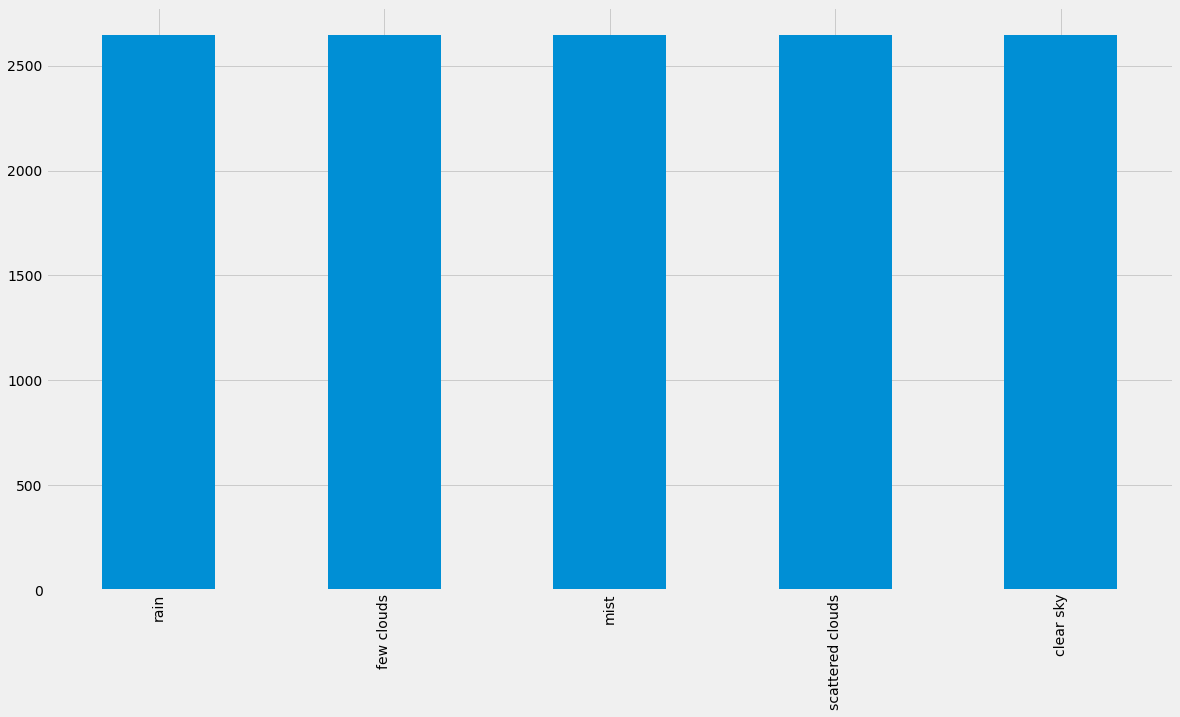

In [ ]:
import sklearn, optuna

#Hnadling Imbalance using the SMOTE Algorithm.
x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.22, stratify=y)
print("Number of Training Data Before Handling Imbalance: ", len(x_train)) 
print("Number of Testing Data Before Handling Imbalance: ", len(x_test))
handler = HandleImbalanceContext(OverSampler())
x_train, y_train = handler.fit_resample(x_train, y_train)
y_train.value_counts().plot(kind="bar", figsize=(18, 10))
print("Number of Training Data After Handling Imbalance: ", len(x_train)) 
print("Number of Testing Data After Handling Imbalance: ", len(x_test))
print()
print()
# label Encoder 
result_dict = {}
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)
for _ in range(len(pd.Series(y_train).unique())): 
  result_dict.update({pd.Series(y_train).unique()[_]: pd.Series(y).unique()[_]})
print(result_dict) 
print()
print()

def objective(trial):
   
    dtrain = lgb.Dataset(x_train, label=y_train)
    dvalid = lgb.Dataset(x_test, label=y_test)
    param = {
       "objective": "multiclass",
        "metric": "multi_logloss",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "verbosity": -1,
        "boosting_type": "gbdt",
        "num_leaves": trial.suggest_int("num_leaves", 2, 500),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 9),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "num_classes": 13
    }
    # Add a callback for pruning.
    pruning_callback = optuna.integration.LightGBMPruningCallback(trial, "multi_logloss")
    gbm = lgb.train(param, dtrain, valid_sets=[dtrain, dvalid],
                        valid_names=['train', 'test'],
                        num_boost_round=7000,early_stopping_rounds= 200,
                        verbose_eval=100,)
    preds = gbm.predict(x_test)
    pred_labels = np.rint(preds)

    labeled_prediction = [row.argmax() for row in preds]
    accuracy = sklearn.metrics.f1_score(y_test, labeled_prediction, average="weighted")
    print(labeled_prediction, y_test)
    
  #  preds = gbm.a(x_test)
    return accuracy


study = optuna.create_study(
        pruner=optuna.pruners.MedianPruner(n_warmup_steps=10), direction="maximize"
    )

study.optimize(objective, n_trials=100)
print("Number of finished trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
  print("    {}: {}".format(key, value))

In [ ]:
# till now the best
lgb_params_2_best = {
    "lambda_l1": 0.08449911178323045,
    "lambda_l2": 2.3506538458974247e-08,
    "num_leaves": 334,
    "feature_fraction": 0.7970008302144242,
    "bagging_fraction": 0.9385061033193363,
    "bagging_freq": 2,
    "min_child_samples": 10,
    "learning_rate": 0.06507633759573513,
    "boosting_model": "gbdt",
}

In [ ]:
# Building a Model out of the best hyperparameters
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import f1_score, make_scorer
import numpy as np

print("Number of Data Before Handling Imbalance: ", len(X)) 
handler = HandleImbalanceContext(SmoteSampler(4))
balanced_X, balanced_y = handler.fit_resample(X, y)
print("Number of Data After Handling Imbalance: ", len(balanced_X)) 
print()


f1_scorer = make_scorer(f1_score)
k_folds = StratifiedKFold()
i = 0
scores = []
for fold in k_folds.split(X, y): 
  x_train_indx, x_test_indx = fold[0], fold[1]
  x_train, y_train = X.iloc[x_train_indx], y.iloc[x_train_indx]
  x_test, y_test = X.iloc[x_test_indx], y.iloc[x_test_indx]
  lightboost_model = lgb.LGBMClassifier(lambda_l1= 0.08449911178323045, 
                                        lambda_l2=2.3506538458974247e-08, 
                                        num_leaves=334, 
                                        feature_fraction=0.7970008302144242,
                                        bagging_fraction=0.9385061033193363, 
                                        bagging_freq=2,
                                        min_child_samples=10, 
                                        learning_rate=0.06507633759573513, 
                                        boosting_type="gbdt"
                                      )
  lightboost_model.fit(x_train, y_train)
  preds = lightboost_model.predict(x_test)
  i += 1
  score = f1_score(y_test, preds, average="weighted")
  print(f"Model Score on fit number_{i}", score, "\n")
  print("Model Classification Report:\n")
  print(classification_report(y_test, preds))
  scores.append(score)
print("Average Score", np.array(scores).mean())

Number of Data Before Handling Imbalance:  13391
Started the Resampling 
SMOTE(k_neighbors=4)
Number of Data After Handling Imbalance:  16970

Model Score on fit number_1 0.8280817851180954 

Model Classification Report:

                  precision    recall  f1-score   support

       clear sky       0.94      1.00      0.97       436
      few clouds       0.88      0.95      0.91       641
            mist       0.77      0.65      0.70       337
            rain       0.79      0.68      0.73       586
scattered clouds       0.78      0.84      0.80       679

        accuracy                           0.83      2679
       macro avg       0.83      0.82      0.82      2679
    weighted avg       0.83      0.83      0.83      2679

Model Score on fit number_2 0.6768373095738963 

Model Classification Report:

                  precision    recall  f1-score   support

       clear sky       1.00      0.97      0.99       436
      few clouds       0.99      0.86      0.92       641

## **LGB Model with OverSampling dataset and optuna with cross validation**

In [170]:
import sklearn, optuna

print("Number of Data Before Handling Imbalance: ", len(new_X)) 
handler = HandleImbalanceContext(OverSampler())
new_X, new_y = handler.fit_resample(new_X, new_y)
print("Number of  Data After Handling Imbalance: ", len(new_X)) 
print()

def objective(trial):

    kfolds = KFold(6)
    scores = []
    for fold in kfolds.split(new_X, new_y): 
      train_idx, test_idx = fold[0], fold[1]
      x_train, y_train = new_X.iloc[train_idx], new_y.iloc[train_idx]
      x_test, y_test = new_X.iloc[test_idx], new_y.iloc[test_idx]

      label_encoder = LabelEncoder()
      label_encoder.fit(y_train)
      y_train = label_encoder.transform(y_train)
      y_test = label_encoder.transform(y_test)

      dtrain = lgb.Dataset(x_train, label=y_train)
      dvalid = lgb.Dataset(x_test, label=y_test)
      param = {
        "objective": "multiclass",
          "metric": "multi_logloss",
          "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
          "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
          "verbosity": -1,
          "boosting_type": "gbdt",
          "num_leaves": trial.suggest_int("num_leaves", 2, 500),
          "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
          "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
          "bagging_freq": trial.suggest_int("bagging_freq", 1, 9),
          "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
          "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
          "num_classes": 13
      }
      # Add a callback for pruning.
      pruning_callback = optuna.integration.LightGBMPruningCallback(trial, "multi_logloss")
      gbm = lgb.train(param, dtrain, valid_sets=[dtrain, dvalid],
                          valid_names=['train', 'test'],
                          num_boost_round=7000,early_stopping_rounds= 200,
                          verbose_eval=100,)
      preds = gbm.predict(x_test)
      pred_labels = np.rint(preds)

      labeled_prediction = [row.argmax() for row in preds]
      f1_score_ = sklearn.metrics.f1_score(y_test, labeled_prediction, average="weighted")
      scores.append(f1_score)
    
  #  preds = gbm.a(x_test)
    print(scores)
    return np.array(scores).mean()


study = optuna.create_study(
        pruner=optuna.pruners.MedianPruner(n_warmup_steps=10), direction="maximize"
    )

study.optimize(objective, n_trials=20)
print("Number of finished trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
  print("    {}: {}".format(key, value))

[I 2022-10-11 14:28:10,611] A new study created in memory with name: no-name-a94b3840-852f-4396-be4e-60356ab33ddf


Number of Data Before Handling Imbalance:  27405
Started the Resampling 
Number of  Data After Handling Imbalance:  27405

Training until validation scores don't improve for 200 rounds.
[100]	train's multi_logloss: 0.866529	test's multi_logloss: 0.86796
[200]	train's multi_logloss: 0.620646	test's multi_logloss: 0.622971
[300]	train's multi_logloss: 0.504892	test's multi_logloss: 0.516774
[400]	train's multi_logloss: 0.439518	test's multi_logloss: 0.465669
[500]	train's multi_logloss: 0.397588	test's multi_logloss: 0.437928
[600]	train's multi_logloss: 0.368196	test's multi_logloss: 0.420081
[700]	train's multi_logloss: 0.346264	test's multi_logloss: 0.409069
[800]	train's multi_logloss: 0.329047	test's multi_logloss: 0.402381
[900]	train's multi_logloss: 0.315187	test's multi_logloss: 0.396278
[1000]	train's multi_logloss: 0.303445	test's multi_logloss: 0.394877
[1100]	train's multi_logloss: 0.293455	test's multi_logloss: 0.393493
[1200]	train's multi_logloss: 0.284623	test's multi_lo

[W 2022-10-11 14:34:18,151] Trial 0 failed because of the following error: TypeError("unsupported operand type(s) for +: 'function' and 'function'")
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-170-5bf928d4e234>", line 55, in objective
    return np.array(scores).mean()
  File "/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py", line 179, in _mean
    ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
TypeError: unsupported operand type(s) for +: 'function' and 'function'


[<function f1_score at 0x7f67e99180e0>, <function f1_score at 0x7f67e99180e0>, <function f1_score at 0x7f67e99180e0>, <function f1_score at 0x7f67e99180e0>, <function f1_score at 0x7f67e99180e0>, <function f1_score at 0x7f67e99180e0>]


TypeError: ignored

## **LGBM with GBDT and OverSampling Dataset Parameters**

In [ ]:
def lgbmodel(train_x, train_y,  params): 
  
  lgb_train = lgb.Dataset(train_x,label=train_y,free_raw_data=False)
  clf = lgb.train(
    params,
    lgb_train,
    10)

  return clf


In [ ]:
lgbmodel_params = {
    "lambda_l1": 5.2991,
    "lambda_l2": 1.7083,
    "num_leaves": 306,
    "feature_fraction": 0.97178,
    "bagging_fraction": 0.78780,
    "bagging_freq": 7,
    "min_child_samples": 20,
    "learning_rate": 0.025607,
    "boosting_type": "gbdt",
    "objective": "multiclass",
    "num_classes": 5,
    "metrics": "multi_logloss"
}

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.22, stratify=y)
handler = HandleImbalanceContext(SmoteSampler(4))
x_train, y_train = handler.fit_resample(x_train, y_train)

result_dict = {}
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)
for _ in range(len(pd.Series(y_train).unique())): 
  result_dict.update({pd.Series(y_train).unique()[_]: pd.Series(y).unique()[_]})

print(result_dict)

# With SMOTE Model params
model = lgbmodel(x_train, y_train, lgbmodel_params)

Started the Resampling 
SMOTE(k_neighbors=4)
{4: 'few clouds', 2: 'mist', 0: 'rain', 1: 'clear sky', 3: 'scattered clouds'}


In [ ]:
pred = model.predict(x_test)

In [ ]:
y_pred = [p.argmax() for p in pred]

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score, f1_score

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       493
           1       0.96      0.91      0.93       743
           2       0.75      0.69      0.72       401
           3       0.62      0.77      0.69       520
           4       0.81      0.77      0.79       790

    accuracy                           0.83      2947
   macro avg       0.83      0.82      0.82      2947
weighted avg       0.84      0.83      0.83      2947



In [ ]:
k_folds = StratifiedKFold()
i = 0
scores = []
for fold in k_folds.split(X, y): 
  x_train_indx, x_test_indx = fold[0], fold[1]
  x_train, y_train = X.iloc[x_train_indx], y.iloc[x_train_indx]
  x_test, y_test = X.iloc[x_test_indx], y.iloc[x_test_indx]
  result_dict = {}
  label_encoder = LabelEncoder()
  label_encoder.fit(y_train)
  y_train = label_encoder.transform(y_train)
  y_test = label_encoder.transform(y_test)
  model = lgbmodel(x_train, y_train, lgbmodel_params)

  preds = model.predict(x_test)
  i += 1
  preds = [p.argmax() for p in preds]
  score = f1_score(y_test, preds, average="weighted")
  print(f"Model Score on fit number_{i}", score, "\n")
  print("Model Classification Report:\n")
  print(classification_report(y_test, preds))
  scores.append(score)
print("Average Score", np.array(scores).mean())

Model Score on fit number_1 0.6973595825955378 

Model Classification Report:

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       436
           1       0.79      1.00      0.89       641
           2       0.94      0.04      0.08       337
           3       0.95      0.43      0.59       586
           4       0.61      0.99      0.75       679

    accuracy                           0.75      2679
   macro avg       0.84      0.69      0.65      2679
weighted avg       0.82      0.75      0.70      2679

Model Score on fit number_2 0.640961649511089 

Model Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       436
           1       0.97      1.00      0.98       641
           2       0.91      0.03      0.06       336
           3       0.47      0.62      0.54       587
           4       0.44      0.52      0.48       678

    accuracy                

In [ ]:
f1_score(y_pred, y_test, average="weighted")

0.8307371173929212

In [ ]:
accuracy_score(y_pred, y_test)

0.827621309806583

## **Without Hyperparamater**

In [ ]:
def do_cross_validation(models: dict, X: List[List], y: List, cv: int) -> None: 
  print(models)
  for model in models: 
    print(f"Fitting a model: {model}")
    score = cross_validate(models[model], X, labeled_y, cv=cv, return_train_score=True)
    print(f"{model} score is {score}")
    print()

In [ ]:
xgboost_model = xgb.XGBClassifier(n_estimator=200)
catboost_model = CatBoostClassifier(verbose=0, n_estimators=200)
lgb_model = LGBMClassifier(n_estimators=200)
randomforest_model = RandomForestClassifier(n_estimators=200)
knn_model = KNeighborsClassifier()
svm_model = SVC()

models = {
    "xgboost": xgboost_model, 
    "catboost": catboost_model, 
    "lgboost": lgb_model,
    "randomforest": randomforest_model, 
    "KNN Classifier": knn_model,
    "SVM": svm_model,
}

do_cross_validation(models, X, y, 6)

{'xgboost': XGBClassifier(n_estimator=200), 'catboost': <catboost.core.CatBoostClassifier object at 0x7f4dd8422710>, 'lgboost': LGBMClassifier(n_estimators=200), 'randomforest': RandomForestClassifier(n_estimators=200), 'KNN Classifier': KNeighborsClassifier(), 'SVM': SVC()}
xgboost
Fitting a model: xgboost
XGBClassifier(n_estimator=200)
xgboost score is {'fit_time': array([10.79733777,  6.4572804 ,  6.38413715,  6.40463734,  6.34813404,
        6.37129641]), 'score_time': array([0.14332342, 0.13778162, 0.13494587, 0.13914251, 0.13796163,
       0.13553834]), 'test_score': array([0.76866495, 0.7407135 , 0.72710555, 0.70577418, 0.77234277,
       0.7219566 ]), 'train_score': array([0.79102611, 0.7949246 , 0.79440971, 0.79588084, 0.78374402,
       0.79720485])}

catboost
Fitting a model: catboost
catboost score is {'fit_time': array([7.82047892, 7.80651617, 7.72890568, 8.44664717, 7.80595088,
       7.80831981]), 'score_time': array([0.0065701 , 0.00666118, 0.00789118, 0.00796008, 0.007

### **HyperParameter Tuning**

In [ ]:
# selecting XGBoost Classifier and performing hyperparameter tuning.

from sklearn.metrics import make_scorer, roc_auc_score, recall_score, matthews_corrcoef, balanced_accuracy_score, accuracy_score, f1_score

f1_score = make_scorer(f1_score)

scoring = {"f1_scoring": f1_score}

parameters = {
    "max_depth": [6, 7, 9, 10, 8],
    "min_child_weight": [1, 2, 3],
    "max_delta_step": [1, 2, 3, 5, 8, 10,  50], 
    "gamma": [1, 2, 5],
    "eta": [0.1, 0.5, 1.0],
    "n_estimators": [100, 200, 300, 500, 1000]
}

xgboost_model = xgb.XGBClassifier()
random_search = RandomizedSearchCV(xgboost_model, param_distributions=parameters, cv=3, n_jobs=10, scoring=f1_score)

In [ ]:
random_search.fit(X, y)

In [ ]:
random_search.best_params_.keys()

In [ ]:
random_search.best_score_

##**SMOTE Dataset**

Number of Training Data Before Handling Imbalance:  10885
Number of Testing Data Before Handling Imbalance:  3071
Started the Resampling 
SMOTE(k_neighbors=4)
Number of Training Data After Handling Imbalance:  26109
Number of Testing Data After Handling Imbalance:  3071


{6: 'overcast clouds', 4: 'few clouds', 5: 'mist', 0: 'fog', 7: 'haze', 1: 'scattered clouds', 3: 'rain', 2: 'clear sky', 8: 'thunderstorm'}




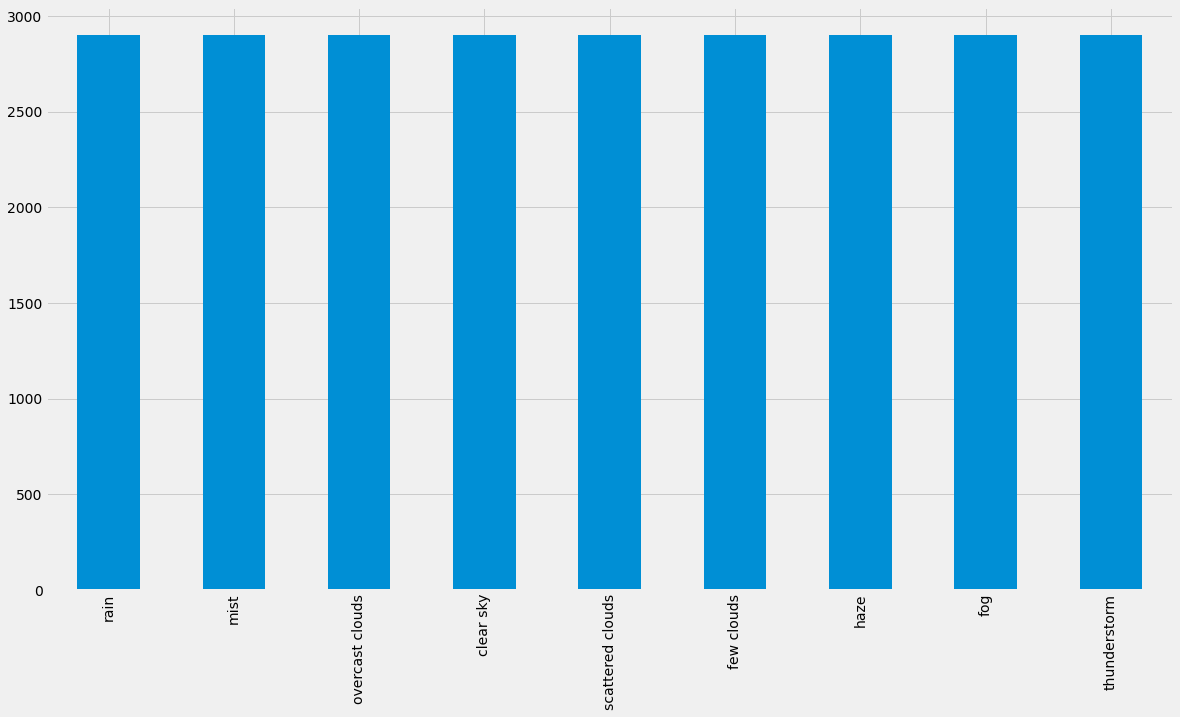

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.22, stratify=y)
print("Number of Training Data Before Handling Imbalance: ", len(x_train)) 
print("Number of Testing Data Before Handling Imbalance: ", len(x_test))
handler = HandleImbalanceContext(SmoteSampler(4))
x_train, y_train = handler.fit_resample(x_train, y_train)
y_train.value_counts().plot(kind="bar", figsize=(18, 10))
print("Number of Training Data After Handling Imbalance: ", len(x_train)) 
print("Number of Testing Data After Handling Imbalance: ", len(x_test))
print()
print()
# label Encoder 
result_dict = {}
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)
for _ in range(len(pd.Series(y_train).unique())): 
  result_dict.update({pd.Series(y_train).unique()[_]: pd.Series(y).unique()[_]})
print(result_dict) 
print()
print()

## **XGBOOST On SMOTE Dataset**

In [ ]:
xgboost_model = xgb.XGBClassifier(eta=0.1, max_depth=8, rate_drop=0.1, booster="gbtree", n_estimators=200, n_jobs=-1)
xgboost_model.fit(x_train, y_train)
y_pred_xgb = xgboost_model.predict(x_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       480
           1       0.77      0.79      0.78       261
           2       0.33      0.50      0.40        24
           3       0.40      0.43      0.41       165
           4       0.63      0.58      0.60       370
           5       0.80      0.89      0.84       225
           6       0.72      0.66      0.69       645
           7       0.78      0.78      0.78       819
           8       0.29      0.37      0.32        82

    accuracy                           0.74      3071
   macro avg       0.63      0.66      0.64      3071
weighted avg       0.74      0.74      0.74      3071




### **XGBOOST Classifier on Imabalnce Dataset**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.22, stratify=y)
result_dict = {}
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)
for _ in range(len(pd.Series(y_train).unique())): 
  result_dict.update({pd.Series(y_train).unique()[_]: pd.Series(y).unique()[_]})
print(result_dict)

xgboost_model = xgb.XGBClassifier(eta=0.1, max_depth=8, rate_drop=0.1, booster="gbtree", n_estimators=200, n_jobs=-1)
xgboost_model.fit(x_train, y_train)
y_pred_xgb = xgboost_model.predict(x_test)

{6: 'overcast clouds', 4: 'few clouds', 7: 'mist', 0: 'fog', 5: 'haze', 1: 'scattered clouds', 3: 'rain', 8: 'clear sky', 2: 'thunderstorm'}


In [ ]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       480
           1       0.83      0.87      0.85       261
           2       0.67      0.33      0.44        24
           3       0.60      0.33      0.42       165
           4       0.67      0.62      0.65       370
           5       0.77      0.83      0.80       225
           6       0.67      0.68      0.67       645
           7       0.74      0.84      0.79       819
           8       0.59      0.21      0.31        82

    accuracy                           0.75      3071
   macro avg       0.72      0.63      0.65      3071
weighted avg       0.75      0.75      0.74      3071



## **OverSampling Dataset**

Number of Training Data Before Handling Imbalance:  10444
Number of Testing Data Before Handling Imbalance:  2947
Started the Resampling 
Number of Training Data After Handling Imbalance:  13235
Number of Testing Data After Handling Imbalance:  2947


{2: 'few clouds', 1: 'mist', 4: 'rain', 0: 'clear sky', 3: 'scattered clouds'}




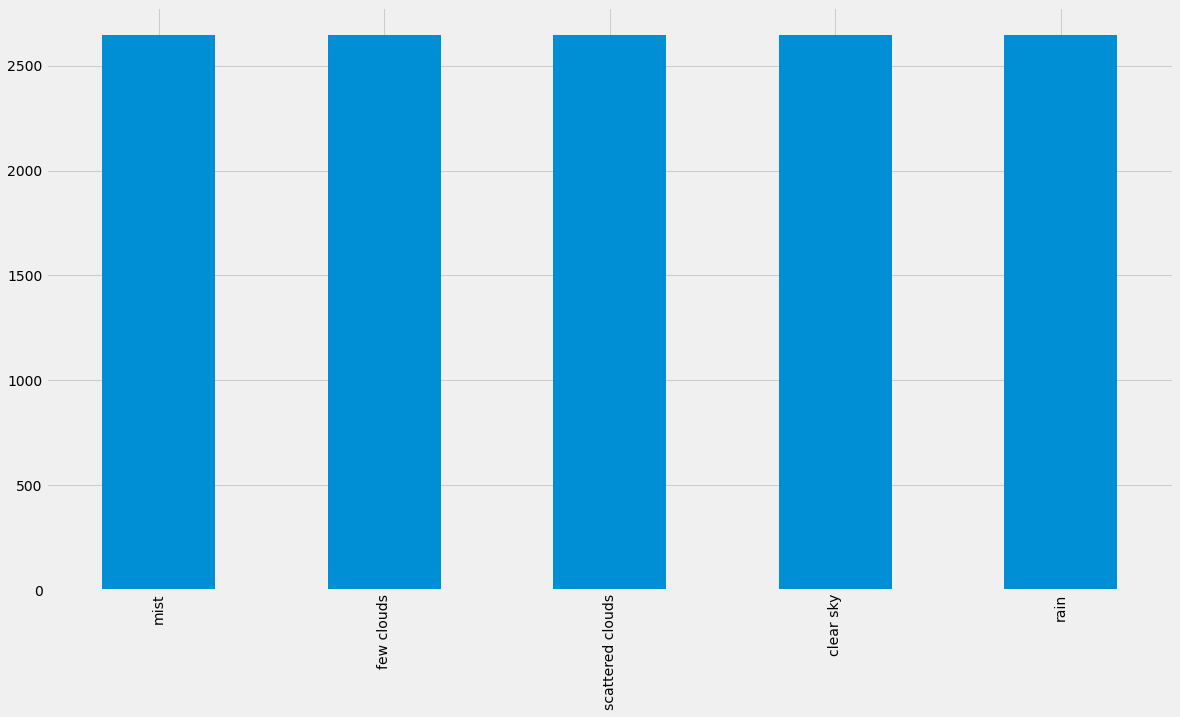

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.22, stratify=y)
print("Number of Training Data Before Handling Imbalance: ", len(x_train)) 
print("Number of Testing Data Before Handling Imbalance: ", len(x_test))
handler = HandleImbalanceContext(OverSampler())
x_train, y_train = handler.fit_resample(x_train, y_train)
y_train.value_counts().plot(kind="bar", figsize=(18, 10))
print("Number of Training Data After Handling Imbalance: ", len(x_train)) 
print("Number of Testing Data After Handling Imbalance: ", len(x_test))
print()
print()
# label Encoder 
result_dict = {}
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)
for _ in range(len(pd.Series(y_train).unique())): 
  result_dict.update({pd.Series(y_train).unique()[_]: pd.Series(y).unique()[_]})
print(result_dict) 
print()
print()

## **XGBOOST Model on OverSampling dataset**

In [ ]:
xgboost_model = xgb.XGBClassifier(eta=0.1, max_depth=5, rate_drop=0.4, booster="gbtree", n_estimators=200, n_jobs=-1)
xgboost_model.fit(x_train, y_train)
y_pred_xgb = xgboost_model.predict(x_test)

In [ ]:
print(classification_report(y_train, xgboost_model.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2647
           1       0.95      0.97      0.96      2647
           2       0.92      0.92      0.92      2647
           3       0.89      0.82      0.85      2647
           4       0.85      0.90      0.88      2647

    accuracy                           0.92     13235
   macro avg       0.92      0.92      0.92     13235
weighted avg       0.92      0.92      0.92     13235



In [ ]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       480
           1       0.92      0.94      0.93       705
           2       0.72      0.76      0.74       370
           3       0.81      0.69      0.74       645
           4       0.80      0.85      0.83       747

    accuracy                           0.85      2947
   macro avg       0.85      0.85      0.85      2947
weighted avg       0.85      0.85      0.85      2947



In [ ]:
accuracy_score(y_test, y_pred_xgb)

0.8493383101459111

In [ ]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 32.0 MB/s 


In [ ]:
import tensorflow.keras as tf 
import tensorflow_addons as tfa

In [ ]:
len(result_dict)

9

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.22, stratify=y)
result_dict = {}
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)
for _ in range(len(pd.Series(y_train).unique())): 
  result_dict.update({pd.Series(y_train).unique()[_]: pd.Series(y).unique()[_]})
print(result_dict)

normalizer = MinMaxScaler()
normalizer.fit(x_train)
normalized_x_train = normalizer.transform(x_train)
normalized_x_test = normalizer.transform(x_test)

{4: 'few clouds', 0: 'mist', 1: 'rain', 3: 'clear sky', 2: 'scattered clouds'}


In [ ]:
deep_lrn_model = tf.Sequential()

In [ ]:
deep_lrn_model.add(tf.layers.InputLayer(input_shape=(8, )))

In [ ]:
deep_lrn_model.add(tf.layers.Dense(1024, activation="relu"))

In [ ]:
#deep_lrn_model.add(tf.layers.Dense(512, activation="relu"))
deep_lrn_model.add(tf.layers.Dropout(0.2))
deep_lrn_model.add(tf.layers.Dense(256, activation="relu"))
deep_lrn_model.add(tf.layers.Dropout(0.2))
deep_lrn_model.add(tf.layers.Dense(128, activation="relu"))
deep_lrn_model.add(tf.layers.Dropout(0.2))
deep_lrn_model.add(tf.layers.Dense(9, activation="softmax"))

In [ ]:
deep_lrn_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=tfa.metrics.F1Score(num_classes=9, average="weighted"))

In [ ]:
deep_lrn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              9216      
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 9)                 1

In [ ]:
y_train_labeled = np.zeros((len(y_train), 9))
y_test_labeled = np.zeros((len(y_test), 9))
y_train_labeled[np.arange(len(y_train_labeled)), y_train] = 1
y_test_labeled[np.arange(len(y_test_labeled)), y_test] = 1
history = deep_lrn_model.fit(x=normalized_x_train,y= y_train_labeled, validation_data=(normalized_x_test, y_test_labeled), epochs=100, callbacks=[tf.callbacks.EarlyStopping(patience=20)])

Epoch 1/100
327/327 [==============================] - 3s 5ms/step - loss: 0.8100 - f1_score: 0.6631 - val_loss: 0.6127 - val_f1_score: 0.7456
Epoch 2/100
327/327 [==============================] - 1s 4ms/step - loss: 0.6137 - f1_score: 0.7358 - val_loss: 0.5862 - val_f1_score: 0.7500
Epoch 3/100
327/327 [==============================] - 2s 5ms/step - loss: 0.5833 - f1_score: 0.7471 - val_loss: 0.5596 - val_f1_score: 0.7514
Epoch 4/100
327/327 [==============================] - 1s 4ms/step - loss: 0.5708 - f1_score: 0.7548 - val_loss: 0.6532 - val_f1_score: 0.7304
Epoch 5/100
327/327 [==============================] - 1s 4ms/step - loss: 0.5622 - f1_score: 0.7517 - val_loss: 0.5246 - val_f1_score: 0.7653
Epoch 6/100
327/327 [==============================] - 3s 8ms/step - loss: 0.5524 - f1_score: 0.7570 - val_loss: 0.5402 - val_f1_score: 0.7182
Epoch 7/100
327/327 [==============================] - 3s 8ms/step - loss: 0.5426 - f1_score: 0.7582 - val_loss: 0.5393 - val_f1_score: 0.7503

## **Training Neural Net with ADASYN Dataset**

In [ ]:
# Handling Imbalance with ADASYN

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.22, stratify=y)
print("Number of Training Data Before Handling Imbalance: ", len(x_train)) 
print("Number of Testing Data Before Handling Imbalance: ", len(x_test))
handler = HandleImbalanceContext(ADASYNSampler())
x_train, y_train = handler.fit_resample(x_train, y_train)
y_train.value_counts().plot(kind="bar", figsize=(18, 10))
print("Number of Training Data After Handling Imbalance: ", len(x_train)) 
print("Number of Testing Data After Handling Imbalance: ", len(x_test))
print()
print()
# label Encoder 
result_dict = {}
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)
for _ in range(len(pd.Series(y_train).unique())): 
  result_dict.update({pd.Series(y_train).unique()[_]: pd.Series(y).unique()[_]})
print(result_dict) 
print()
print()

Number of Training Data Before Handling Imbalance:  10444
Number of Testing Data Before Handling Imbalance:  2947


TypeError: ignored

In [ ]:
normalizer = MinMaxScaler()
normalizer.fit(x_train)
normalized_x_train = normalizer.transform(x_train)
normalized_x_test = normalizer.transform(x_test)

In [ ]:
deep_lrn_model1 = tf.Sequential()

In [ ]:
deep_lrn_model1.add(tf.layers.InputLayer(input_shape=(8, )))
deep_lrn_model1.add(tf.layers.Dense(1024, activation="relu"))
#deep_lrn_model.add(tf.layers.Dense(512, activation="relu"))
deep_lrn_model1.add(tf.layers.Dropout(0.2))
deep_lrn_model1.add(tf.layers.Dense(256, activation="relu"))
deep_lrn_model1.add(tf.layers.Dropout(0.2))
deep_lrn_model1.add(tf.layers.Dense(128, activation="relu"))
deep_lrn_model1.add(tf.layers.Dropout(0.2))
deep_lrn_model1.add(tf.layers.Dense(13, activation="softmax"))
deep_lrn_model1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=tfa.metrics.F1Score(num_classes=13, average="weighted"))

In [ ]:
y_train_labeled = np.zeros((len(y_train), 13))
y_test_labeled = np.zeros((len(y_test), 13))
y_train_labeled[np.arange(len(y_train_labeled)), y_train] = 1
y_test_labeled[np.arange(len(y_test_labeled)), y_test] = 1
history = deep_lrn_model1.fit(x=normalized_x_train,y= y_train_labeled, validation_data=(normalized_x_test, y_test_labeled), epochs=100, callbacks=[tf.callbacks.EarlyStopping(patience=20)])

## **Neural Net with the BorderLineSmote Dataset**

In [ ]:
# Handling Imbalance with SVMSMOTE

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.22, stratify=y)
print("Number of Training Data Before Handling Imbalance: ", len(x_train)) 
print("Number of Testing Data Before Handling Imbalance: ", len(x_test))
handler = HandleImbalanceContext(BorderLineSmoteSampler(4))
x_train, y_train = handler.fit_resample(x_train, y_train)
y_train.value_counts().plot(kind="bar", figsize=(18, 10))
print("Number of Training Data After Handling Imbalance: ", len(x_train)) 
print("Number of Testing Data After Handling Imbalance: ", len(x_test))
print()
print()
# label Encoder 
result_dict = {}
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)
for _ in range(len(pd.Series(y_train).unique())): 
  result_dict.update({pd.Series(y_train).unique()[_]: pd.Series(y).unique()[_]})
print(result_dict) 
print()
print()

In [ ]:
normalizer = MinMaxScaler()
normalizer.fit(x_train)
normalized_x_train = normalizer.transform(x_train)
normalized_x_test = normalizer.transform(x_test)

In [ ]:
deep_lrn_model2 = tf.Sequential()

In [ ]:
deep_lrn_model2.add(tf.layers.InputLayer(input_shape=(8, )))
deep_lrn_model2.add(tf.layers.Dense(1024, activation="relu"))
#deep_lrn_model.add(tf.layers.Dense(512, activation="relu"))
deep_lrn_model2.add(tf.layers.Dropout(0.2))
#deep_lrn_model2.add(tf.layers.Dense(256, activation="relu"))
#deep_lrn_model2.add(tf.layers.Dropout(0.2))
deep_lrn_model2.add(tf.layers.Dense(128, activation="relu"))
deep_lrn_model2.add(tf.layers.Dropout(0.2))
deep_lrn_model2.add(tf.layers.Dense(13, activation="softmax"))
deep_lrn_model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=tfa.metrics.F1Score(num_classes=13, average="weighted"))

In [ ]:
y_train_labeled = np.zeros((len(y_train), 13))
y_test_labeled = np.zeros((len(y_test), 13))
y_train_labeled[np.arange(len(y_train_labeled)), y_train] = 1
y_test_labeled[np.arange(len(y_test_labeled)), y_test] = 1
history = deep_lrn_model2.fit(x=normalized_x_train,y= y_train_labeled, validation_data=(normalized_x_test, y_test_labeled), epochs=100, callbacks=[tf.callbacks.EarlyStopping(patience=20)])

In [ ]:
!pip install bayesian-optimization

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from  bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [ ]:
import sklearn

score_acc = make_scorer(sklearn.metrics.f1_score)

def nn_cl_bo2(neurons, activation, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
    def nn_cl_fun():
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=10, activation=activation))
        if normalization > 0.5:
            nn.add(BatchNormalization())
        for i in range(layers1):
            nn.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            nn.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(13, activation='sigmoid'))
        nn.compile(loss='categorical_crossentropy', optimizer=optimizer,  metrics=tfa.metrics.F1Score(num_classes=13, average="weighted"))
        return nn
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, normalized_x_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score



params_nn2 ={
    'neurons': (10, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100),
    'layers1':(1,3),
    'layers2':(1,3),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}
# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo2, params_nn2, random_state=111)
nn_bo.maximize(init_points=25, n_iter=4)

In [ ]:
# hyperparameter tuning

def build_models(hp): 
  model = tf.Sequential()
  for _ in range(hp.Int("num_layers", 2, 20)): 
    model.add(tf.layers.Dense(units=hp.Int("units_" + str(_), min_value=128, max_value=1024, step=64), activation="relu"))
    model.add(tf.layers.Dense(13, activation="softmax"))
    model.compile(
        optimizer=tf.optimizers.Adam(),
            loss="categorical_crossentropy",
            metrics=tfa.metrics.F1Score(num_classes=13, average="weighted")
        )
  return model

In [ ]:
tuner = RandomSearch(
    build_models,
    objective="val_accuracy",
    max_trials=15,
    executions_per_trial=10,
    directory="project1",
    project_name="demo1"
)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 1024, 'step': 64, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 1024, 'step': 64, 'sampling': None}


In [ ]:
tuner.search(normalized_x_train, y_train_labeled, epochs=10, validation_split=0.2)

In [ ]:
tuner.results_summary()

In [ ]:

# hyperparameter tuning for neural networks
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import tensorflow as tf 
import sklearn
import tensorflow_addons as tfa


def data_gen(sampler): 
  x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.22, stratify=y)
  print("Number of Training Data Before Handling Imbalance: ", len(x_train)) 
  print("Number of Testing Data Before Handling Imbalance: ", len(x_test))
  handler = HandleImbalanceContext(sampler)
  x_train, y_train = handler.fit_resample(x_train, y_train)
 # y_train.value_counts().plot(kind="bar", figsize=(18, 10))
  print("Number of Training Data After Handling Imbalance: ", len(x_train)) 
  print("Number of Testing Data After Handling Imbalance: ", len(x_test))
  # label Encoder 
  result_dict = {}
  label_encoder = LabelEncoder()
  label_encoder.fit(y_train)
  y_train = label_encoder.transform(y_train)
  y_test = label_encoder.transform(y_test)
  for _ in range(len(pd.Series(y_train).unique())): 
    result_dict.update({pd.Series(y_train).unique()[_]: pd.Series(y).unique()[_]})
  
  y_train_labelled = np.zeros((len(y_train), 13))
  y_test_labelled = np.zeros((len(y_test), 13))
  y_train_labelled[np.arange(len(y_train)), y_train] = 1
  y_test_labelled[np.arange(len(y_test)), y_test] = 1

  return x_train, x_test, y_train_labelled, y_test_labelled 


def create_model(trial):
  num_layers = trial.suggest_int("num_layers", 1, 20)
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Input(shape=(8, )))
  for i in range(num_layers):
    num_hidden = trial.suggest_int("n_units_l{}".format(i), 128, 2048, 64)
    model.add(tf.keras.layers.Dense(num_hidden, activation="relu"))
  model.add(tf.keras.layers.Dense(13, activation="softmax"))
  
  return model


def create_optimizer(trial):
  kwargs = {}
  optimizer_options = ["Adam", "SGD", "RMSprop", "Adagrad"]
  optimizer_selected = trial.suggest_categorical("optimizer", optimizer_options)
  if optimizer_selected == "Adam":
    kwargs["learning_rate"] = trial.suggest_float("adam_learning_rate", 1e-5, 1e-1, log=True)
  elif optimizer_selected == "SGD":
    kwargs["learning_rate"] = trial.suggest_float("sgd_learning_rate", 1e-5, 1e-1, log=True)
    kwargs["momentum"] = trial.suggest_float("sgd_momentum", 1e-5, 1e-1, log=True)
  elif optimizer_selected == "RMSprop": 
    kwargs["learning_rate"] = trial.suggest_float("rmsprop_learning_rate", 1e-5, 1e-1, log=True)
    kwargs["momentum"] = trial.suggest_float("rmsprop_momentum", 1e-5, 1e-1, log=True)
    kwargs["rho"] = trial.suggest_float("rmsprop_rho", 1e-5, 1e-1, log=True)
    kwargs["epsilon"] = trial.suggest_float("rmsprop_epsilon", 1e-9, 1e-1, log=True)
  elif optimizer_selected == "Adagrad":
    kwargs["learning_rate"] = trial.suggest_float("adagrad_learning_rate", 1e-5, 1e-1, log=True)
    kwargs["epsilon"] = trial.suggest_float("adagrad_epsilon", 1e-9, 1e-1, log=True)
    #initial_accumulator_value
    kwargs["initial_accumulator_value"] = trial.suggest_float("adagrad_initial_accumulator_value", 1e-1, 1.0, log=True)

  optimizer = getattr(tf.optimizers, optimizer_selected)(**kwargs)
  return optimizer


def learn(model, optimizer, x_Train, y_train, x_test, y_test, epochs): 
  model.compile(optimizer=optimizer,
            loss="categorical_crossentropy",
            metrics=tfa.metrics.F1Score(num_classes=13, average="weighted"))
  history = model.fit(x_train, y_train, epochs=epochs)
  y_preds = model.predict(x_test)
  return sklearn.metrics.f1_score(y_preds, y_test)


def objective(trial): 
  x_train, x_test, y_train, y_test = data_gen(BorderLineSmoteSampler(4))
  print(len(x_train))
  optimizer = create_optimizer(trial)
  print(optimizer)
  model = create_model(trial)

  model.compile(optimizer=optimizer,
            loss="categorical_crossentropy",
            metrics=tfa.metrics.F1Score(num_classes=13, average="weighted"))
  history = model.fit(x_train, y_train, epochs=20)
  y_preds = model.predict(x_test)
  return sklearn.metrics.f1_score(y_preds, y_test)


def search(): 
  study = optuna.create_study(direction="maximize")
  study.optimize(objective, n_trials=10)
  print("Number of finished trials: ", len(study.trials))
  print("Best trial:")
  trial = study.best_trial
  print("  Value: ", trial.value)
  print("  Params: ")
  for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


In [ ]:
search()

In [ ]:
# Combining some label 

pd.Series(y).value_counts()

scattered clouds    3720
rain                2932
clear sky           2179
mist                1683
few clouds          1185
haze                 752
thunderstorm         374
fog                  108
Name: description, dtype: int64

In [ ]:
df.description = np.where(df.description == "thunderstorm with rain", "thunderstorm", df.description)
df.description = np.where(df.description == "thunderstorm with light rain", "thunderstorm", df.description)
df.description = np.where(df.description == "light rain", "rain", df.description)
df.description = np.where(df.description == "drizzle", "rain", df.description)
df.description = np.where(df.description == "haze", "fog", df.description)
df.description = np.where(df.description == "fog", "mist", df.description)
df.description = np.where(df.description == "thunderstorm", "rain", df.description)

In [ ]:
df.description.value_counts()

scattered clouds    3720
rain                3306
mist                2543
clear sky           2179
few clouds          1185
overcast clouds     1023
Name: description, dtype: int64

In [ ]:
y = df["description"]
df.drop(["description", "icon", "main", "id", "sunrise", "sunset", "timezone_offset", "timezone", "lat", "lon", "dt"], axis=1, inplace=True)
X = df

In [ ]:
pd.Series(y).value_counts()

scattered clouds    3720
rain                3306
mist                2543
clear sky           2179
few clouds          1185
overcast clouds     1023
Name: description, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
import xgboost as xgb

In [ ]:
xgb_m = xgb.XGBClassifier(eta=0.1, max_depth=12, rate_drop=0.1, booster="gbtree", n_estimators=500, n_jobs=-1)

In [ ]:
xgb_m.fit(x_train, y_train)

XGBClassifier(eta=0.1, max_depth=12, n_estimators=500, n_jobs=-1,
              objective='multi:softprob', rate_drop=0.1)

In [ ]:
preds = xgb_m.predict(x_test)

In [ ]:
# with imbalance dataset
print(classification_report(y_test, preds))

                  precision    recall  f1-score   support

       clear sky       0.94      0.98      0.96       436
      few clouds       0.77      0.88      0.82       237
             fog       0.69      0.50      0.58        22
            haze       0.46      0.29      0.35       150
            mist       0.69      0.64      0.67       337
            rain       0.76      0.79      0.77       586
scattered clouds       0.78      0.83      0.81       744
    thunderstorm       0.56      0.29      0.39        75

        accuracy                           0.78      2587
       macro avg       0.71      0.65      0.67      2587
    weighted avg       0.77      0.78      0.77      2587



In [ ]:
handler = HandleImbalanceContext(OverSampler())

x_train, y_train = handler.fit_resample(x_train, y_train)


Started the Resampling 


In [ ]:
xgb_m1 = xgb.XGBClassifier(eta=0.1, max_depth=8, rate_drop=0.1, booster="gbtree", n_estimators=200, n_jobs=-1)

In [ ]:
xgb_m1.fit(x_train, y_train)

XGBClassifier(eta=0.1, max_depth=8, n_estimators=200, n_jobs=-1,
              objective='multi:softprob', rate_drop=0.1)

In [ ]:
preds1 = xgb_m1.predict(x_test)

In [ ]:
print(classification_report(y_test, preds1))

                  precision    recall  f1-score   support

       clear sky       0.94      0.96      0.95       436
      few clouds       0.76      0.86      0.81       237
             fog       0.55      0.50      0.52        22
            haze       0.41      0.33      0.37       150
            mist       0.66      0.69      0.68       337
            rain       0.77      0.75      0.76       586
scattered clouds       0.79      0.78      0.79       744
    thunderstorm       0.37      0.36      0.36        75

        accuracy                           0.76      2587
       macro avg       0.66      0.66      0.66      2587
    weighted avg       0.76      0.76      0.76      2587



In [ ]:
len(x_train)

40776

In [ ]:
import lightgbm as lgb

m3 = lgb.LGBMClassifier()

m3.fit(x_train, y_train)

pred3 = m3.predict(x_test)


print(classification_report(y_test, pred3))

                  precision    recall  f1-score   support

       clear sky       0.95      0.97      0.96       436
      few clouds       0.76      0.88      0.82       237
             fog       0.50      0.68      0.58        22
            haze       0.39      0.42      0.40       150
            mist       0.65      0.66      0.66       337
            rain       0.79      0.70      0.74       586
scattered clouds       0.82      0.74      0.78       744
    thunderstorm       0.25      0.52      0.34        75

        accuracy                           0.75      2587
       macro avg       0.64      0.70      0.66      2587
    weighted avg       0.77      0.75      0.75      2587



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
handler = HandleImbalanceContext(SmoteSampler(4))

x_train, y_train = handler.fit_resample(x_train, y_train)

Started the Resampling 
SMOTE(k_neighbors=4)


In [ ]:
xgb_m2 = xgb.XGBClassifier(eta=0.1, max_depth=8, rate_drop=0.1, booster="gbtree", n_estimators=200, n_jobs=-1)

xgb_m2.fit(x_train, y_train)
preds2 = xgb_m2.predict(x_test)
print(classification_report(y_test, preds2))

                  precision    recall  f1-score   support

       clear sky       0.95      0.97      0.96       436
      few clouds       0.76      0.86      0.81       237
             fog       0.44      0.64      0.52        22
            haze       0.37      0.37      0.37       150
            mist       0.67      0.64      0.65       337
            rain       0.79      0.73      0.76       586
scattered clouds       0.79      0.78      0.78       744
    thunderstorm       0.33      0.39      0.36        75

        accuracy                           0.75      2587
       macro avg       0.64      0.67      0.65      2587
    weighted avg       0.76      0.75      0.75      2587



In [ ]:

m3 = lgb.LGBMClassifier()

m3.fit(x_train, y_train)

pred3 = m3.predict(x_test)


print(classification_report(y_test, pred3))

                  precision    recall  f1-score   support

       clear sky       0.93      0.96      0.94       330
      few clouds       0.89      0.93      0.91       394
            mist       0.60      0.61      0.61       385
 overcast clouds       0.83      0.94      0.88       380
            rain       0.55      0.50      0.52       439
scattered clouds       0.86      0.83      0.84      1275

        accuracy                           0.80      3203
       macro avg       0.78      0.79      0.78      3203
    weighted avg       0.79      0.80      0.79      3203



0         overcast clouds
1              few clouds
2               clear sky
3        scattered clouds
4        scattered clouds
               ...       
40771        thunderstorm
40772        thunderstorm
40773        thunderstorm
40774        thunderstorm
40775        thunderstorm
Name: description, Length: 40776, dtype: object

In [ ]:
result_dict = {}
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)
for _ in range(len(pd.Series(y_train).unique())): 
  result_dict.update({pd.Series(y_train).unique()[_]: pd.Series(y).unique()[_]})
print(result_dict) 

{4: 'overcast clouds', 1: 'few clouds', 5: 'mist', 3: 'scattered clouds', 2: 'rain', 0: 'clear sky'}


In [ ]:
lgbmodel_params = {
    "lambda_l1": 5.2991,
    "lambda_l2": 1.7083,
    "num_leaves": 306,
    "feature_fraction": 0.97178,
    "bagging_fraction": 0.78780,
    "bagging_freq": 7,
    "min_child_samples": 20,
    "learning_rate": 0.025607,
    "boosting_type": "gbdt",
    "objective": "multiclass",
    "num_classes": 5,
    "metrics": "multi_logloss"
}

In [ ]:
lgb_m2 = lgb.train(lgbmodel_params, x_train, y_train)

In [ ]:
lgb_m2 = lgb.LGBMClassifier(**)

In [ ]:
lgb_m2.fit(x_train, y_train)

LGBMClassifier()

In [ ]:
p = lgb_m2.predict(x_test)

In [ ]:
print(classification_report(y_test, p))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       330
           1       0.86      0.93      0.89       394
           2       0.31      0.34      0.33       135
           3       0.50      0.62      0.55       250
           4       0.83      0.94      0.89       380
           5       0.52      0.52      0.52       387
           6       0.90      0.73      0.81      1275
           7       0.16      0.40      0.23        52

    accuracy                           0.75      3203
   macro avg       0.63      0.68      0.65      3203
weighted avg       0.78      0.75      0.76      3203



In [ ]:
handler = HandleImbalanceContext(ADASYNSampler())

x_train, y_train = handler.fit_resample(x_train, y_train)

Started the Resampling 


In [ ]:
x_train.duplicated().sum()

250

In [ ]:
pd.Series(y).value_counts()

scattered clouds    6372
few clouds          1971
rain                1936
overcast clouds     1900
clear sky           1652
mist                1249
fog                  673
thunderstorm         260
Name: description, dtype: int64

In [ ]:
lgb_m2 = lgb.LGBMClassifier(**lgbmodel_params)
lgb_m2.fit(x_train, y_train)

LGBMClassifier(bagging_fraction=0.7878, bagging_freq=7,
               feature_fraction=0.97178, lambda_l1=5.2991, lambda_l2=1.7083,
               learning_rate=0.025607, metrics='multi_logloss', num_classes=5,
               num_leaves=306, objective='multiclass')

In [ ]:
p = lgb_m2.predict(x_test)

In [ ]:
print(classification_report(y_test, p))

                  precision    recall  f1-score   support

       clear sky       0.91      1.00      0.95       330
      few clouds       0.84      0.98      0.90       394
            mist       0.57      0.53      0.55       385
 overcast clouds       0.78      0.99      0.88       380
            rain       0.50      0.48      0.49       439
scattered clouds       0.87      0.76      0.81      1275

        accuracy                           0.77      3203
       macro avg       0.74      0.79      0.76      3203
    weighted avg       0.77      0.77      0.77      3203



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
handler = HandleImbalanceContext(OverSampler())

x_train, y_train = handler.fit_resample(x_train, y_train)


Started the Resampling 


In [ ]:


normalizer = MinMaxScaler()
normalizer.fit(x_train)
normalized_x_train = normalizer.transform(x_train)
normalized_x_test = normalizer.transform(x_test)


result_dict = {}
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)
for _ in range(len(pd.Series(y_train).unique())): 
  result_dict.update({pd.Series(y_train).unique()[_]: pd.Series(y).unique()[_]})
print(result_dict) 

{4: 'overcast clouds', 1: 'few clouds', 5: 'mist', 3: 'scattered clouds', 2: 'rain', 0: 'clear sky'}


In [ ]:
import tensorflow.keras as tf 
import tensorflow_addons as tfa

deep_lrn_model1 = tf.Sequential()

deep_lrn_model1.add(tf.layers.InputLayer(input_shape=(8, )))
deep_lrn_model1.add(tf.layers.Dense(1024, activation="relu"))
#deep_lrn_model.add(tf.layers.Dense(512, activation="relu"))
deep_lrn_model1.add(tf.layers.Dropout(0.2))
deep_lrn_model1.add(tf.layers.Dense(256, activation="relu"))
deep_lrn_model1.add(tf.layers.Dropout(0.2))
deep_lrn_model1.add(tf.layers.Dense(128, activation="relu"))
deep_lrn_model1.add(tf.layers.Dropout(0.2))
deep_lrn_model1.add(tf.layers.Dense(6, activation="softmax"))
deep_lrn_model1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=tfa.metrics.F1Score(num_classes=6, average="weighted"))


y_train_labeled = np.zeros((len(y_train), 6))
y_test_labeled = np.zeros((len(y_test), 6))
y_train_labeled[np.arange(len(y_train_labeled)), y_train] = 1
y_test_labeled[np.arange(len(y_test_labeled)), y_test] = 1
history = deep_lrn_model1.fit(x=normalized_x_train,y= y_train_labeled, validation_data=(normalized_x_test, y_test_labeled), epochs=100, callbacks=[tf.callbacks.EarlyStopping(patience=20)])

Number of Training Data Before Handling Imbalance:  16714
Number of Testing Data Before Handling Imbalance:  4715
Started the Resampling 
SMOTE(k_neighbors=4)
Number of Training Data After Handling Imbalance:  50253
Number of Testing Data After Handling Imbalance:  4715




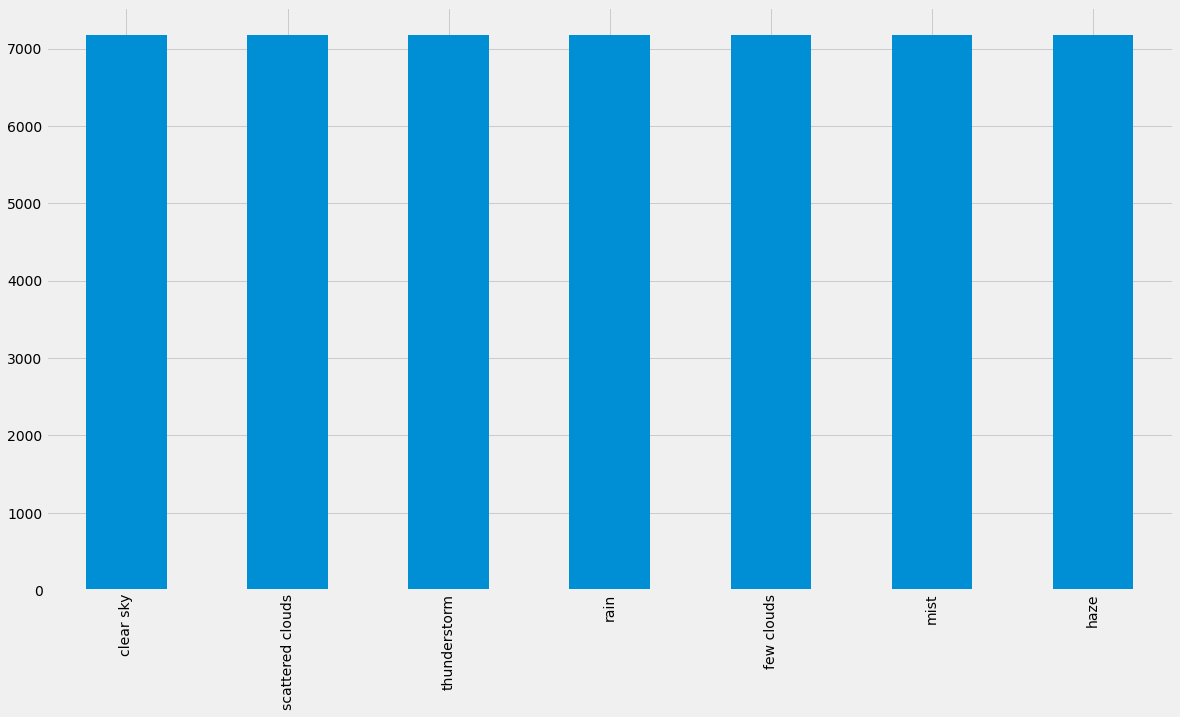

In [ ]:
#Hnadling Imbalance using the SMOTE Algorithm.
x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.22, stratify=y)
x_train.drop("index", axis=1, inplace=True)
x_test.drop("index", axis=1, inplace=True)
print("Number of Training Data Before Handling Imbalance: ", len(x_train)) 
print("Number of Testing Data Before Handling Imbalance: ", len(x_test))
handler = HandleImbalanceContext(SmoteSampler(4))
x_train, y_train = handler.fit_resample(x_train, y_train)
y_train.value_counts().plot(kind="bar", figsize=(18, 10))
print("Number of Training Data After Handling Imbalance: ", len(x_train)) 
print("Number of Testing Data After Handling Imbalance: ", len(x_test))
print()
print()

In [ ]:
x_train = x_train[["temp", "pressure", "humidity", "clouds"]]
xgboost_model.fit(x_train, y_train)
x_test = x_test[["temp", "pressure", "humidity", "clouds"]]
y_pred = xgboost_model.predict(x_test)
print(classification_report(y_pred, y_test))

                  precision    recall  f1-score   support

       clear sky       0.99      0.91      0.95       519
      few clouds       0.85      0.85      0.85       749
            haze       0.36      0.20      0.25       348
            mist       0.58      0.41      0.48       532
            rain       0.50      0.55      0.53       735
scattered clouds       0.51      0.85      0.64      1201
    thunderstorm       0.50      0.07      0.13       631

        accuracy                           0.61      4715
       macro avg       0.61      0.55      0.55      4715
    weighted avg       0.61      0.61      0.57      4715



In [ ]:
#x_train = x_train[["temp", "pressure", "humidity", "clouds"]]
xgboost_model.fit(x_train, y_train)
#x_test = x_test[["temp", "pressure", "humidity", "clouds"]]
y_pred = xgboost_model.predict(x_test)
print(classification_report(y_pred, y_test))

                  precision    recall  f1-score   support

       clear sky       0.98      0.93      0.96       502
      few clouds       0.87      0.88      0.88       745
            haze       0.41      0.24      0.31       315
            mist       0.65      0.43      0.52       568
            rain       0.54      0.54      0.54       798
scattered clouds       0.58      0.86      0.69      1362
    thunderstorm       0.49      0.11      0.17       425

        accuracy                           0.65      4715
       macro avg       0.64      0.57      0.58      4715
    weighted avg       0.65      0.65      0.63      4715

